**1. Importing libraries**

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
import pandas as pd
import optlib.optical as opt

np.seterr(divide='ignore', invalid='ignore')

plt.rcParams.update({
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica"]})
plt.rcParams['font.size'] = 14
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

%matplotlib notebook

**2. Path to the directory containing Henke ionisation data (download from https://henke.lbl.gov/optical_constants/asf.html)**

In [2]:
xraypath = '/Users/olgaridzel/Research/Bruce/PHYSDAT/sf/'

**DNA**

In [3]:
A = [2.88,17.04,25.53,2.48,30.87,17.34,27.94,23,23.48,22.85,20.23,25.42,29,17.28,65.7,12.84,32.66,6.22]
gamma = [1.2,2,1.9,1.8,2.5,2.2,2.9,3.6,3.9,5,6.1,15.6,8.2,7.6,73.3,6.9,14.3,6.8]
omega = [6.6,8.5,9.7,10.2,10.8,12,13.3,14.8,16.6,18.7,21,22.9,24,28.1,32,32.5,37.3,50.1]
oscillators = opt.Oscillators('Drude', A, gamma, omega, alpha = 0)
composition = opt.Composition(['c','n','o','p','h'], [39,13,24,4,49])
eloss = opt.linspace(opt.machine_eps,100,0.1)
q = 0

dna_drude = opt.Material('DNA', oscillators, composition, eloss, q, xraypath)
dna_drude.Eg = 4.5
dna_drude.width_of_the_valence_band = 0.5
dna_drude.atomic_density = 0.087

*Calculate and plot ELF*

<IPython.core.display.Javascript object>


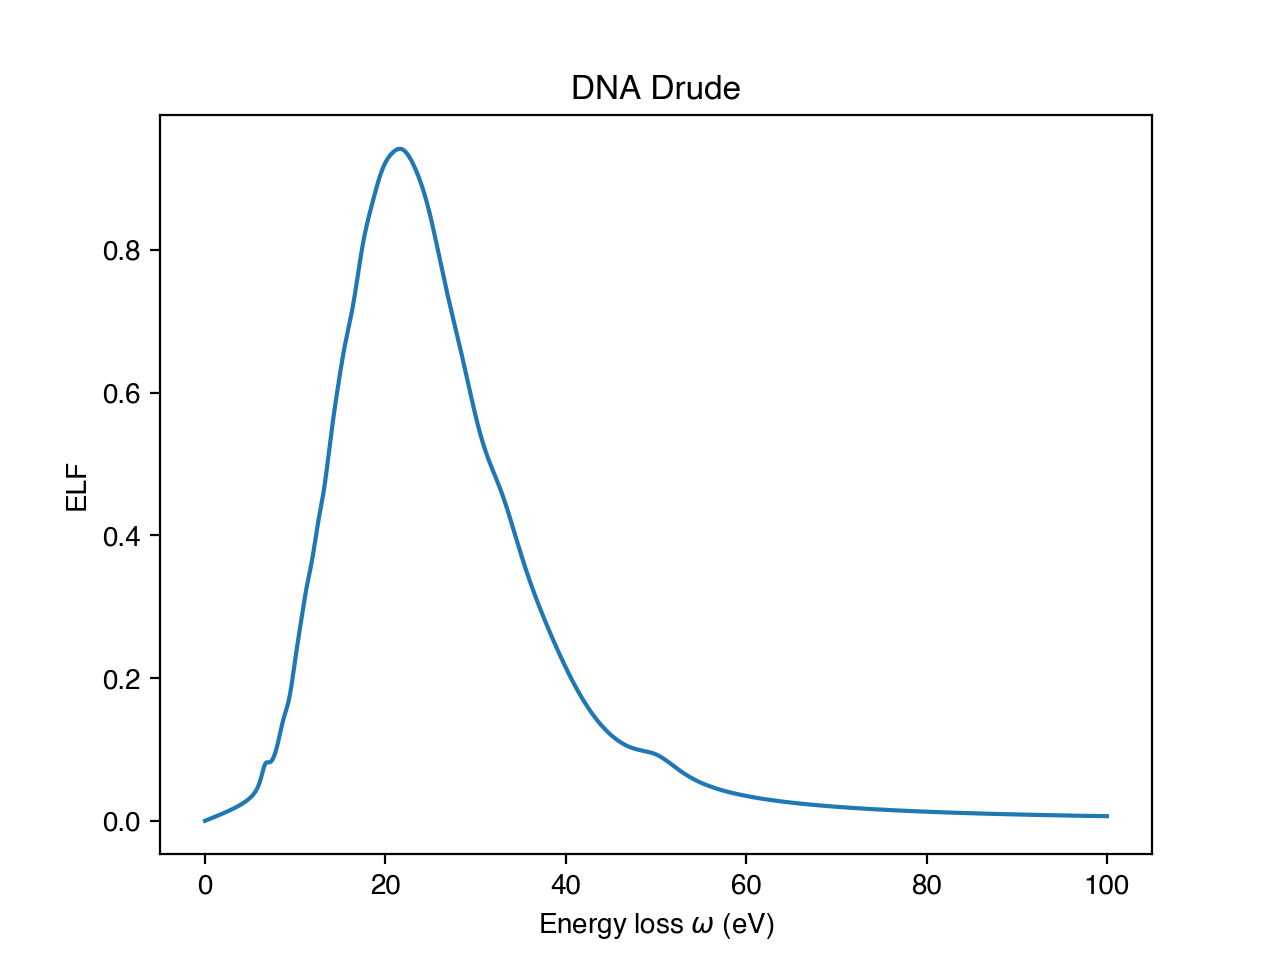

In [4]:
dna_drude.plotELF()

*Calculate and plot normalised DIIMFP*

<IPython.core.display.Javascript object>


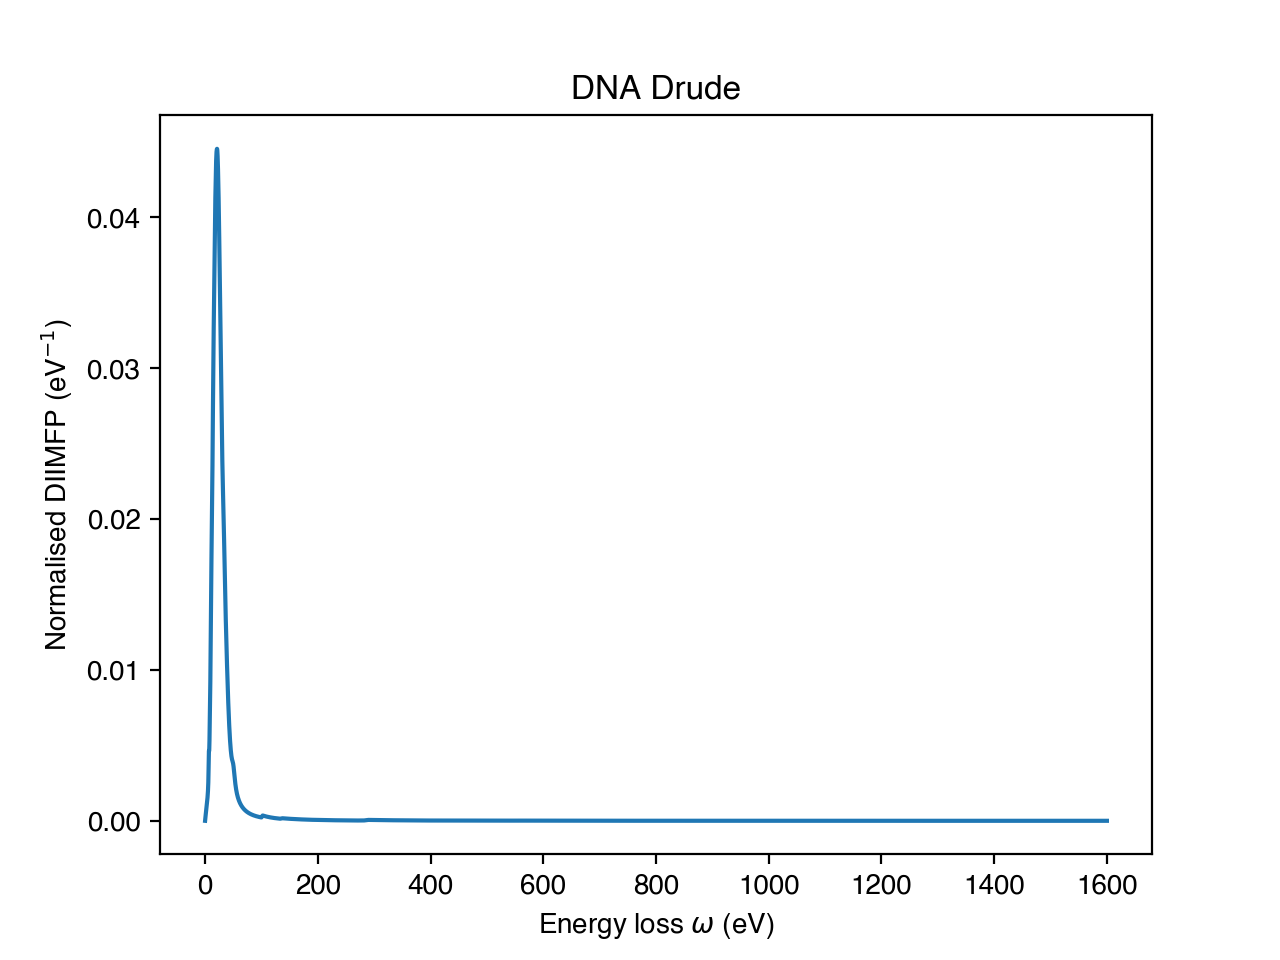

In [5]:
E0 = 1600
dna_drude.plotDIIMFP(E0, normalised=True)

*Calculate and plot IMFP*

<IPython.core.display.Javascript object>


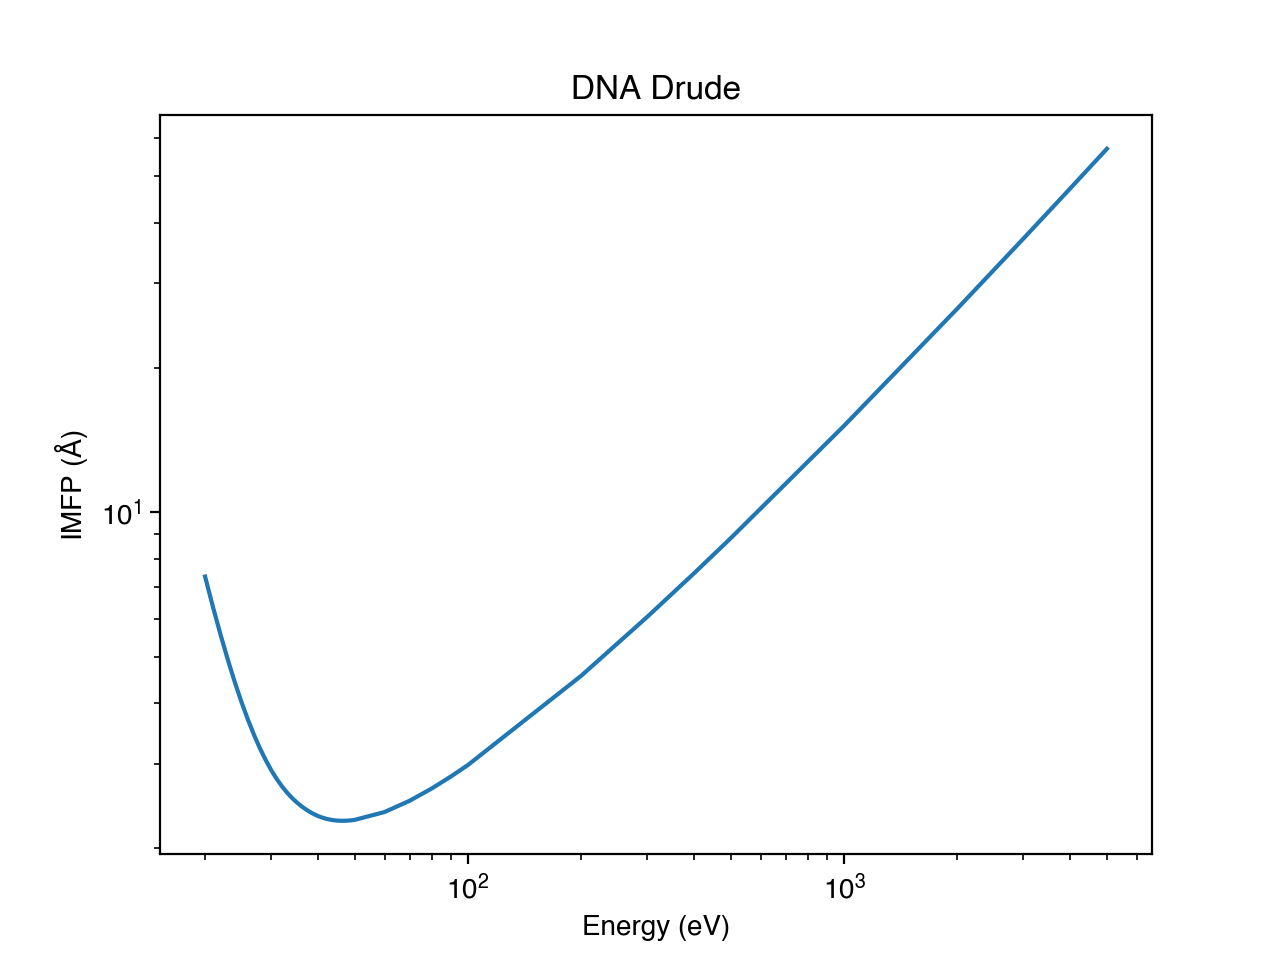

In [6]:
E0 = np.hstack((opt.linspace(20,50),opt.linspace(60,100,10),opt.linspace(200,500,100),opt.linspace(1000,5000,1000)))
dna_drude.plotIMFP(E0, isMetal=False)

*Calculate optical constants*

<IPython.core.display.Javascript object>


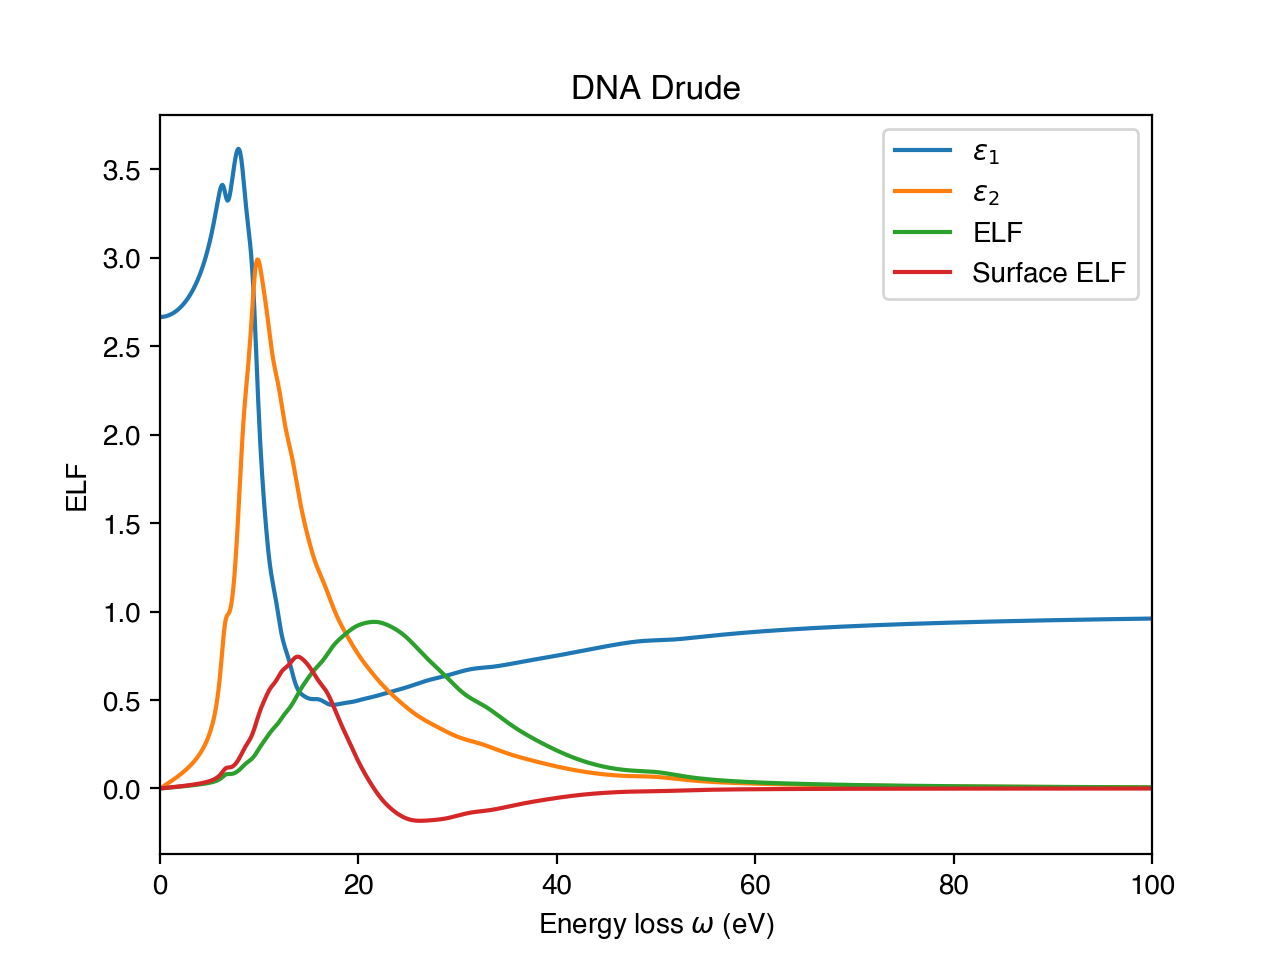

In [10]:
dna_drude.calculateELF()
dna_drude.calculateSurfaceELF()

plt.figure()
plt.plot(dna_drude.eloss,dna_drude.epsilon.real,label='$\epsilon_1$')
plt.plot(dna_drude.eloss,dna_drude.epsilon.imag,label='$\epsilon_2$')
plt.plot(dna_drude.eloss,dna_drude.ELF,label='ELF')
plt.plot(dna_drude.eloss,dna_drude.surfaceELF,label='Surface ELF')
plt.xlabel('Energy loss $\omega$ (eV)')
plt.ylabel('ELF')
plt.title(f'{dna_drude.name} {dna_drude.oscillators.model}')
plt.xlim(0,100)
plt.legend()
plt.show()

<IPython.core.display.Javascript object>


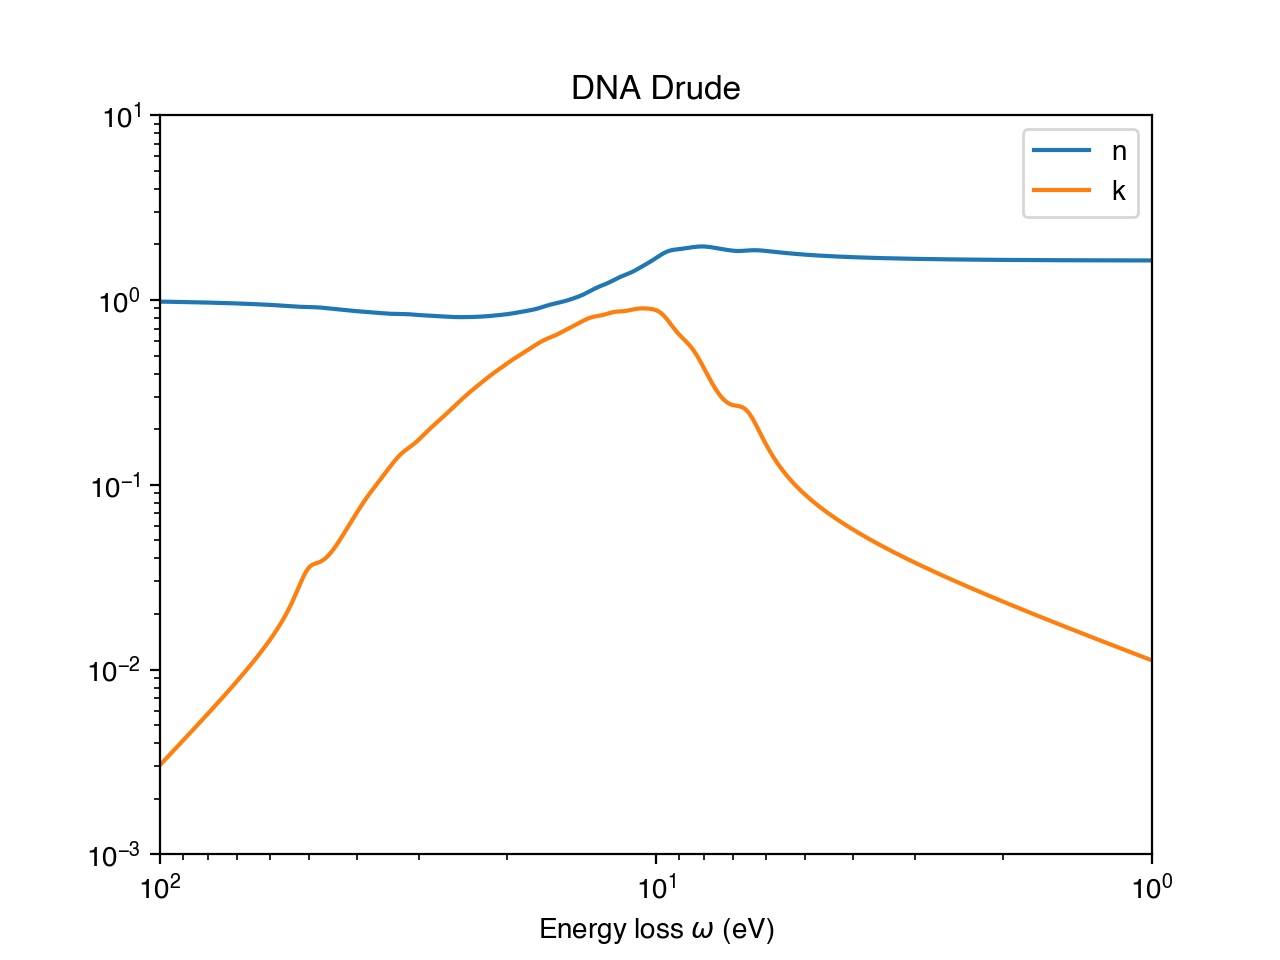

In [9]:
dna_drude.calculateOpticalConstants()

plt.figure()
plt.plot(dna_drude.eloss,dna_drude.refractive_index,label='n')
plt.plot(dna_drude.eloss,dna_drude.extinction_coefficient,label='k')
plt.yscale('log')
plt.xscale('log')
plt.xlabel('Energy loss $\omega$ (eV)')
plt.xlim(100,1)
plt.ylim(0.001,10)
plt.legend()
plt.title(f'{dna_drude.name} {dna_drude.oscillators.model}')
plt.show()

In [4]:
dna_drude.writeOpticalData()

*Drude-Lindhard*

In [3]:
A = [0.039,0.077,0.081,0.043,0.064,0.066,0.075,0.078,0.064,0.064,0.017]
gamma = [3.49,4.4,4.6,3.63,4.04,4.3,5.12,6.95,10.34,13.53,22.91]
omega = [11.4,14.31,16.71,18.36,20.04,21.97,24.25,27.23,31.3,35.61,48.97]
oscillators = opt.Oscillators('DrudeLindhard', A, gamma, omega, alpha = 1)
composition = opt.Composition(['c','n','o','p','h'], [39,13,24,4,49])
eloss = opt.linspace(opt.machine_eps,100,0.1)
q = [0,1,2]

dna_dl = opt.Material('DNA', oscillators, composition, eloss, q, xraypath)
dna_dl.Eg = 4.5
dna_dl.width_of_the_valence_band = 0.5
dna_dl.atomic_density = 0.087

In [4]:
A = [0.039,0.077,0.081,0.043,0.064,0.066,0.075,0.078,0.064,0.064,0.017]
gamma = [3.49,4.4,4.6,3.63,4.04,4.3,5.12,6.95,10.34,13.53,22.91]
omega = [11.4,14.31,16.71,18.36,20.04,21.97,24.25,27.23,31.3,35.61,48.97]
oscillators = opt.Oscillators('DLL', A, gamma, omega, alpha = 1)
composition = opt.Composition(['c','n','o','p','h'], [39,13,24,4,49])
eloss = opt.linspace(opt.machine_eps,100,0.1)
q = [0,1,2]

dna_dll = opt.Material('DNA', oscillators, composition, eloss, q, xraypath)
dna_dll.Eg = 4.5
dna_dll.U = 9.5
dna_dll.width_of_the_valence_band = 0.5
dna_dll.atomic_density = 0.087

<IPython.core.display.Javascript object>


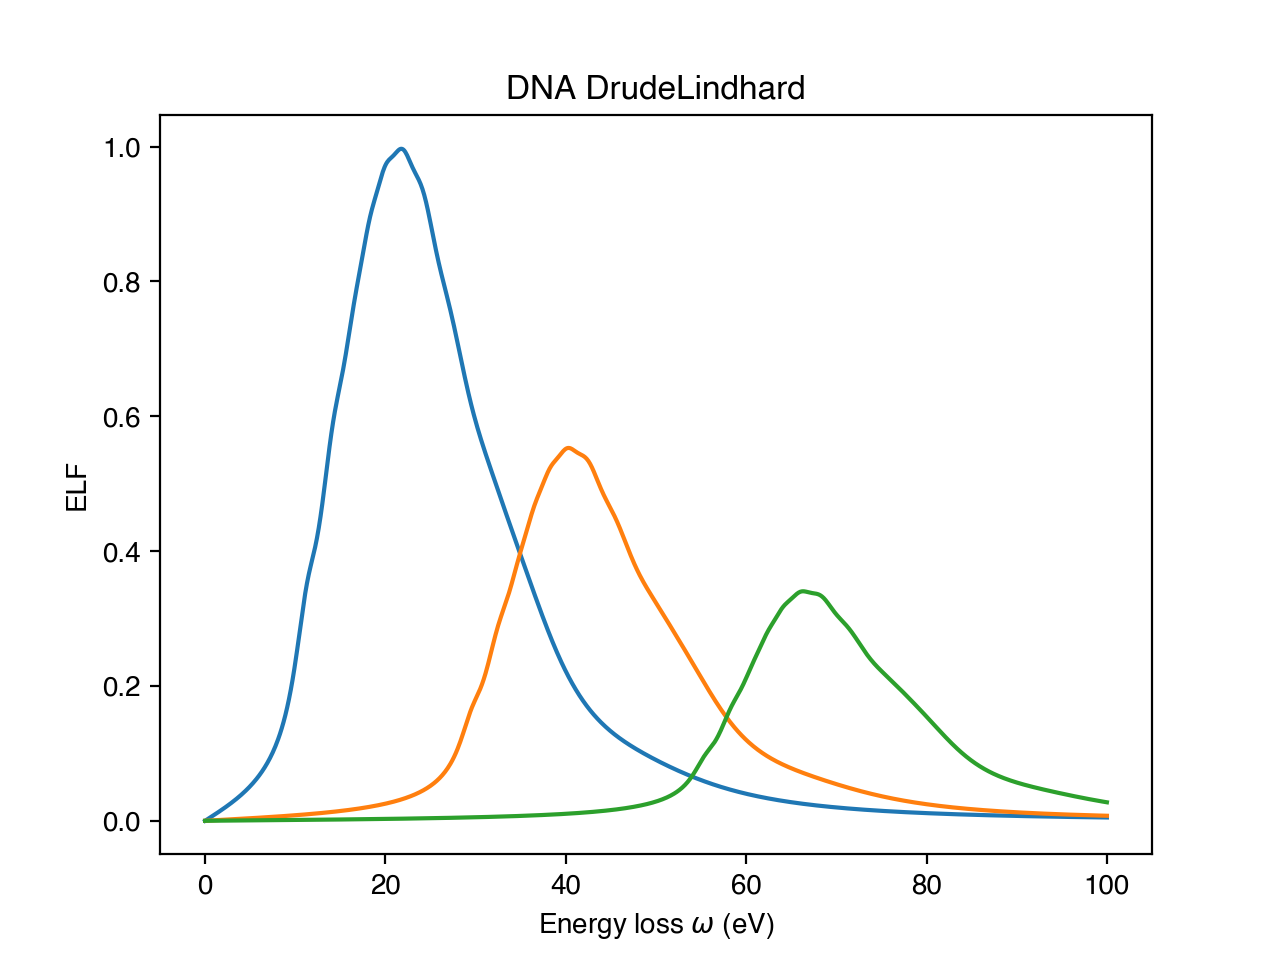

In [5]:
dna_dl.plotELF()

<IPython.core.display.Javascript object>


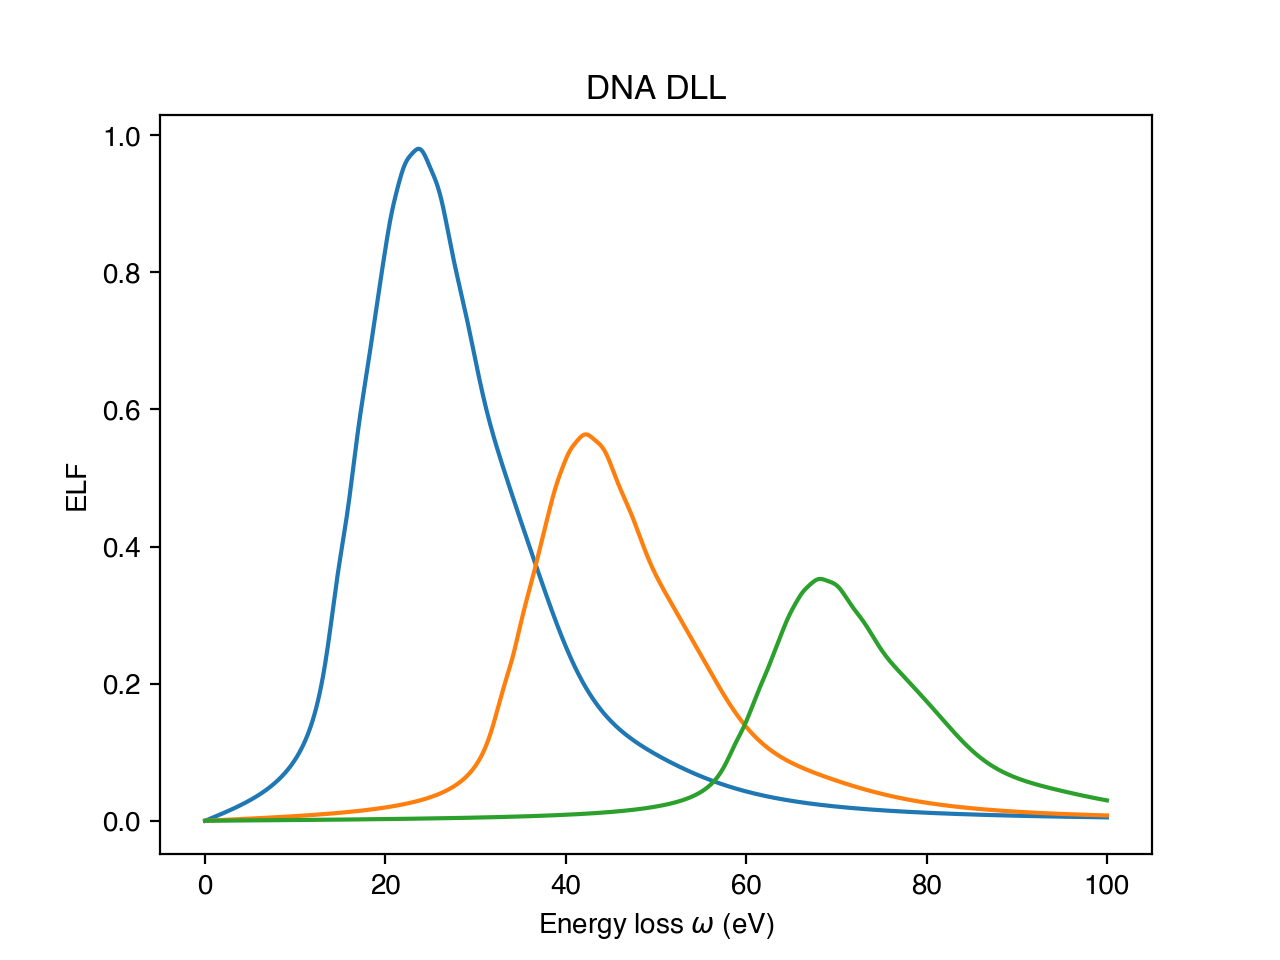

In [6]:
dna_dll.plotELF()

In [7]:
dna_dl.q = opt.linspace(0,5,0.05)
dna_dl.size_q = dna_dl.q.shape[0]
dna_dl.calculateELF()

<IPython.core.display.Javascript object>


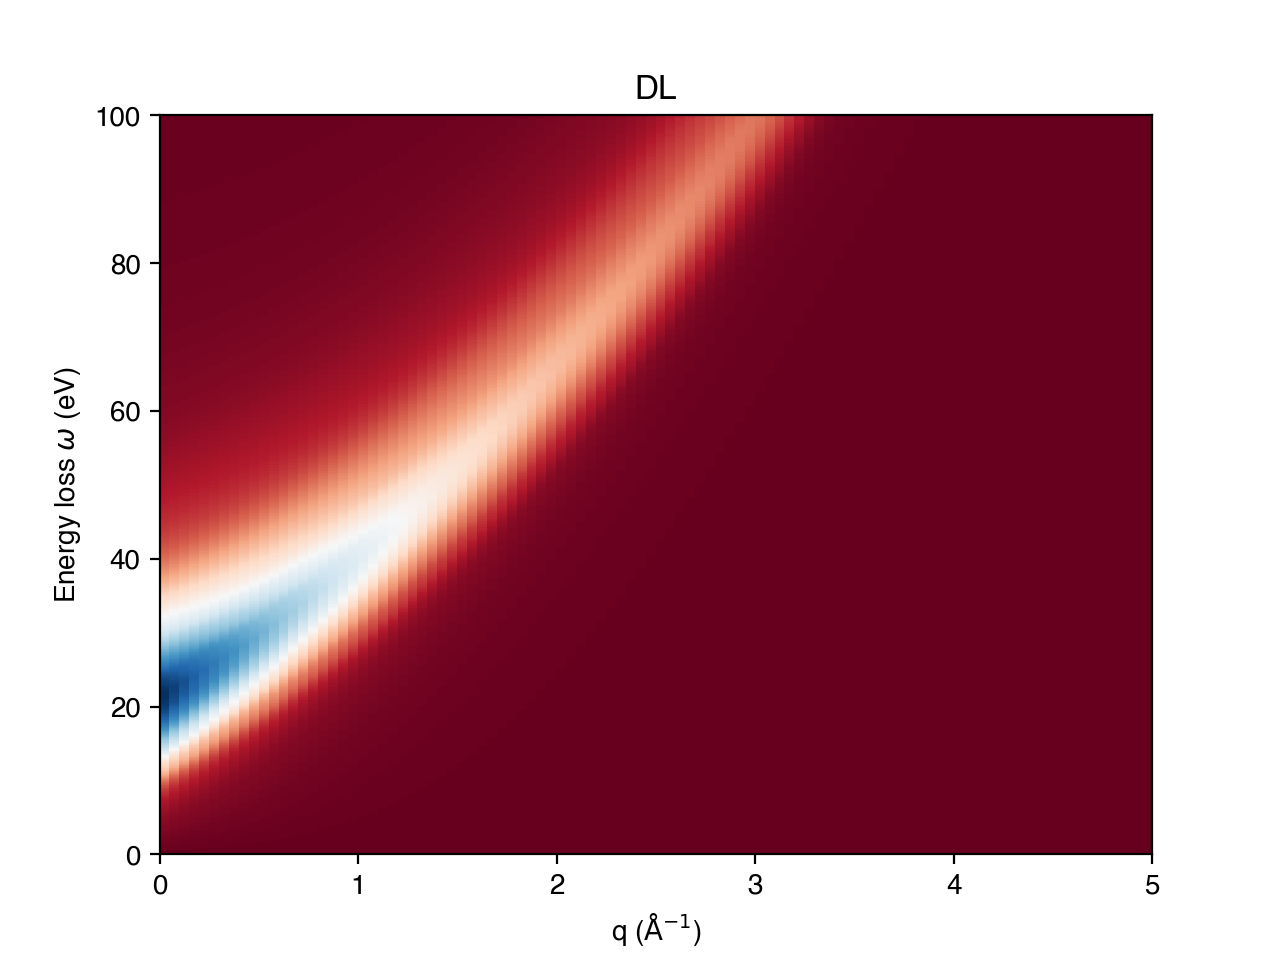

In [8]:
plt.figure()
plt.pcolor(dna_dl.q, dna_dl.eloss, dna_dl.ELF, cmap='RdBu', vmin=np.min(dna_dl.ELF), vmax=np.max(dna_dl.ELF))
plt.title('DL')
plt.xlabel('q ($\mathrm{\AA}^{-1}$)')
plt.ylabel('Energy loss $\omega$ (eV)')
plt.xlim(0, 5)
plt.ylim(0,100)
plt.show()

In [9]:
dna_dll.q = opt.linspace(0,5,0.05)
dna_dll.size_q = dna_dll.q.shape[0]
dna_dll.calculateELF()

<IPython.core.display.Javascript object>


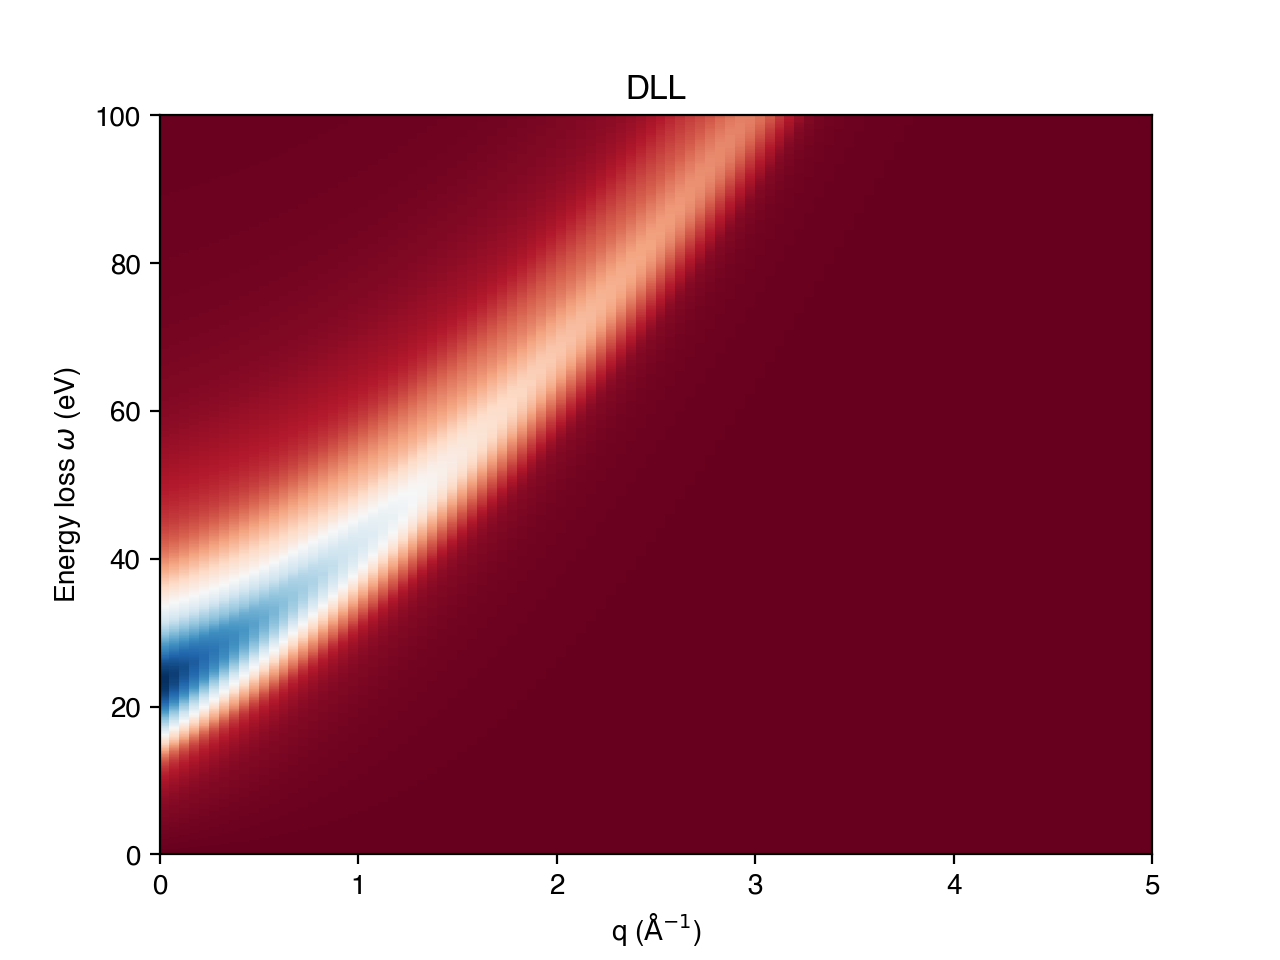

In [10]:
plt.figure()
plt.pcolor(dna_dll.q, dna_dll.eloss, dna_dll.ELF, cmap='RdBu', vmin=np.min(dna_dll.ELF), vmax=np.max(dna_dll.ELF))
plt.title('DLL')
plt.xlabel('q ($\mathrm{\AA}^{-1}$)')
plt.ylabel('Energy loss $\omega$ (eV)')
plt.xlim(0, 5)
plt.ylim(0,100)
plt.show()

<IPython.core.display.Javascript object>


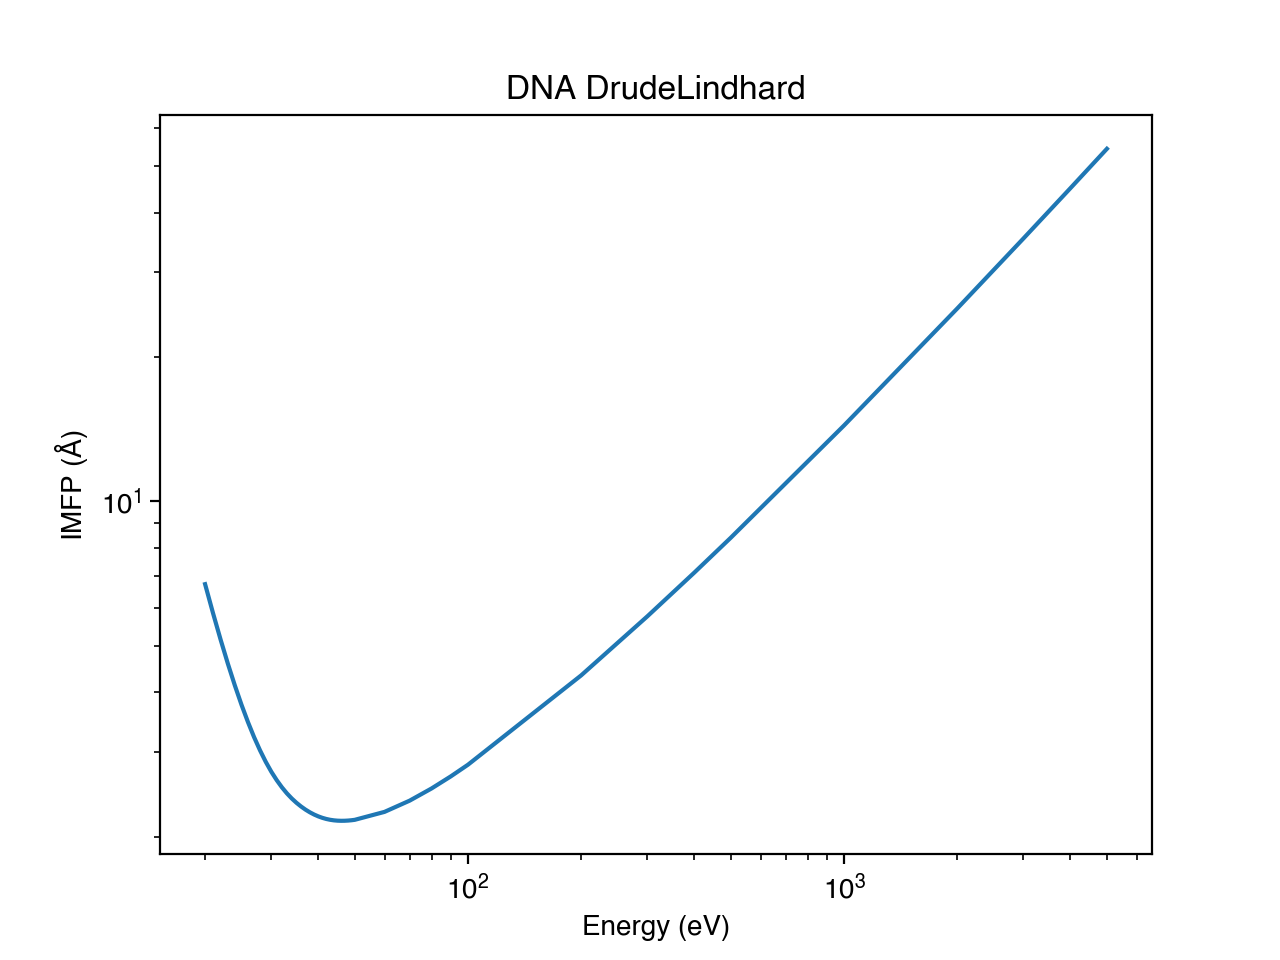

In [19]:
E0 = np.hstack((osc.linspace(20,50),osc.linspace(60,100,10),osc.linspace(200,500,100),osc.linspace(1000,5000,1000)))
dna_dl.plotIMFP(E0, isMetal=False)

In [11]:
A = [0.0369, 0.0535, 0.0973, 0.0731, 0.0446, 0.0475, 0.0441, 0.0356, 0.0390, 0.0495, 0.1450, 0.0825, 0.0478, 0.0686, 0.0552, 0.0309, 0.0208, 0.0281, 0.01, 0.01, 0.01, 0.01]
gamma = [2.4608, 2.7865, 2.8713, 2.5564, 3.7889, 2.5830, 2.5278, 2.0690, 2.5008, 2.6238, 2.9751, 2.7016, 2.0537, 2.6576, 2.4549, 2.0698, 1.9888, 2.0102, 3.0, 3.0, 3.0, 3.0]
omega = [9.2811, 11.3430, 13.3943, 15.0991, 15.9566, 16.7443, 17.2171, 18.4110, 18.0507, 19.5733, 21.8442, 20.0761, 23.5279, 24.6840, 26.4460, 27.9153, 29.1464, 30.4685, 33.0, 34.5, 36.0, 39.0]
oscillators = opt.Oscillators('Mermin', A, gamma, omega, alpha = 0)
composition = opt.Composition(['c','n','o','p','h'], [39,13,24,4,49])
eloss = opt.linspace(opt.machine_eps,100,0.1)
q = 0

dna_m = opt.Material('DNA', oscillators, composition, eloss, q, xraypath)
dna_m.Eg = 4.5
dna_m.width_of_the_valence_band = 0.5
dna_m.atomic_density = 0.087

<IPython.core.display.Javascript object>


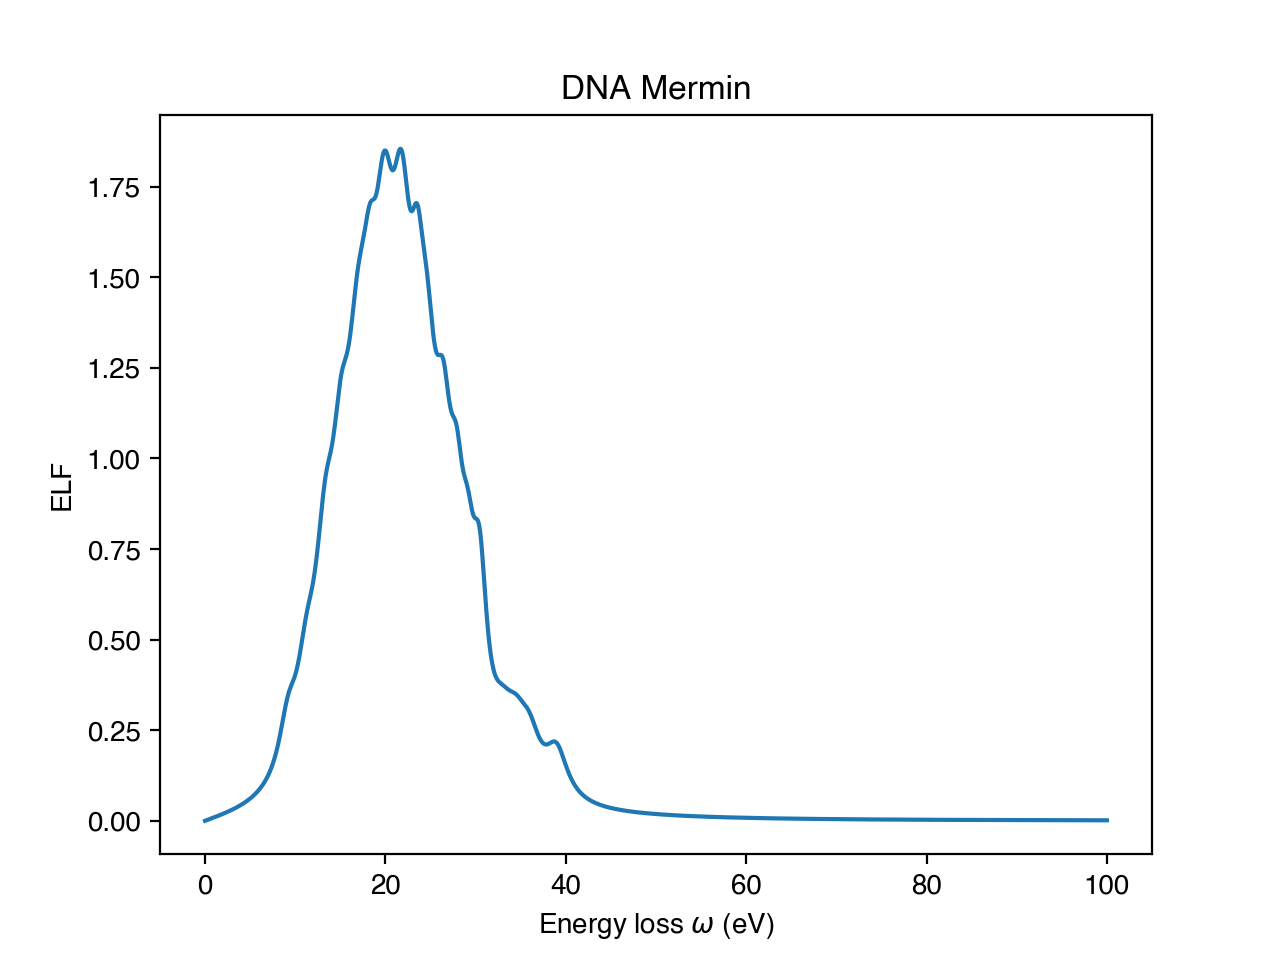

In [11]:
dna_m.plotELF()

In [12]:
dna_m.q = opt.linspace(0,5,0.05)
dna_m.size_q = dna_m.q.shape[0]
dna_m.calculateELF()

<IPython.core.display.Javascript object>


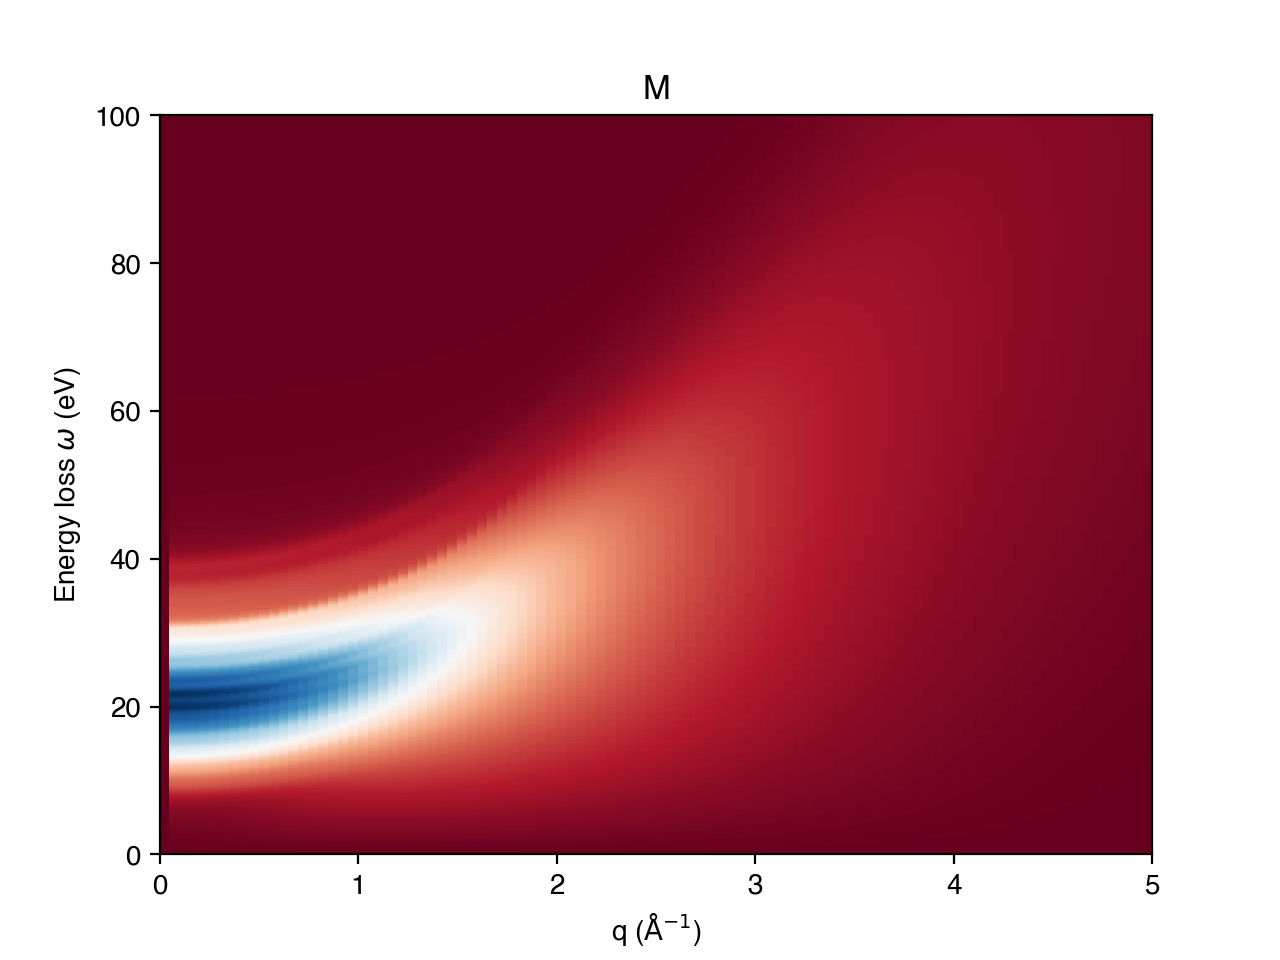

In [13]:
plt.figure()
plt.pcolor(dna_m.q, dna_m.eloss, dna_m.ELF, cmap='RdBu', vmin=np.min(dna_m.ELF), vmax=np.max(dna_m.ELF))
plt.title('M')
plt.xlabel('q ($\mathrm{\AA}^{-1}$)')
plt.ylabel('Energy loss $\omega$ (eV)')
plt.xlim(0, 5)
plt.ylim(0,100)
plt.show()

In [6]:
A = [0.0687, 0.1066, 0.1315, 0.0524, 0.1350, 0.0819, 0.0444, 0.0389, 0.0408, 0.0280, 0.0703, 0.0847, 0.0499, 0.0353, 0.0158, 0.0044, 0.0035, 0.0079]
gamma = [2.4242, 2.7729,  2.8469,  2.5496,  2.7058,  2.1034,  2.2504,  2.7825,  2.5090,  1.6338, 3.0196,  2.4304,  2.5927,  2.8110,  2.6007,  2.6,   3.0,   2.5188]
omega = [9.5769, 12.2692, 14.5514, 16.1348, 17.4904, 19.0871, 20.4145, 20.8734, 21.1905, 23.9497, 25.5281, 22.5438, 27.8767, 30.8498, 32.4821, 34.5476, 35.7188, 36.1944]
oscillators = opt.Oscillators('MerminLL', A, gamma, omega, alpha = 0)
composition = opt.Composition(['c','n','o','p','h'], [39,13,24,4,49])
eloss = opt.linspace(opt.machine_eps,100,0.1)
q = 0.01

dna_mll = opt.Material('DNA', oscillators, composition, eloss, q, xraypath)
dna_mll.Eg = 4.5
dna_mll.U = 5.4
dna_mll.width_of_the_valence_band = 0.5
dna_mll.atomic_density = 0.087

<IPython.core.display.Javascript object>


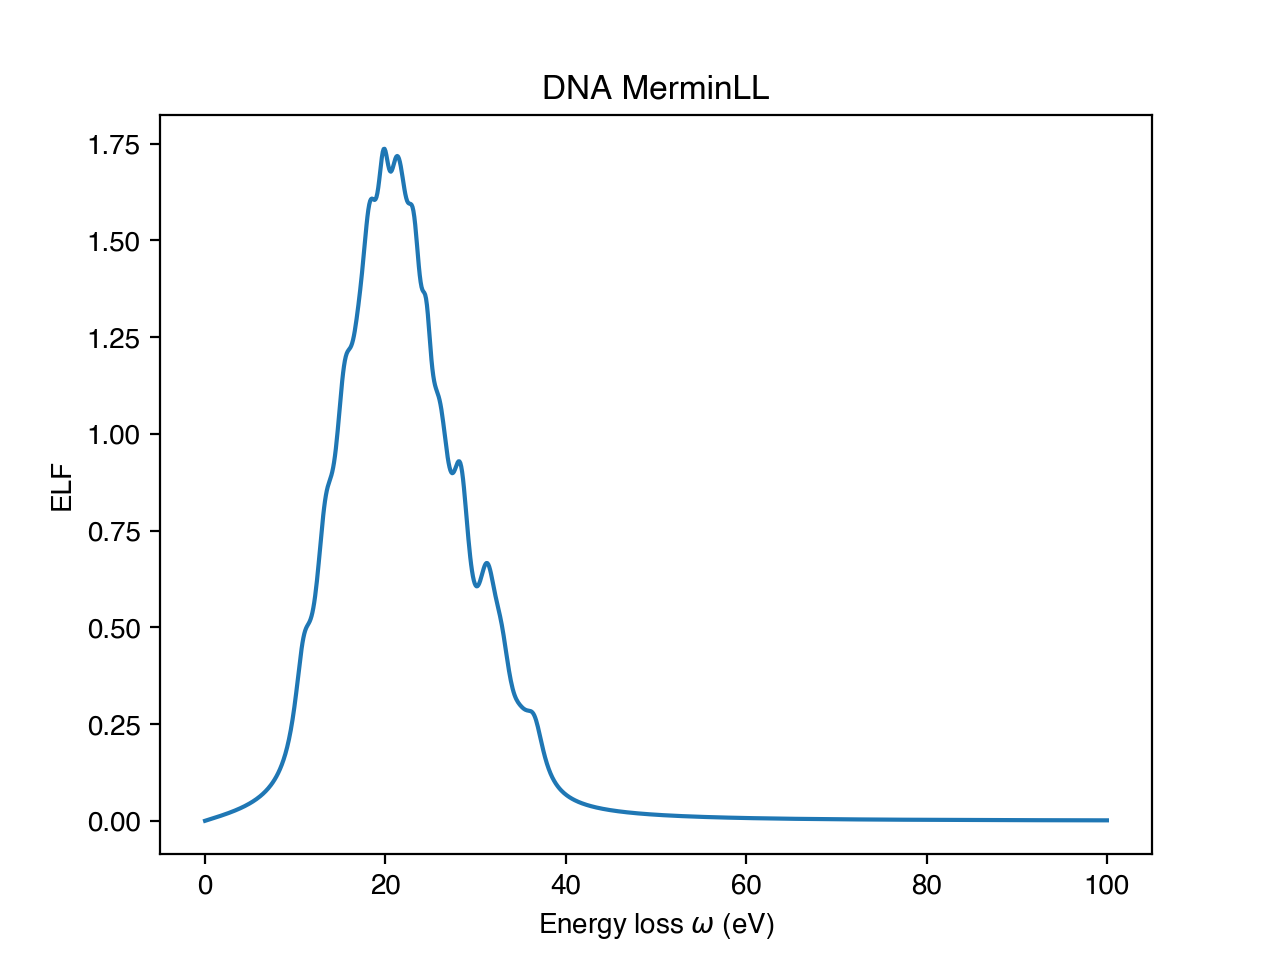

In [7]:
dna_mll.plotELF()

In [9]:
E0 = np.hstack((opt.linspace(20,50),opt.linspace(60,100,10),opt.linspace(200,500,100),opt.linspace(1000,5000,1000)))
dna_drude.calculateIMFP(E0, isMetal=False)
print("Done")
dna_dl.calculateIMFP(E0, isMetal=False)
print("Done")
dna_m.calculateIMFP(E0, isMetal=False)
print("Done")
dna_mll.calculateIMFP(E0, isMetal=False)
print("Done")

Done
Done
Done
Done


<IPython.core.display.Javascript object>


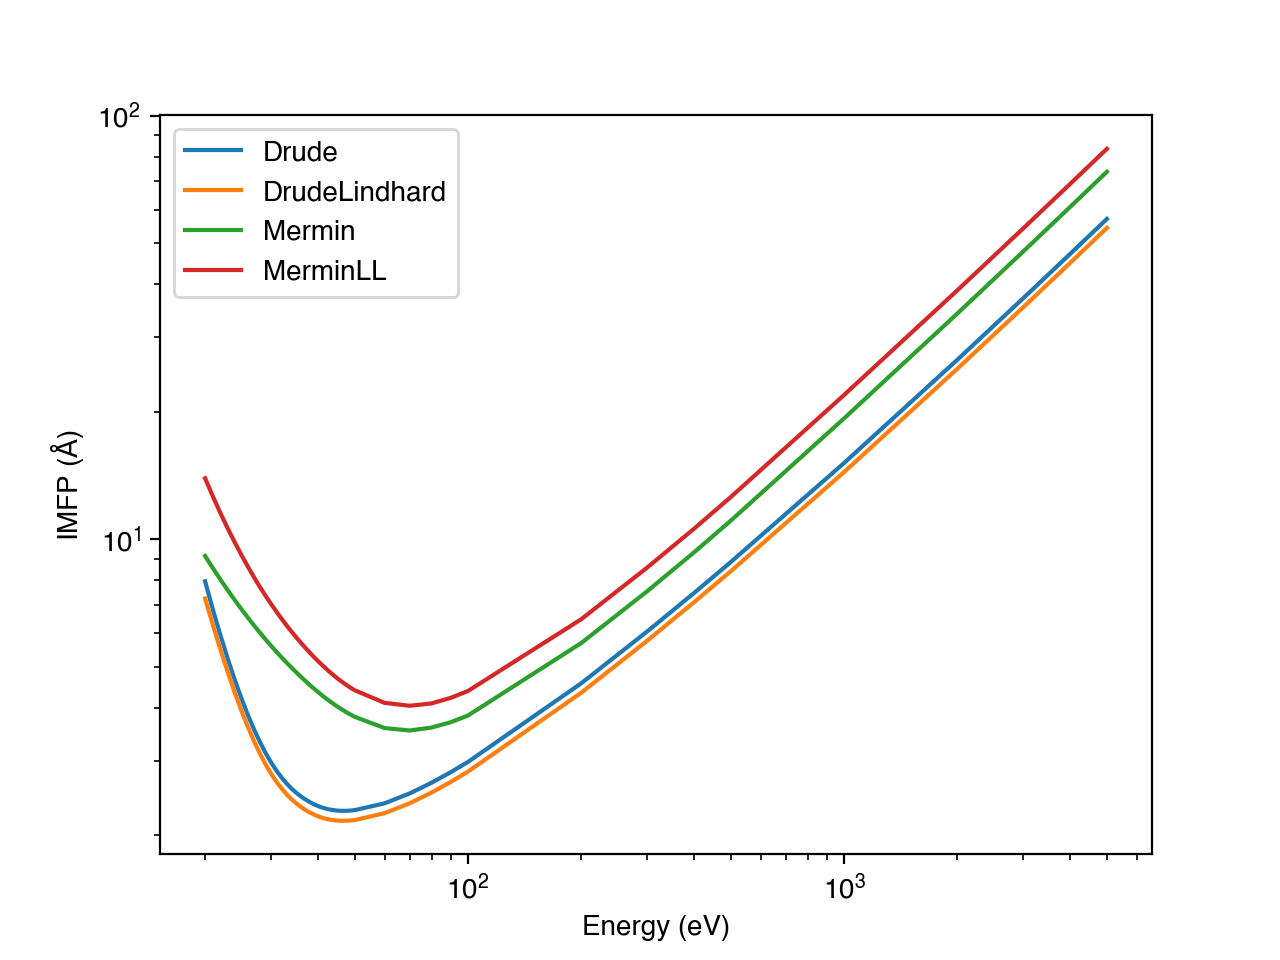

In [10]:
plt.figure()
plt.plot(E0, dna_drude.IMFP, label=f'{dna_drude.oscillators.model}')
plt.plot(E0, dna_dl.IMFP, label=f'{dna_dl.oscillators.model}')
plt.plot(E0, dna_m.IMFP, label=f'{dna_m.oscillators.model}')
plt.plot(E0, dna_mll.IMFP, label=f'{dna_mll.oscillators.model}')
plt.xlabel('Energy (eV)')
plt.ylabel('IMFP ($\mathrm{\AA}$)')
plt.yscale('log')
plt.xscale('log')
plt.legend()
plt.show()

***FITTING PART***

**DNA**

In [6]:
# A = [2.88,17.04,25.53,2.48,30.87,17.34,27.94,23,23.48,22.85,20.23,25.42,29,17.28,65.7,12.84,32.66,6.22]
# gamma = [1.2,2,1.9,1.8,2.5,2.2,2.9,3.6,3.9,5,6.1,15.6,8.2,7.6,73.3,6.9,14.3,6.8]
# omega = [6.6,8.5,9.7,10.2,10.8,12,13.3,14.8,16.6,18.7,21,22.9,24,28.1,32,32.5,37.3,50.1]

A = [4.946, 20.194, 55.306, 30.608, 42.568, 26.358, 53.914, 49.603, 24.178, 42.152, 15.363, 28.376, 9.072]
gamma = [1.388, 1.544, 2.31, 2.538, 3.694, 4.212, 7.409, 9.314, 8.155, 86.548, 6.728, 11.875, 7.722]
omega = [6.845, 8.569, 9.912, 11.694, 13.524, 15.987, 18.686, 22.955, 27.917, 36.823, 32.637, 37.962, 49.586]

M = (39 * 12.01 + 13 * 14.007 + 24 * 15.999 + 4 * 30.974 + 49 * 1.01) / (39 + 13 + 24 + 4 + 49) # Molar weight
rho = 1.35 # g/cm3

oscillators = opt.Oscillators('Drude', A, gamma, omega, alpha = 0)
composition = opt.Composition(['c','n','o','p','h'], [39,13,24,4,49])
eloss = opt.linspace(opt.machine_eps,100,0.1)
q = 0

dna_drude = opt.Material('DNA', oscillators, composition, eloss, q, xraypath)
dna_drude.Eg = 4.5
dna_drude.width_of_the_valence_band = 0.5
dna_drude.atomic_density = rho * opt.N_Avogadro / M *1e-24
dna_drude.static_refractive_index = 1.58
dna_drude.electron_density = 0.292
dna_drude.Z = 4.9
dna_drude.use_henke_for_ne = False
dna_drude.use_KK_constraint = True

In [7]:
fsum = dna_drude.evaluateFsum()
print('FSum = {}'.format(fsum))
print('Z = {}'.format(dna_drude.Z))

kksum = dna_drude.evaluateKKsum()
print('KKSum = {}'.format(kksum))

FSum = 4.792246937620871
Z = 4.9
KKSum = 1.0518611500582087


Start optimisation
FSum = 4.795128627531
Z = 4.9
KKSum = 1.0524674722196976
A = [4.97, 20.385, 55.375, 30.576, 42.681, 26.364, 53.96, 49.593, 24.249, 41.622, 15.345, 28.401, 9.116]
gamma = [1.361, 1.46, 2.308, 2.502, 3.688, 4.198, 7.428, 9.321, 8.149, 86.006, 6.74, 11.862, 7.762]
omega = [6.809, 8.564, 9.914, 11.694, 13.53, 15.997, 18.698, 22.953, 27.921, 36.769, 32.645, 37.956, 49.536]
osc.A = [4.97 20.385 55.375 30.576 42.681 26.364 53.96 49.593 24.249 41.622 15.345 28.401 9.116];
osc.G = [1.361 1.46 2.308 2.502 3.688 4.198 7.428 9.321 8.149 86.006 6.74 11.862 7.762];
osc.Om = [6.809 8.564 9.914 11.694 13.53 15.997 18.698 22.953 27.921 36.769 32.645 37.956 49.536];


<IPython.core.display.Javascript object>


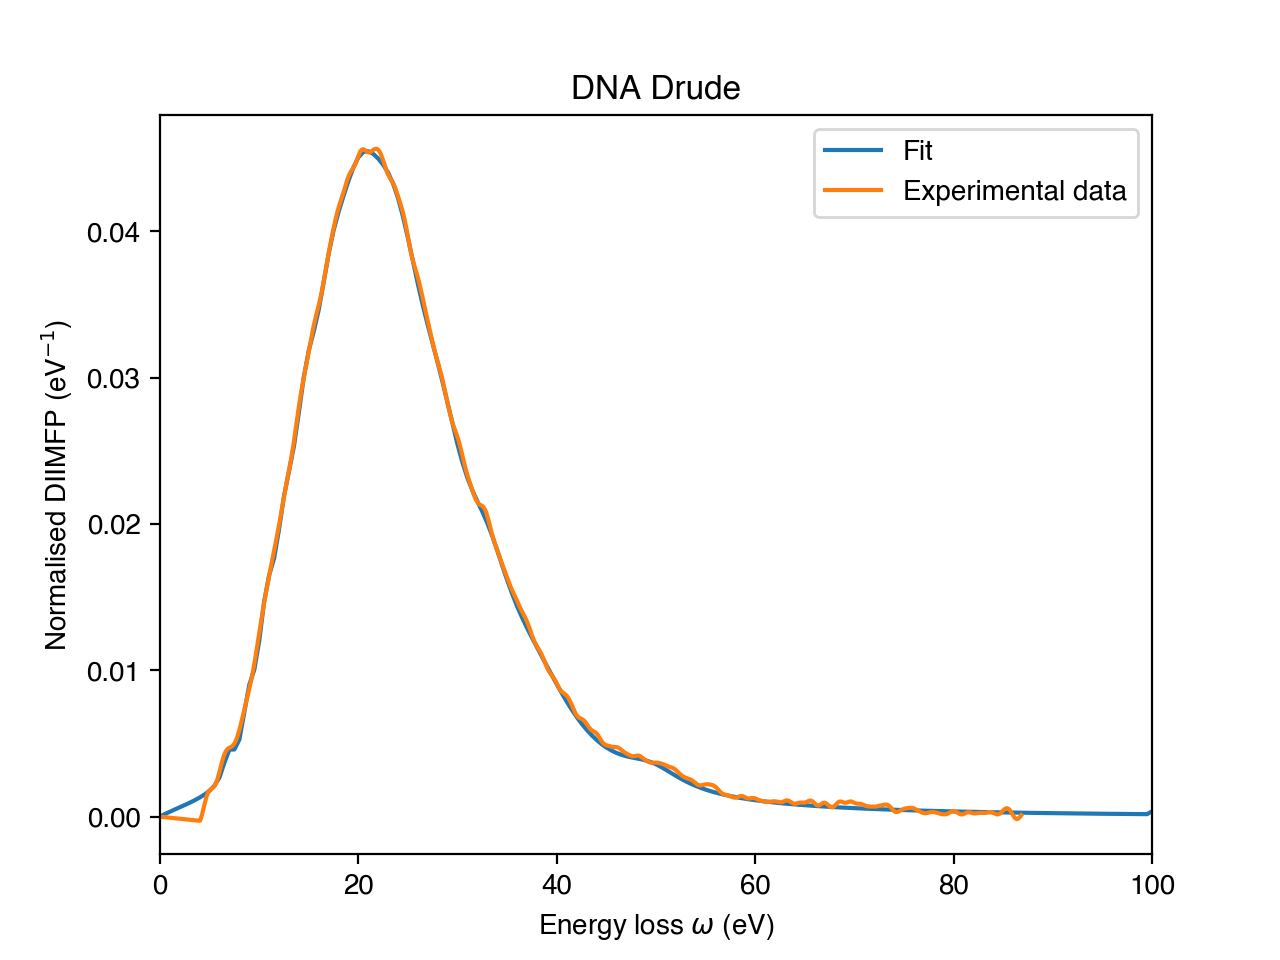

In [8]:
fd = pd.read_csv('../diimfp/dna_diimfp.dat',sep=' ',header=None)
exp_diimfp = fd.values
x_exp = exp_diimfp[:,0]
y_exp = exp_diimfp[:,1]

opt_ = opt.OptFit(dna_drude, x_exp, y_exp, 1600)
result = opt_.runOptimisation('ndiimfp', maxeval = 1000, xtol_rel = 1e-14)
oscOptimised = opt_.vec2Struct(result)

fsum = oscOptimised.evaluateFsum()
print('FSum = {}'.format(fsum))
print('Z = {}'.format(oscOptimised.Z))

kksum = oscOptimised.evaluateKKsum()
print('KKSum = {}'.format(kksum))

print(f'A = [{", ".join([str(i) for i in oscOptimised.oscillators.A.round(3).tolist()])}]')
print(f'gamma = [{", ".join([str(i) for i in oscOptimised.oscillators.gamma.round(3).tolist()])}]')
print(f'omega = [{", ".join([str(i) for i in oscOptimised.oscillators.omega.round(3).tolist()])}]')

print(f'osc.A = [{" ".join([str(i) for i in oscOptimised.oscillators.A.round(3).tolist()])}];')
print(f'osc.G = [{" ".join([str(i) for i in oscOptimised.oscillators.gamma.round(3).tolist()])}];')
print(f'osc.Om = [{" ".join([str(i) for i in oscOptimised.oscillators.omega.round(3).tolist()])}];')

oscOptimised.calculateDIIMFP(opt_.E0)

plt.figure()
plt.plot(oscOptimised.DIIMFP_E,oscOptimised.DIIMFP,label='Fit')
plt.plot(x_exp,y_exp,label='Experimental data')
plt.xlabel('Energy loss $\omega$ (eV)')
plt.ylabel('Normalised DIIMFP (eV$^{-1}$)')
plt.title(f'{oscOptimised.name} {oscOptimised.oscillators.model}')
plt.legend()
plt.xlim(0,100)
plt.show()

<IPython.core.display.Javascript object>


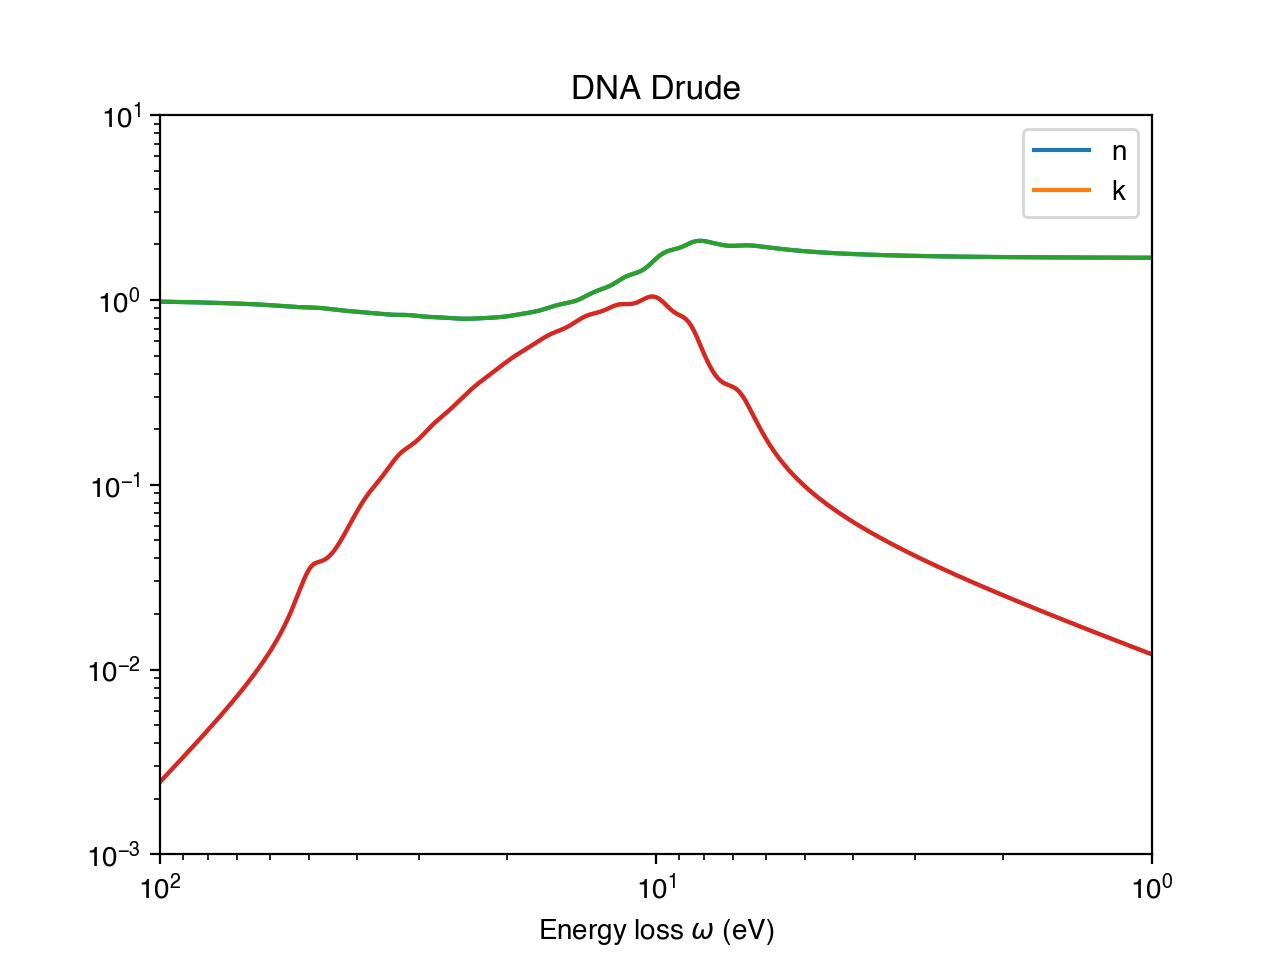

In [5]:
dna_drude.calculateOpticalConstants()

plt.figure()
plt.plot(dna_drude.eloss,dna_drude.refractive_index,label='n')
plt.plot(dna_drude.eloss,dna_drude.extinction_coefficient,label='k')
plt.yscale('log')
plt.xscale('log')
plt.xlabel('Energy loss $\omega$ (eV)')
plt.xlim(100,1)
plt.ylim(0.001,10)
plt.legend()
plt.title(f'{dna_drude.name} {dna_drude.oscillators.model}')

dna_drude.calculateOpticalConstants_()
plt.plot(dna_drude.eloss,dna_drude.refractive_index,label='n_')
plt.plot(dna_drude.eloss,dna_drude.extinction_coefficient,label='k_')
plt.show()

In [6]:
dna_drude.writeOpticalData()

In [10]:
# A = [0.039,0.077,0.081,0.043,0.064,0.066,0.075,0.078,0.064,0.064,0.017]
# gamma = [3.49,4.4,4.6,3.63,4.04,4.3,5.12,6.95,10.34,13.53,22.91]
# omega = [11.4,14.31,16.71,18.36,20.04,21.97,24.25,27.23,31.3,35.61,48.97]

A = [0.044, 0.04, 0.095, 0.041, 0.044, 0.058, 0.052, 0.062, 0.063, 0.08, 0.019]
gamma = [3.807, 4.626, 5.639, 4.711, 4.745, 4.554, 5.646, 10.565, 14.858, 16.956, 70.238]
omega = [12.957, 15.246, 20.942, 18.915, 23.325, 17.03, 25.993, 30.364, 23.871, 34.013, 58.818]

M = (39 * 12.01 + 13 * 14.007 + 24 * 15.999 + 4 * 30.974 + 49 * 1.01) / (39 + 13 + 24 + 4 + 49) # Molar weight
rho = 1.35 # g/cm3

oscillators = opt.Oscillators('DrudeLindhard', A, gamma, omega, alpha = 0)
composition = opt.Composition(['c','n','o','p','h'], [39,13,24,4,49])
eloss = opt.linspace(opt.machine_eps,100,0.1)
q = 0

dna_dl = opt.Material('DNA', oscillators, composition, eloss, q, xraypath)
dna_dl.Eg = 4.5
dna_dl.width_of_the_valence_band = 0.5
dna_dl.atomic_density = rho * opt.N_Avogadro / M *1e-24
dna_dl.static_refractive_index = 1.58
dna_dl.electron_density = 0.292
dna_dl.Z = 4.9

In [8]:
fsum = dna_dl.evaluateFsum()
print('FSum = {}'.format(fsum))
print('Z = {}'.format(dna_dl.Z))

kksum = dna_dl.evaluateKKsum()
print('KKSum = {}'.format(kksum))

FSum = 4.696361903435555
Z = 4.9
KKSum = 1.000990867144641


Start optimisation
FSum = 4.6275938062586945
Z = 4.9
KKSum = 1.0012040837152214
A = [0.044, 0.04, 0.095, 0.041, 0.044, 0.058, 0.052, 0.062, 0.063, 0.08, 0.019]
gamma = [3.807, 4.626, 5.639, 4.711, 4.745, 4.554, 5.646, 10.565, 14.858, 16.956, 70.238]
omega = [12.957, 15.246, 20.942, 18.915, 23.325, 17.03, 25.993, 30.364, 23.871, 34.013, 58.818]
osc.A = [0.044 0.04 0.095 0.041 0.044 0.058 0.052 0.062 0.063 0.08 0.019];
osc.G = [3.807 4.626 5.639 4.711 4.745 4.554 5.646 10.565 14.858 16.956 70.238];
osc.Om = [12.957 15.246 20.942 18.915 23.325 17.03 25.993 30.364 23.871 34.013 58.818];


<IPython.core.display.Javascript object>


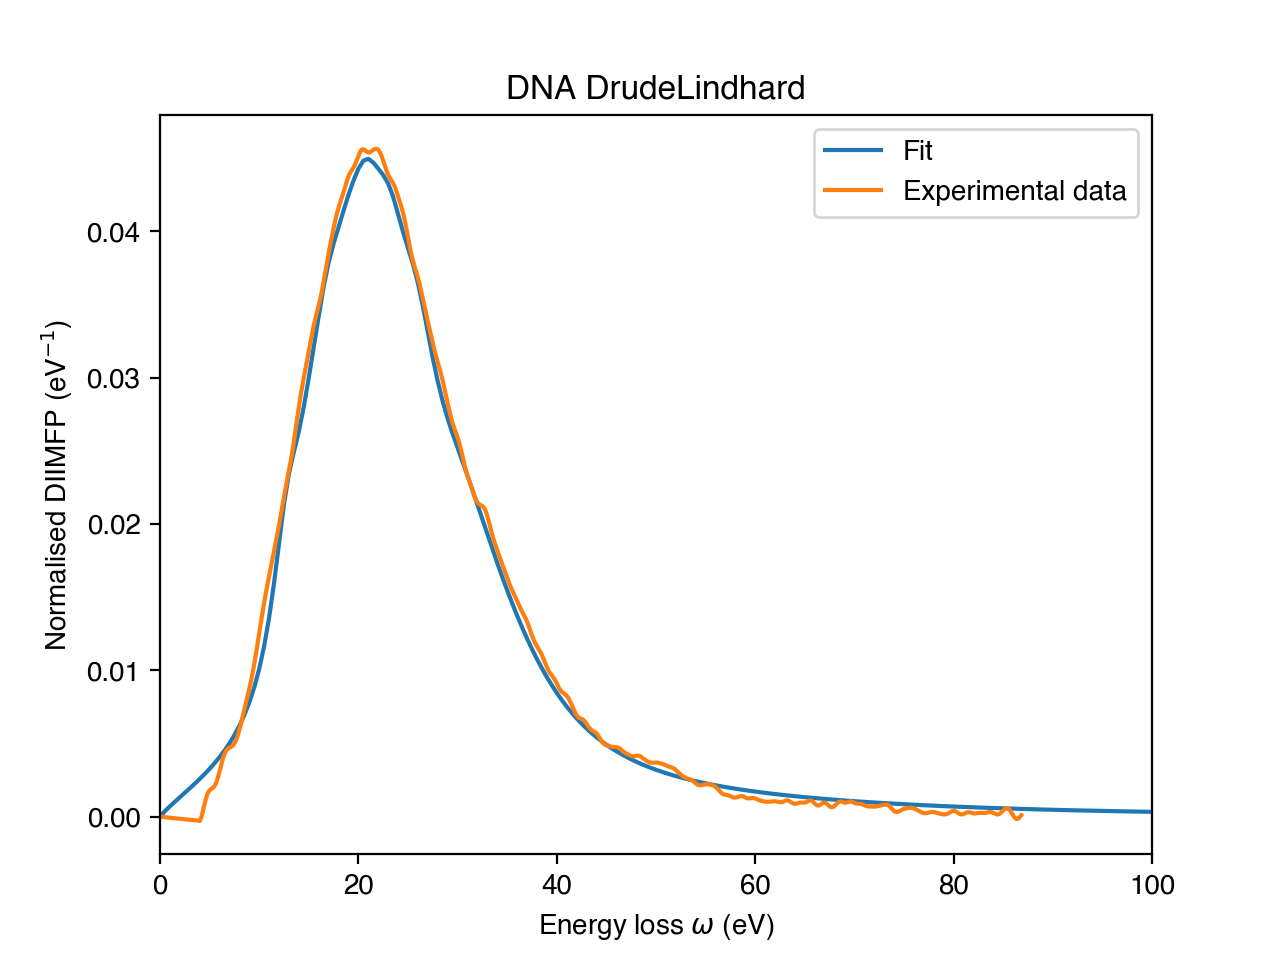

In [9]:
fd = pd.read_csv('../diimfp/dna_diimfp.dat',sep=' ',header=None)
exp_diimfp = fd.values
x_exp = exp_diimfp[:,0]
y_exp = exp_diimfp[:,1]

opt_ = opt.OptFit(dna_dl, x_exp, y_exp, 1600)
result = opt_.runOptimisation('ndiimfp', maxeval = 5000, xtol_rel = 1e-12)
oscOptimised = opt_.vec2Struct(result)

fsum = oscOptimised.evaluateFsum()
print('FSum = {}'.format(fsum))
print('Z = {}'.format(oscOptimised.Z))

kksum = oscOptimised.evaluateKKsum()
print('KKSum = {}'.format(kksum))

print(f'A = [{", ".join([str(i) for i in oscOptimised.oscillators.A.round(3).tolist()])}]')
print(f'gamma = [{", ".join([str(i) for i in oscOptimised.oscillators.gamma.round(3).tolist()])}]')
print(f'omega = [{", ".join([str(i) for i in oscOptimised.oscillators.omega.round(3).tolist()])}]')

print(f'osc.A = [{" ".join([str(i) for i in oscOptimised.oscillators.A.round(3).tolist()])}];')
print(f'osc.G = [{" ".join([str(i) for i in oscOptimised.oscillators.gamma.round(3).tolist()])}];')
print(f'osc.Om = [{" ".join([str(i) for i in oscOptimised.oscillators.omega.round(3).tolist()])}];')

oscOptimised.calculateDIIMFP(opt_.E0)

plt.figure()
plt.plot(oscOptimised.DIIMFP_E,oscOptimised.DIIMFP,label='Fit')
plt.plot(x_exp,y_exp,label='Experimental data')
plt.xlabel('Energy loss $\omega$ (eV)')
plt.ylabel('Normalised DIIMFP (eV$^{-1}$)')
plt.title(f'{oscOptimised.name} {oscOptimised.oscillators.model}')
plt.legend()
plt.xlim(0,100)
plt.show()

<IPython.core.display.Javascript object>


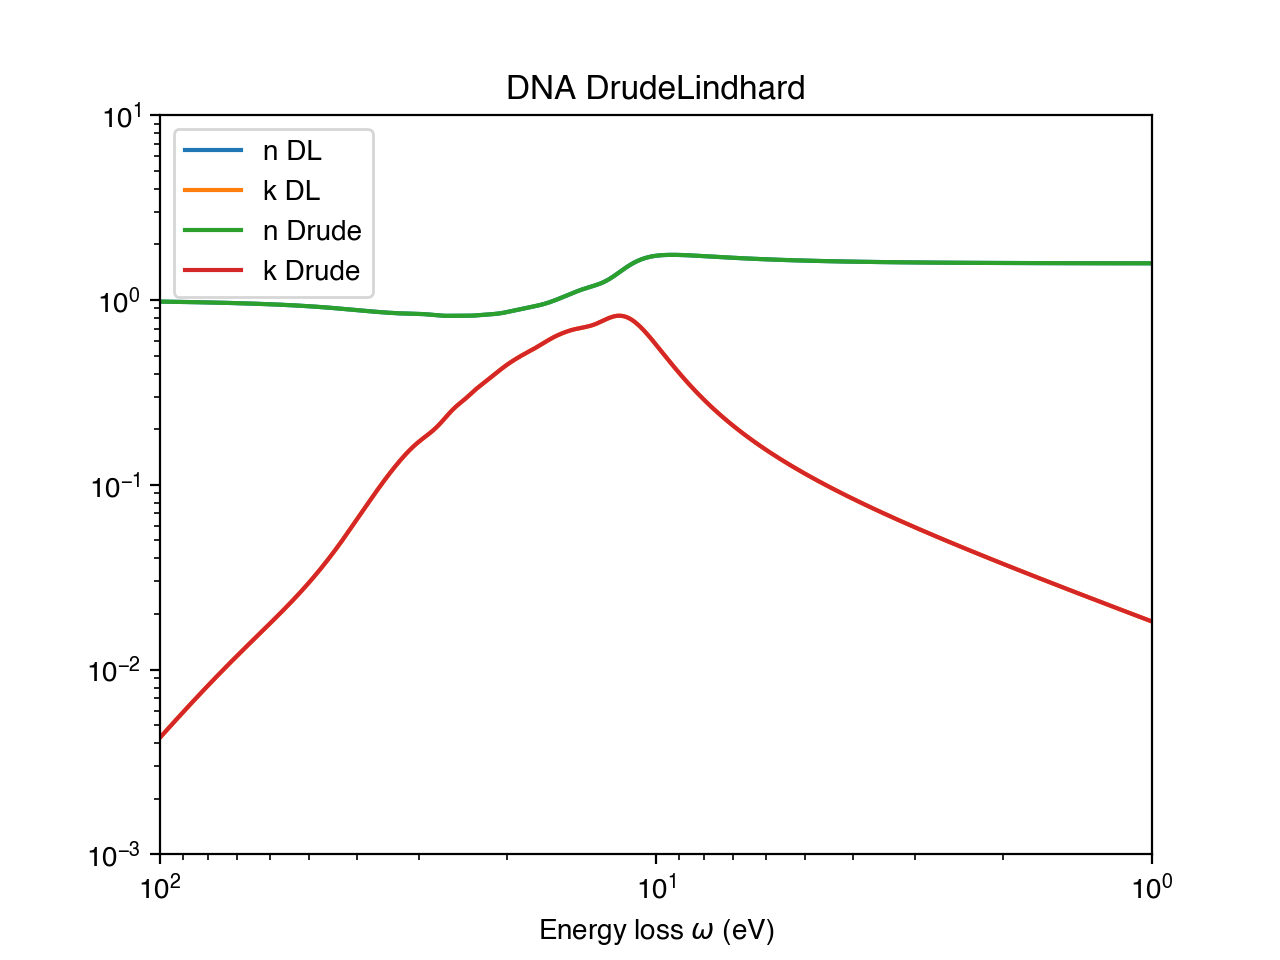

In [15]:
dna_dl.calculateOpticalConstants()

plt.figure()
plt.plot(dna_dl.eloss,dna_dl.refractive_index,label='n DL')
plt.plot(dna_dl.eloss,dna_dl.extinction_coefficient,label='k DL')
plt.yscale('log')
plt.xscale('log')
plt.xlabel('Energy loss $\omega$ (eV)')
plt.xlim(100,1)
plt.ylim(0.001,10)
plt.title(f'{dna_dl.name} {dna_dl.oscillators.model}')

dna_drude.calculateOpticalConstants()
plt.plot(dna_dl.eloss,dna_dl.refractive_index,label='n Drude')
plt.plot(dna_dl.eloss,dna_dl.extinction_coefficient,label='k Drude')

plt.legend()
plt.show()

**Irganox**

In [13]:
# A = [4.19,16.58,32.18,55.48,35.05,9.03,21.51,25.32,29.22,11.87,34.75,30.35,30.16,30.86,16.16]
# gamma = [0.7,2.3,3.3,4.1,4.2,3.2,5.3,6.2,8.0,14.5,11.5,13.7,14.3,16.5,14.0]
# omega = [6.2,9.6,11.4,13.6,16.2,18.3,19.7,22.0,25.4,30.0,30.6,38.0,46.6,56.7,72.9]

A = [4.667, 16.59, 31.492, 58.43, 37.051, 8.94, 21.39, 24.572, 29.22, 12.774, 35.013, 29.573, 30.212, 28.056, 15.357]
gamma = [0.68, 1.934, 2.833, 3.897, 4.113, 3.117, 5.017, 5.866, 7.663, 14.555, 11.254, 13.36, 13.861, 16.395, 23.818]
omega = [6.182, 9.544, 11.319, 13.551, 16.179, 18.301, 19.717, 21.973, 25.445, 30.383, 30.607, 38.028, 46.611, 56.809, 72.715]

M = (73 * 12.01 + 12 * 15.999 + 108 * 1.01) / (73 + 12 +108) # Molar weight
rho = 1.15 # g/cm3

oscillators = opt.Oscillators('Drude', A, gamma, omega, alpha = 0)
composition = opt.Composition(['c','o','h'], [73,12,108])
eloss = opt.linspace(opt.machine_eps,100,0.1)
q = 0

irganox_drude = opt.Material('Irganox', oscillators, composition, eloss, q, xraypath)
irganox_drude.Eg = 5.4
irganox_drude.width_of_the_valence_band = 10
irganox_drude.atomic_density = rho * opt.N_Avogadro / M *1e-24
irganox_drude.static_refractive_index = 1.535
irganox_drude.electron_density = 0.278
irganox_drude.Z = 3.3
irganox_drude.use_henke_for_ne = False
irganox_drude.use_KK_constraint = True

fsum = irganox_drude.evaluateFsum()
print('FSum = {}'.format(fsum))
print('Z = {}'.format(irganox_drude.Z))

kksum = irganox_drude.evaluateKKsum()
print('KKSum = {}'.format(kksum))

FSum = 3.266516187125952
Z = 3.3
KKSum = 0.9877546805710539


Start optimisation
FSum = 3.270822277569887
Z = 3.3
KKSum = 0.9887562323567698
A = [4.708, 16.903, 31.408, 58.336, 37.144, 9.015, 21.688, 24.334, 29.156, 12.878, 34.615, 29.636, 30.36, 27.971, 15.289]
gamma = [0.657, 1.971, 2.771, 3.876, 4.118, 3.121, 5.006, 5.832, 7.631, 14.169, 11.317, 13.205, 13.73, 15.856, 21.789]
omega = [6.169, 9.536, 11.313, 13.556, 16.173, 18.289, 19.721, 21.986, 25.447, 30.426, 30.552, 37.873, 46.527, 56.716, 72.521]
osc.A = [4.708 16.903 31.408 58.336 37.144 9.015 21.688 24.334 29.156 12.878 34.615 29.636 30.36 27.971 15.289];
osc.G = [0.657 1.971 2.771 3.876 4.118 3.121 5.006 5.832 7.631 14.169 11.317 13.205 13.73 15.856 21.789];
osc.Om = [6.169 9.536 11.313 13.556 16.173 18.289 19.721 21.986 25.447 30.426 30.552 37.873 46.527 56.716 72.521];


<IPython.core.display.Javascript object>


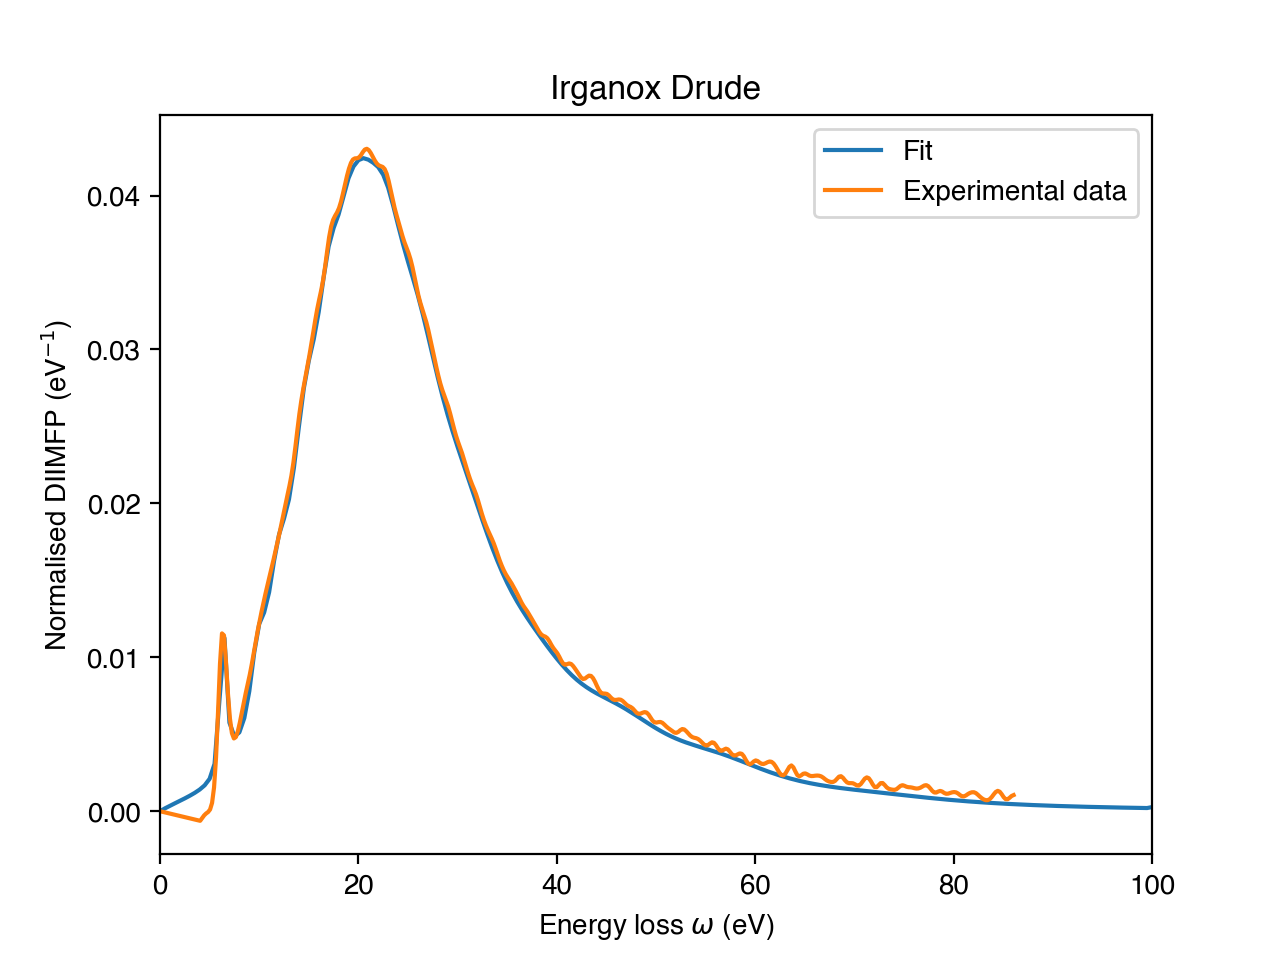

In [14]:
fd = pd.read_csv('../diimfp/irganox_diimfp.dat',sep=' ',header=None)
exp_diimfp = fd.values
x_exp = exp_diimfp[:,0]
y_exp = exp_diimfp[:,1]

opt_ = opt.OptFit(irganox_drude, x_exp, y_exp, 1600)
result = opt_.runOptimisation('ndiimfp', maxeval = 1000, xtol_rel = 1e-14)
oscOptimised = opt_.vec2Struct(result)

fsum = oscOptimised.evaluateFsum()
print('FSum = {}'.format(fsum))
print('Z = {}'.format(oscOptimised.Z))

kksum = oscOptimised.evaluateKKsum()
print('KKSum = {}'.format(kksum))

print(f'A = [{", ".join([str(i) for i in oscOptimised.oscillators.A.round(3).tolist()])}]')
print(f'gamma = [{", ".join([str(i) for i in oscOptimised.oscillators.gamma.round(3).tolist()])}]')
print(f'omega = [{", ".join([str(i) for i in oscOptimised.oscillators.omega.round(3).tolist()])}]')

print(f'osc.A = [{" ".join([str(i) for i in oscOptimised.oscillators.A.round(3).tolist()])}];')
print(f'osc.G = [{" ".join([str(i) for i in oscOptimised.oscillators.gamma.round(3).tolist()])}];')
print(f'osc.Om = [{" ".join([str(i) for i in oscOptimised.oscillators.omega.round(3).tolist()])}];')

oscOptimised.calculateDIIMFP(opt_.E0)

plt.figure()
plt.plot(oscOptimised.DIIMFP_E,oscOptimised.DIIMFP,label='Fit')
plt.plot(x_exp,y_exp,label='Experimental data')
plt.xlabel('Energy loss $\omega$ (eV)')
plt.ylabel('Normalised DIIMFP (eV$^{-1}$)')
plt.title(f'{oscOptimised.name} {oscOptimised.oscillators.model}')
plt.legend()
plt.xlim(0,100)
plt.show()

In [18]:
# A = [0.013, 0.024, 0.022, 0.034, 0.041, 0.027, 0.039, 0.036, 0.029, 0.052, 0.011, 0.027, 0.028, 0.032, 0.034, 0.039, 0.026, 0.009]
# gamma = [0.62, 2.75, 2.38, 2.91, 3.33, 2.23, 2.68, 3.01, 3.13, 3.95, 2.79, 3.99, 5.79, 7.61, 16.11, 32.31, 23.78, 99.65]
# omega = [6.36, 10.4, 12.42, 14.49, 16, 17.34, 18.96, 20.47, 21.81, 23.44, 25.11, 26.6, 28.72, 31.73, 35.99, 41.09, 48.01, 57.08]

A = [0.013, 0.024, 0.029, 0.035, 0.044, 0.03, 0.058, 0.043, 0.075, 0.062, 0.037, 0.057, 0.023, 0.026, 0.019]
gamma = [0.511, 2.481, 2.701, 2.638, 3.082, 3.544, 3.203, 3.146, 4.689, 5.731, 7.032, 18.638, 26.579, 27.136, 99.978]
omega = [6.38, 12.943, 10.833, 14.815, 17.403, 16.401, 19.374, 21.348, 23.631, 26.858, 31.113, 35.888, 42.553, 48.058, 56.081]

M = (73 * 12.01 + 12 * 15.999 + 108 * 1.01) / (73 + 12 +108) # Molar weight
rho = 1.15 # g/cm3

oscillators = opt.Oscillators('DrudeLindhard', A, gamma, omega, alpha = 0)
composition = opt.Composition(['c','o','h'], [73,12,108])
eloss = opt.linspace(opt.machine_eps,100,0.1)
q = 0

irganox_dl = opt.Material('Irganox', oscillators, composition, eloss, q, xraypath)
irganox_dl.Eg = 5.4
irganox_dl.width_of_the_valence_band = 10
irganox_dl.atomic_density = rho * opt.N_Avogadro / M *1e-24
irganox_dl.static_refractive_index = 1.535
irganox_dl.electron_density = 0.278
irganox_dl.Z = 3.3
irganox_dl.use_henke_for_ne = False
irganox_dl.use_KK_constraint = False

fsum = irganox_dl.evaluateFsum()
print('FSum = {}'.format(fsum))
print('Z = {}'.format(irganox_dl.Z))

kksum = irganox_dl.evaluateKKsum()
print('KKSum = {}'.format(kksum))

FSum = 3.316099015787638
Z = 3.3
KKSum = 0.9991054419960278


In [ ]:
fd = pd.read_csv('../diimfp/irganox_diimfp.dat',sep=' ',header=None)
exp_diimfp = fd.values
x_exp = exp_diimfp[:,0]
y_exp = exp_diimfp[:,1]

opt_ = opt.OptFit(irganox_dl, x_exp, y_exp, 1600)
result = opt_.runOptimisation('ndiimfp', maxeval = 1000, xtol_rel = 1e-14)
oscOptimised = opt_.vec2Struct(result)

fsum = oscOptimised.evaluateFsum()
print('FSum = {}'.format(fsum))
print('Z = {}'.format(oscOptimised.Z))

kksum = oscOptimised.evaluateKKsum()
print('KKSum = {}'.format(kksum))

print(f'A = [{", ".join([str(i) for i in oscOptimised.oscillators.A.round(3).tolist()])}]')
print(f'gamma = [{", ".join([str(i) for i in oscOptimised.oscillators.gamma.round(3).tolist()])}]')
print(f'omega = [{", ".join([str(i) for i in oscOptimised.oscillators.omega.round(3).tolist()])}]')

print(f'osc.A = [{" ".join([str(i) for i in oscOptimised.oscillators.A.round(3).tolist()])}];')
print(f'osc.G = [{" ".join([str(i) for i in oscOptimised.oscillators.gamma.round(3).tolist()])}];')
print(f'osc.Om = [{" ".join([str(i) for i in oscOptimised.oscillators.omega.round(3).tolist()])}];')

oscOptimised.calculateDIIMFP(opt_.E0)

plt.figure()
plt.plot(oscOptimised.DIIMFP_E,oscOptimised.DIIMFP,label='Fit')
plt.plot(x_exp,y_exp,label='Experimental data')
plt.xlabel('Energy loss $\omega$ (eV)')
plt.ylabel('Normalised DIIMFP (eV$^{-1}$)')
plt.title(f'{oscOptimised.name} {oscOptimised.oscillators.model}')
plt.legend()
plt.xlim(0,100)
plt.show()

Start optimisation


<IPython.core.display.Javascript object>


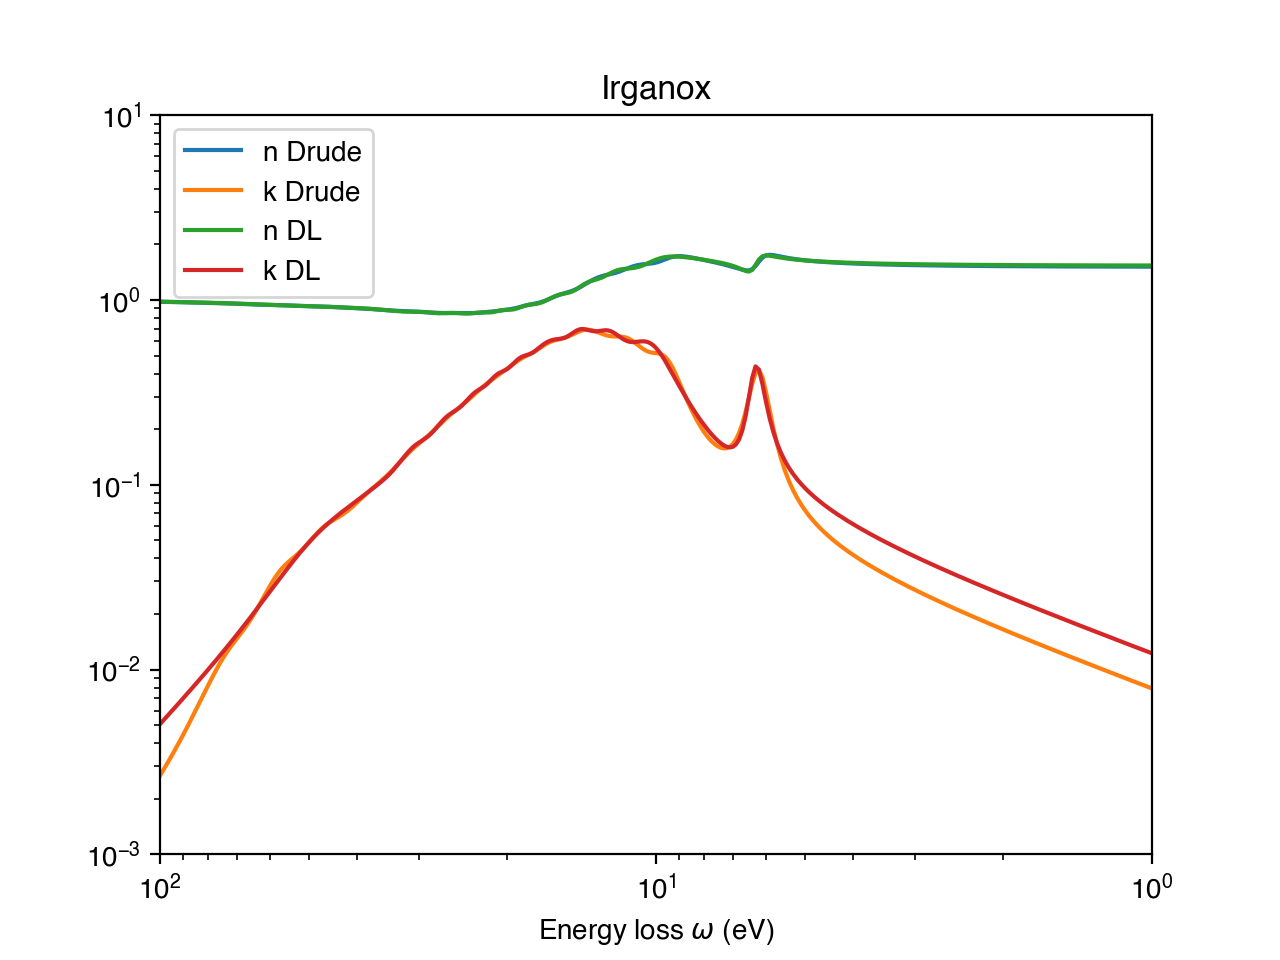

In [27]:
irganox_drude.calculateOpticalConstants()

plt.figure()
plt.plot(irganox_drude.eloss,irganox_drude.refractive_index,label='n Drude')
plt.plot(irganox_drude.eloss,irganox_drude.extinction_coefficient,label='k Drude')
plt.yscale('log')
plt.xscale('log')
plt.xlabel('Energy loss $\omega$ (eV)')
plt.xlim(100,1)
plt.ylim(0.001,10)
plt.title(f'{irganox_drude.name}')

irganox_dl.calculateOpticalConstants_()
plt.plot(irganox_dl.eloss,irganox_dl.refractive_index,label='n DL')
plt.plot(irganox_dl.eloss,irganox_dl.extinction_coefficient,label='k DL')

plt.legend()
plt.show()

irganox_drude.writeOpticalData()

**Kapton**

In [28]:
# A = [30.3300, 9.3000, 23.8700, 42.6400, 42.3600, 35.4100, 71.0900, 38.1300, 31.0700, 32.3500, 30.4500, 27.7000, 10.89]
# gamma = [1.9000, 1.5000, 2.5000, 3.5000, 5.0, 6.3000, 10.1000, 10.2000, 11.6000, 15.2000, 17.7000, 14.1000, 8.7000]
# omega = [5.5000, 8.7000, 10.1000, 11.8000, 14.2000, 16.7000, 20.1000, 25.3000, 31.4000, 38.2000, 47.5000, 57.0, 66.1000]

A = [32.183, 9.807, 25.652, 43.839, 45.603, 35.486, 70.359, 36.342, 30.895, 31.432, 29.276, 24.873, 10.33]
gamma = [1.669, 1.377, 2.4, 3.414, 5.019, 6.228, 9.931, 9.787, 11.488, 15.25, 16.904, 12.512, 8.022]
omega = [5.497, 8.59, 9.908, 11.617, 14.02, 16.606, 20.064, 25.298, 31.198, 37.457, 45.913, 55.821, 64.864]

M = (22 * 12.01 + 2 * 14.007 + 5 * 15.999 + 10 * 1.01) / (22 + 2 + 5 + 10) # Molar weight
rho = 1.42 # g/cm3

oscillators = opt.Oscillators('Drude', A, gamma, omega, alpha = 0)
composition = opt.Composition(['c','n','o','h'], [22,2,5,10])
eloss = opt.linspace(opt.machine_eps,100,0.1)
q = 0

kapton_drude = opt.Material('Kapton', oscillators, composition, eloss, q, xraypath)
kapton_drude.Eg = 4.2
kapton_drude.width_of_the_valence_band = 10
kapton_drude.atomic_density = rho * opt.N_Avogadro / M *1e-24
kapton_drude.static_refractive_index = 1.754
kapton_drude.electron_density = 0.309
kapton_drude.Z = 5

print(f'osc.A = [{" ".join([str(i) for i in kapton_drude.oscillators.A.round(3).tolist()])}];')
print(f'osc.G = [{" ".join([str(i) for i in kapton_drude.oscillators.gamma.round(3).tolist()])}];')
print(f'osc.Om = [{" ".join([str(i) for i in kapton_drude.oscillators.omega.round(3).tolist()])}];')

osc.A = [32.183 9.807 25.652 43.839 45.603 35.486 70.359 36.342 30.895 31.432 29.276 24.873 10.33];
osc.G = [1.669 1.377 2.4 3.414 5.019 6.228 9.931 9.787 11.488 15.25 16.904 12.512 8.022];
osc.Om = [5.497 8.59 9.908 11.617 14.02 16.606 20.064 25.298 31.198 37.457 45.913 55.821 64.864];


In [25]:
fsum = kapton_drude.evaluateFsum()
print('FSum = {}'.format(fsum))
print('Z = {}'.format(kapton_drude.Z))

kksum = kapton_drude.evaluateKKsum()
print('KKSum = {}'.format(kksum))

FSum = 5.005352654363532
Z = 5
KKSum = 1.0373578486796602


Start optimisation
FSum = 5.005349311855177
Z = 5
KKSum = 1.0373566083036898
A = [32.183, 9.807, 25.652, 43.839, 45.603, 35.486, 70.359, 36.342, 30.895, 31.432, 29.276, 24.873, 10.33]
gamma = [1.669, 1.377, 2.4, 3.414, 5.019, 6.228, 9.931, 9.787, 11.488, 15.25, 16.904, 12.512, 8.022]
omega = [5.497, 8.59, 9.908, 11.617, 14.02, 16.606, 20.064, 25.298, 31.198, 37.457, 45.913, 55.821, 64.864]


<IPython.core.display.Javascript object>


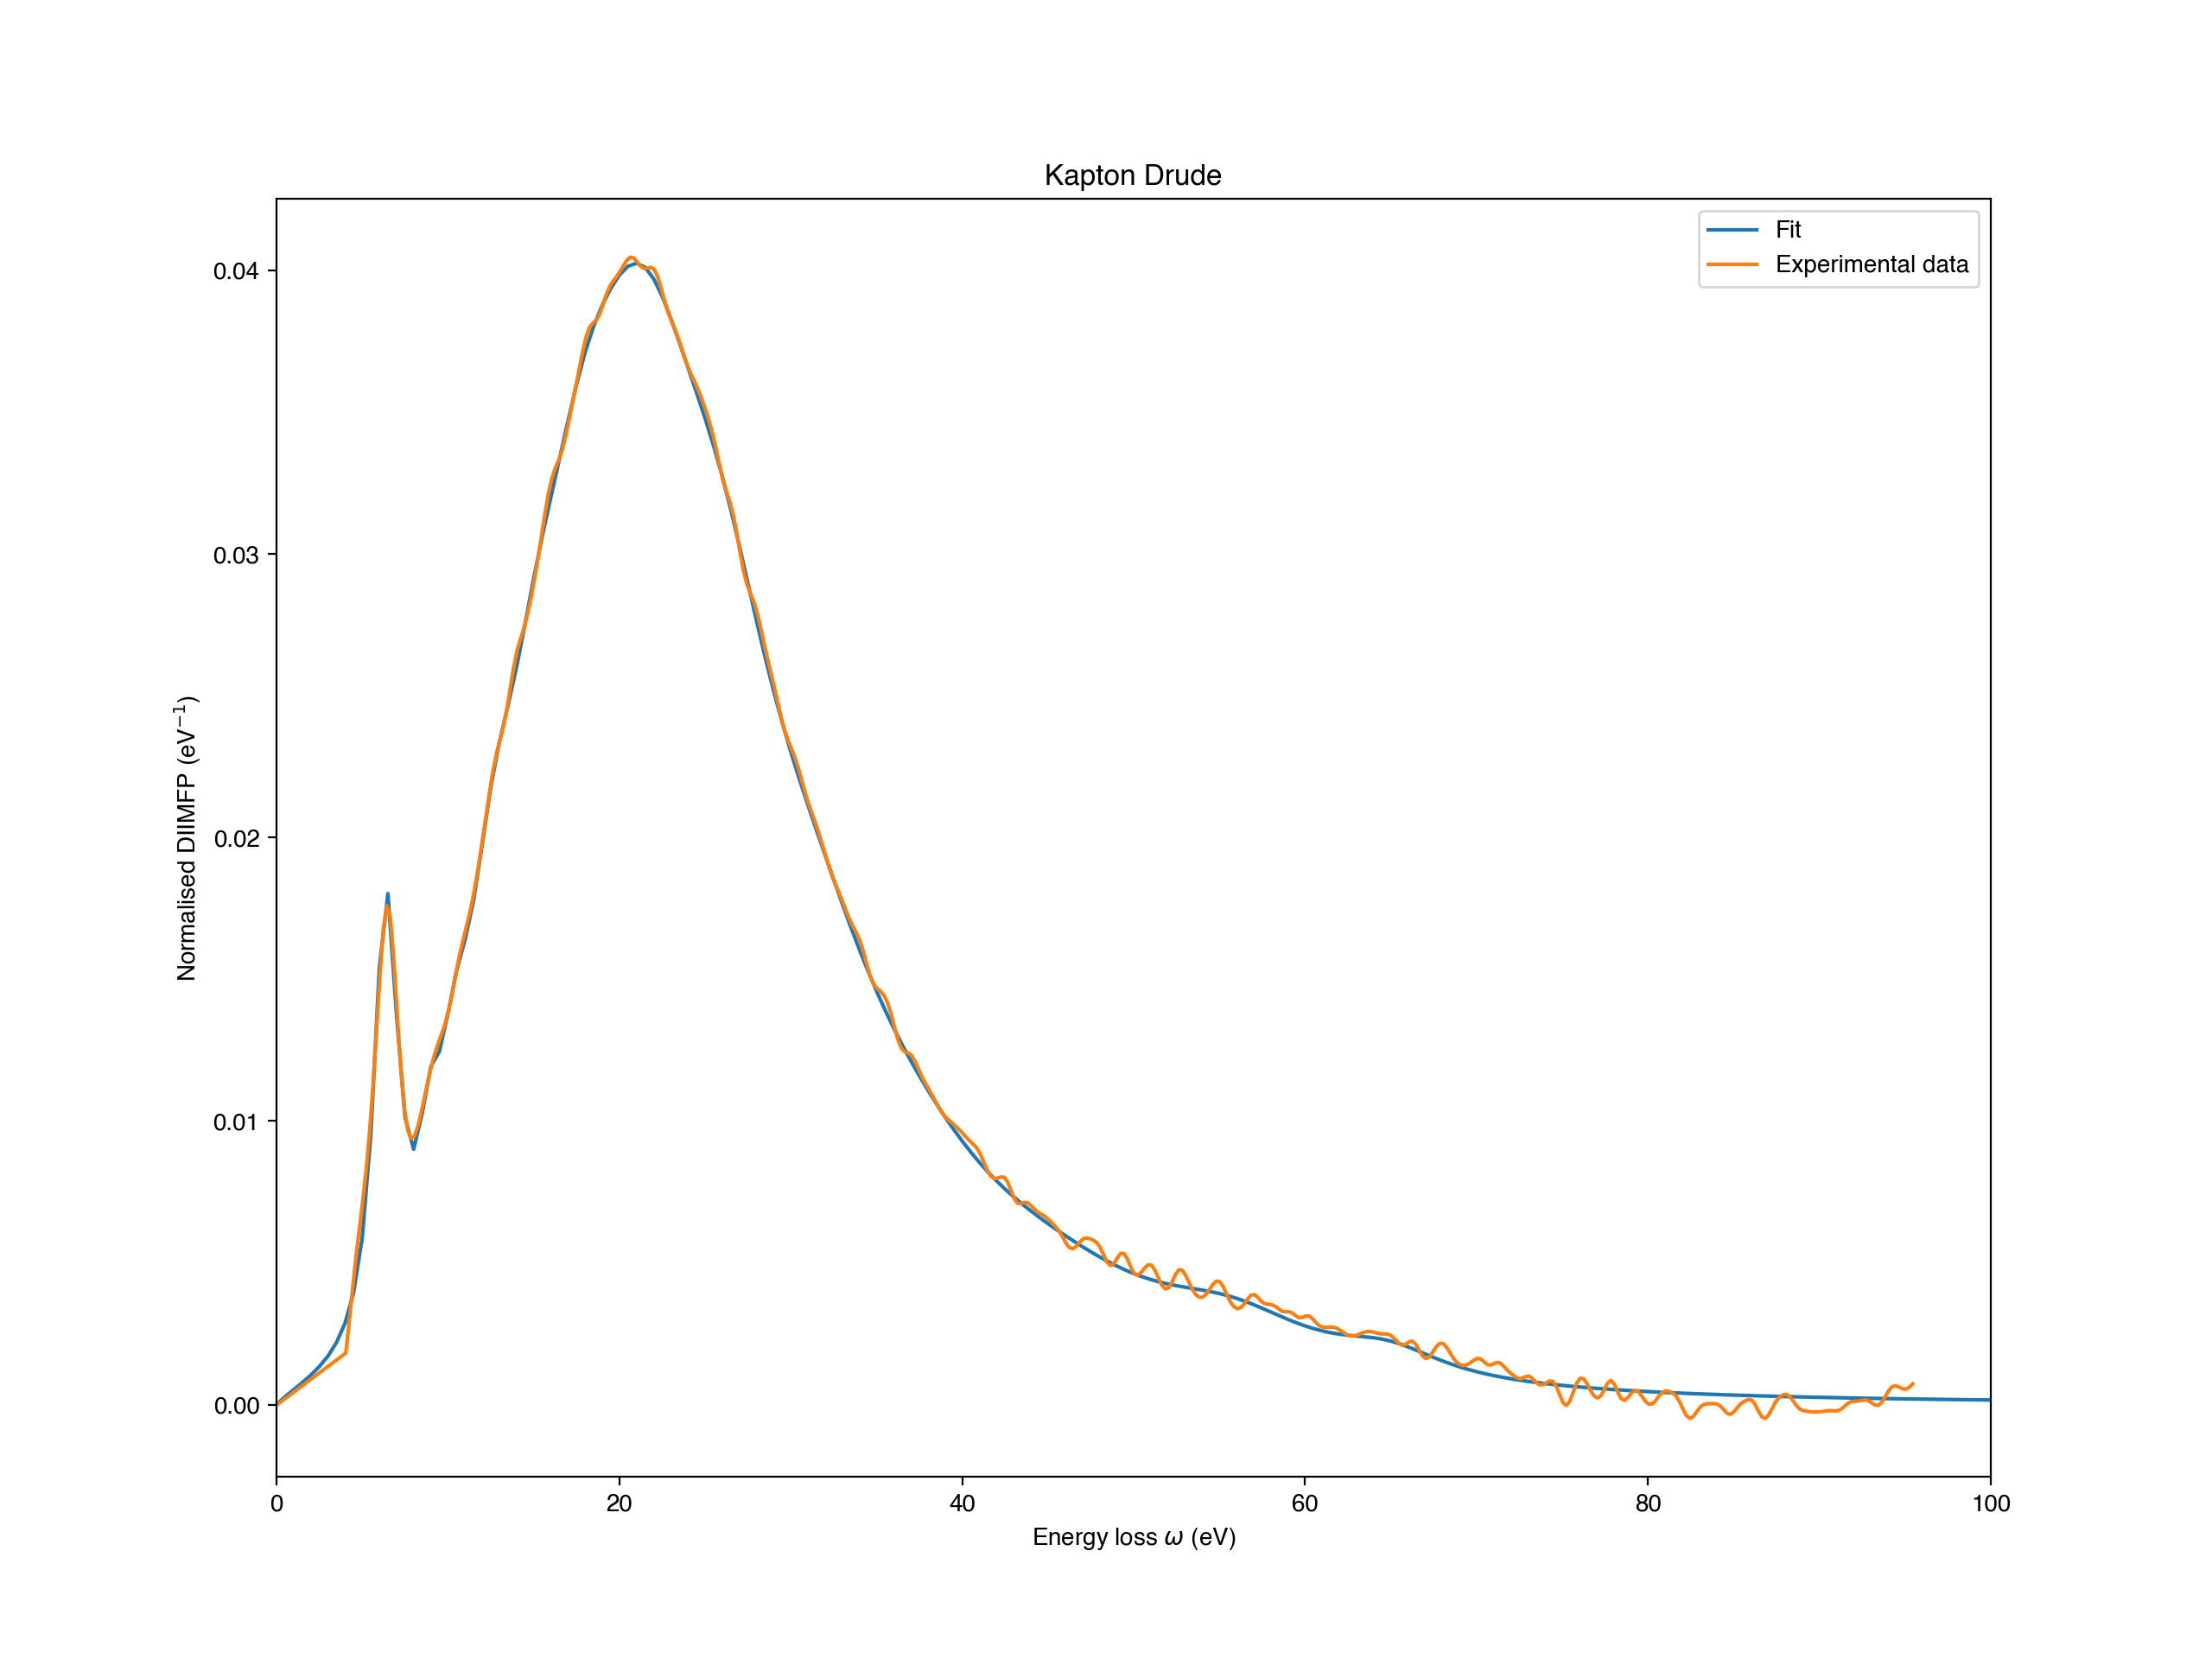

In [8]:
fd = pd.read_csv('../diimfp/kapton_diimfp.dat',sep=' ',header=None)
exp_diimfp = fd.values
x_exp = exp_diimfp[:,0]
y_exp = exp_diimfp[:,1]

opt_ = opt.OptFit(kapton_drude, x_exp, y_exp, 1600)
result = opt_.runOptimisation('ndiimfp', maxeval = 5000, xtol_rel = 1e-12)
oscOptimised = opt_.vec2Struct(result)

fsum = oscOptimised.evaluateFsum()
print('FSum = {}'.format(fsum))
print('Z = {}'.format(oscOptimised.Z))

kksum = oscOptimised.evaluateKKsum()
print('KKSum = {}'.format(kksum))

print(f'A = [{", ".join([str(i) for i in oscOptimised.oscillators.A.round(3).tolist()])}]')
print(f'gamma = [{", ".join([str(i) for i in oscOptimised.oscillators.gamma.round(3).tolist()])}]')
print(f'omega = [{", ".join([str(i) for i in oscOptimised.oscillators.omega.round(3).tolist()])}]')

oscOptimised.calculateDIIMFP(opt_.E0)

plt.figure()
plt.plot(oscOptimised.DIIMFP_E,oscOptimised.DIIMFP,label='Fit')
plt.plot(x_exp,y_exp,label='Experimental data')
plt.xlabel('Energy loss $\omega$ (eV)')
plt.ylabel('Normalised DIIMFP (eV$^{-1}$)')
plt.title(f'{oscOptimised.name} {oscOptimised.oscillators.model}')
plt.legend()
plt.xlim(0,100)
plt.show()

In [29]:
#A = [0.06, 0.017, 0.021, 0.05, 0.026, 0.062, 0.048, 0.035, 0.045, 0.031, 0.059, 0.031, 0.041, 0.004, 0.063, 0.024, 0.026, 0.01, 0.027]
#gamma = [1.66, 4.65, 3.3, 3.67, 2.84, 3.53, 3.12, 3.1, 3.97, 4.43, 6.01, 5.65, 6.7, 6.87, 10.9, 15.87, 13.52, 59.05, 22.89]
#omega = [6.44, 9.87, 10.34, 12.71, 14.26, 16.13, 18.09, 19.75, 21.32, 22.54, 24.33, 25.61, 27.97, 28.57, 32.36, 32.96, 40.32, 40.91, 55.29]

A = [0.048, 0.018, 0.041, 0.02, 0.081, 0.045, 0.052, 0.119, 0.122, 0.038, 0.042, 0.028, 0.021]
gamma = [1.326, 3.526, 3.593, 2.554, 4.479, 3.745, 4.53, 7.703, 11.122, 12.459, 98.707, 36.772, 28.252]
omega = [6.44, 10.135, 12.451, 14.225, 16.549, 18.862, 21.043, 23.84, 28.261, 35.181, 36.657, 43.673, 49.898]

M = (22 * 12.01 + 2 * 14.007 + 5 * 15.999 + 10 * 1.01) / (22 + 2 + 5 + 10) # Molar weight
rho = 1.42 # g/cm3

oscillators = opt.Oscillators('DrudeLindhard', A, gamma, omega, alpha = 0)
composition = opt.Composition(['c','n','o','h'], [22,2,5,10])
eloss = opt.linspace(opt.machine_eps,100,0.1)
q = 0

kapton_dl = opt.Material('Kapton', oscillators, composition, eloss, q, xraypath)
kapton_dl.Eg = 4.2
kapton_dl.width_of_the_valence_band = 10
kapton_dl.atomic_density = rho * opt.N_Avogadro / M *1e-24
kapton_dl.static_refractive_index = 1.754
kapton_dl.electron_density = 0.309
kapton_dl.Z = 5

fsum = kapton_dl.evaluateFsum()
print('FSum = {}'.format(fsum))
print('Z = {}'.format(kapton_dl.Z))

kksum = kapton_dl.evaluateKKsum()
print('KKSum = {}'.format(kksum))

print(f'osc.A = [{" ".join([str(i) for i in kapton_dl.oscillators.A.round(3).tolist()])}];')
print(f'osc.G = [{" ".join([str(i) for i in kapton_dl.oscillators.gamma.round(3).tolist()])}];')
print(f'osc.Om = [{" ".join([str(i) for i in kapton_dl.oscillators.omega.round(3).tolist()])}];')

FSum = 4.824094613721021
Z = 5
KKSum = 1.0004294917044505
osc.A = [0.048 0.018 0.041 0.02 0.081 0.045 0.052 0.119 0.122 0.038 0.042 0.028 0.021];
osc.G = [1.326 3.526 3.593 2.554 4.479 3.745 4.53 7.703 11.122 12.459 98.707 36.772 28.252];
osc.Om = [6.44 10.135 12.451 14.225 16.549 18.862 21.043 23.84 28.261 35.181 36.657 43.673 49.898];


Start optimisation
FSum = 4.819999172688639
Z = 5
KKSum = 1.0004316833244575
A = [0.048, 0.018, 0.041, 0.02, 0.081, 0.045, 0.052, 0.119, 0.122, 0.038, 0.042, 0.028, 0.021]
gamma = [1.326, 3.526, 3.593, 2.554, 4.479, 3.745, 4.53, 7.703, 11.122, 12.459, 98.707, 36.772, 28.252]
omega = [6.44, 10.135, 12.451, 14.225, 16.549, 18.862, 21.043, 23.84, 28.261, 35.181, 36.657, 43.673, 49.898]


<IPython.core.display.Javascript object>


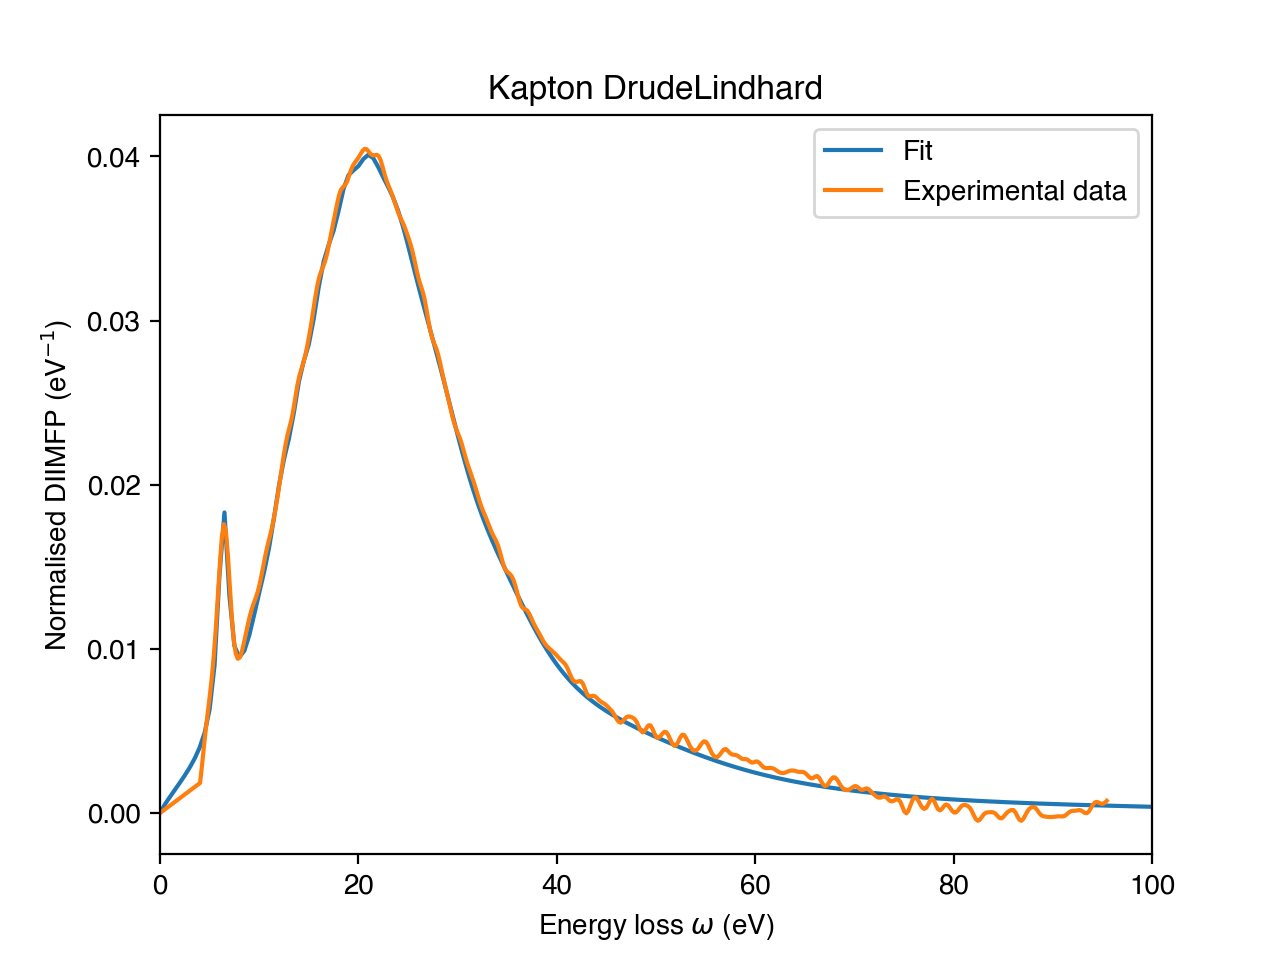

In [12]:
fd = pd.read_csv('../diimfp/kapton_diimfp.dat',sep=' ',header=None)
exp_diimfp = fd.values
x_exp = exp_diimfp[:,0]
y_exp = exp_diimfp[:,1]

opt_ = opt.OptFit(kapton_dl, x_exp, y_exp, 1600)
result = opt_.runOptimisation('ndiimfp', maxeval = 5000, xtol_rel = 1e-12)
oscOptimised = opt_.vec2Struct(result)

fsum = oscOptimised.evaluateFsum()
print('FSum = {}'.format(fsum))
print('Z = {}'.format(oscOptimised.Z))

kksum = oscOptimised.evaluateKKsum()
print('KKSum = {}'.format(kksum))

print(f'A = [{", ".join([str(i) for i in oscOptimised.oscillators.A.round(3).tolist()])}]')
print(f'gamma = [{", ".join([str(i) for i in oscOptimised.oscillators.gamma.round(3).tolist()])}]')
print(f'omega = [{", ".join([str(i) for i in oscOptimised.oscillators.omega.round(3).tolist()])}]')

oscOptimised.calculateDIIMFP(opt_.E0)

plt.figure()
plt.plot(oscOptimised.DIIMFP_E,oscOptimised.DIIMFP,label='Fit')
plt.plot(x_exp,y_exp,label='Experimental data')
plt.xlabel('Energy loss $\omega$ (eV)')
plt.ylabel('Normalised DIIMFP (eV$^{-1}$)')
plt.title(f'{oscOptimised.name} {oscOptimised.oscillators.model}')
plt.legend()
plt.xlim(0,100)
plt.show()

<IPython.core.display.Javascript object>


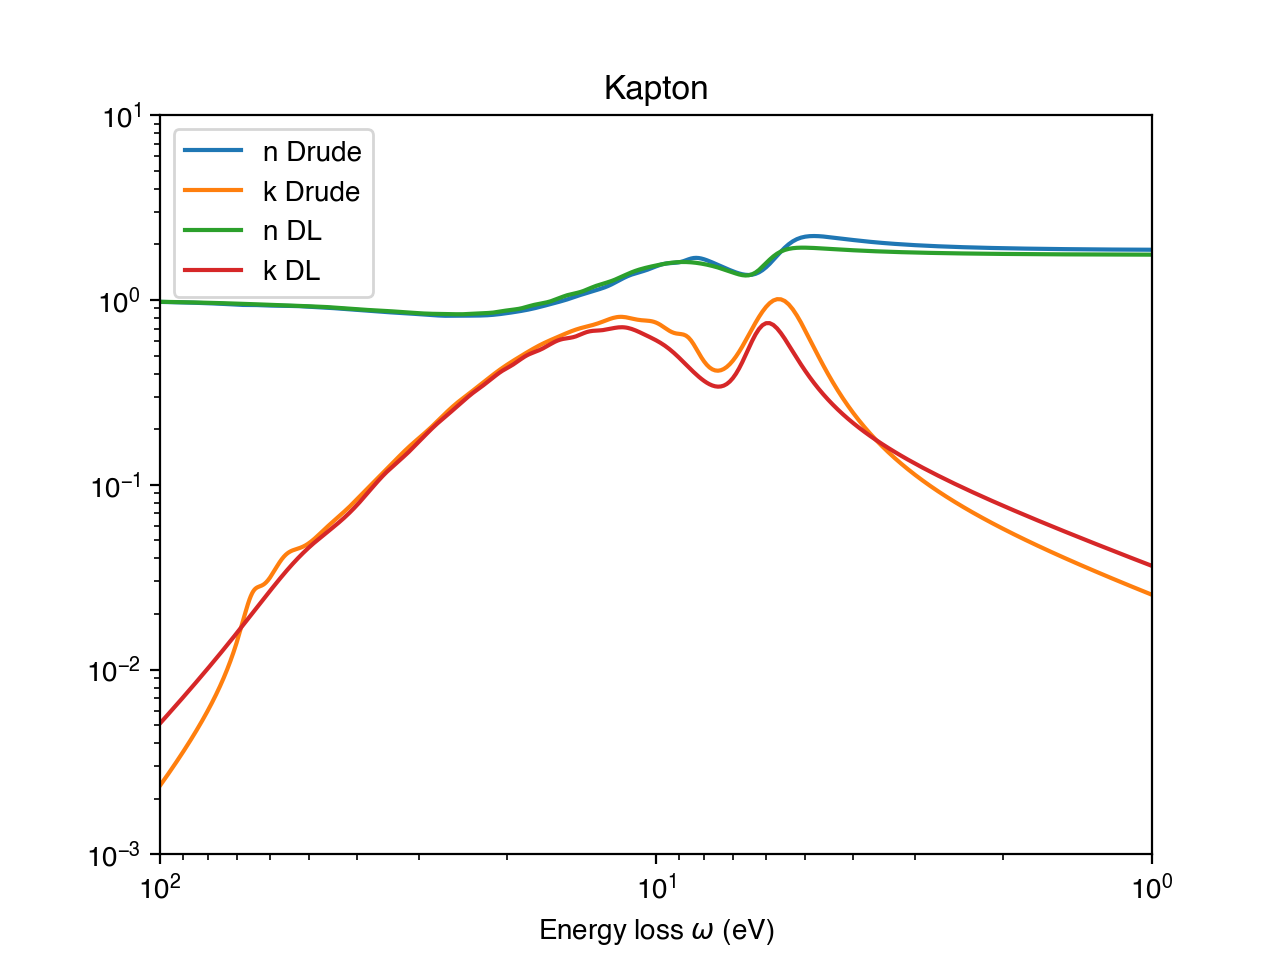

In [30]:
kapton_drude.calculateOpticalConstants()

plt.figure()
plt.plot(kapton_drude.eloss,kapton_drude.refractive_index,label='n Drude')
plt.plot(kapton_drude.eloss,kapton_drude.extinction_coefficient,label='k Drude')
plt.yscale('log')
plt.xscale('log')
plt.xlabel('Energy loss $\omega$ (eV)')
plt.xlim(100,1)
plt.ylim(0.001,10)
plt.title(f'{kapton_drude.name}')

kapton_dl.calculateOpticalConstants_()
plt.plot(kapton_dl.eloss,kapton_dl.refractive_index,label='n DL')
plt.plot(kapton_dl.eloss,kapton_dl.extinction_coefficient,label='k DL')

plt.legend()
plt.show()

kapton_drude.writeOpticalData()

**PE**

In [7]:
# A = [30.9649, 33.8626, 33.8368, 29.324 , 26.0666, 27.1075, 27.4519, 10.9467, 12.1362, 18.0936, 20.9278, 34.1272, 20.536,  8.4471]
# gamma = [0.6, 1.5, 2.6, 2.9, 3.6, 11.9, 4.4, 3.4, 3.9, 6.7, 12.1, 14.3, 16.8, 89.7]
# omega = [7.9, 8.4, 9.7, 10.9, 12.5, 14.8, 14.9, 17.3, 19.5, 22.2, 26.0, 26.1, 31.2, 72.0]

A = [46.756, 32.41, 32.744, 30.936, 22.237, 26.408, 27.192, 10.514, 12.4, 18.2, 19.23, 34.227, 20.43]
gamma = [0.543, 1.324, 2.303, 2.902, 3.413, 11.551, 4.273, 3.307, 3.801, 6.477, 11.59, 13.44, 15.978]
omega = [7.8, 8.247, 9.754, 11.033, 12.617, 15.735, 14.889, 17.253, 19.519, 22.273, 26.339, 26.062, 31.873]

M = (2 * 12.01 + 4 * 1.01) / (2 + 4) # Molar weight
rho = 0.94 # g/cm3

oscillators = opt.Oscillators('Drude', A, gamma, omega, alpha = 0)
composition = opt.Composition(['c','h'], [2,4]) # well defined quantity
eloss = opt.linspace(opt.machine_eps,100,0.1)
q = 0

pe_drude = opt.Material('PE', oscillators, composition, eloss, q, xraypath)
pe_drude.Eg = 7.5
pe_drude.width_of_the_valence_band = 10
pe_drude.atomic_density = rho * opt.N_Avogadro / M *1e-24
pe_drude.static_refractive_index = 1.519
pe_drude.electron_density = 0.242
pe_drude.Z = 2.7
pe_drude.use_henke_for_ne = True

fsum = pe_drude.evaluateFsum()
print('FSum = {}'.format(fsum))
print('Z = {}'.format(pe_drude.Z))

kksum = pe_drude.evaluateKKsum()
print('KKSum = {}'.format(kksum))

print(f'osc.A = [{" ".join([str(i) for i in pe_drude.oscillators.A.round(3).tolist()])}];')
print(f'osc.G = [{" ".join([str(i) for i in pe_drude.oscillators.gamma.round(3).tolist()])}];')
print(f'osc.Om = [{" ".join([str(i) for i in pe_drude.oscillators.omega.round(3).tolist()])}];')

FSum = 2.6197430265305406
Z = 2.7
KKSum = 1.0167341839374602
osc.A = [46.756 32.41 32.744 30.936 22.237 26.408 27.192 10.514 12.4 18.2 19.23 34.227 20.43];
osc.G = [0.543 1.324 2.303 2.902 3.413 11.551 4.273 3.307 3.801 6.477 11.59 13.44 15.978];
osc.Om = [7.8 8.247 9.754 11.033 12.617 15.735 14.889 17.253 19.519 22.273 26.339 26.062 31.873];


Start optimisation
FSum = 2.6216275512043197
Z = 2.7
KKSum = 1.0173614899170296
A = [47.191, 32.339, 32.737, 30.927, 22.225, 26.206, 27.374, 10.513, 12.443, 18.101, 18.936, 34.517, 20.447]
gamma = [0.534, 1.31, 2.271, 2.901, 3.429, 11.508, 4.279, 3.311, 3.807, 6.448, 11.512, 13.479, 15.871]
omega = [7.784, 8.253, 9.749, 11.049, 12.614, 15.769, 14.889, 17.268, 19.529, 22.292, 26.287, 26.113, 31.876]


<IPython.core.display.Javascript object>


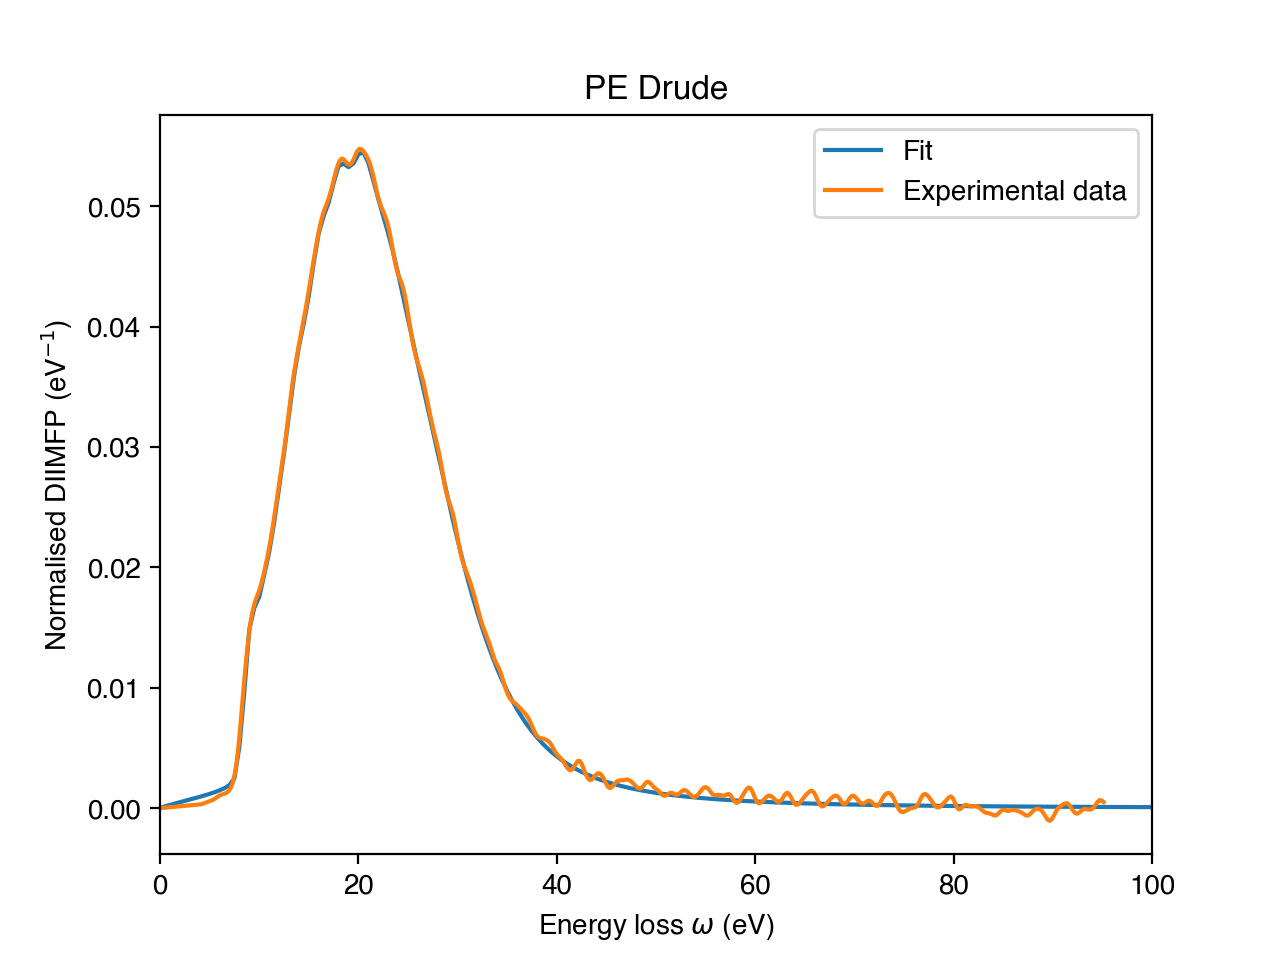

In [8]:
fd = pd.read_csv('../diimfp/pe_diimfp.dat',sep=' ',header=None)
exp_diimfp = fd.values
x_exp = exp_diimfp[:,0]
y_exp = exp_diimfp[:,1]

opt_ = opt.OptFit(pe_drude, x_exp, y_exp, 1600)
result = opt_.runOptimisation('ndiimfp', maxeval = 1000, xtol_rel = 1e-12)
oscOptimised = opt_.vec2Struct(result)

fsum = oscOptimised.evaluateFsum()
print('FSum = {}'.format(fsum))
print('Z = {}'.format(oscOptimised.Z))

kksum = oscOptimised.evaluateKKsum()
print('KKSum = {}'.format(kksum))

print(f'A = [{", ".join([str(i) for i in oscOptimised.oscillators.A.round(3).tolist()])}]')
print(f'gamma = [{", ".join([str(i) for i in oscOptimised.oscillators.gamma.round(3).tolist()])}]')
print(f'omega = [{", ".join([str(i) for i in oscOptimised.oscillators.omega.round(3).tolist()])}]')

oscOptimised.calculateDIIMFP(opt_.E0)

plt.figure()
plt.plot(oscOptimised.DIIMFP_E,oscOptimised.DIIMFP,label='Fit')
plt.plot(x_exp,y_exp,label='Experimental data')
plt.xlabel('Energy loss $\omega$ (eV)')
plt.ylabel('Normalised DIIMFP (eV$^{-1}$)')
plt.title(f'{oscOptimised.name} {oscOptimised.oscillators.model}')
plt.legend()
plt.xlim(0,100)
plt.show()

In [54]:
A = [0.018, 0.099, 0.124, 0.092, 0.109, 0.097, 0.077, 0.114]
gamma = [1.62, 4.4, 4.46, 3.89, 4.43, 5.46, 7.03, 12.42]
omega = [9.79, 13.07, 15.79, 18.09, 20.57, 23.22, 26.31, 29.92]

M = (2 * 12.01 + 4 * 1.01) / (2 + 4) # Molar weight
rho = 0.94 # g/cm3

oscillators = opt.Oscillators('DrudeLindhard', A, gamma, omega, alpha = 0)
composition = opt.Composition(['c','h'], [2,4])
eloss = opt.linspace(opt.machine_eps,100,0.1)
q = 0

pe_dl = opt.Material('PE', oscillators, composition, eloss, q, xraypath)
pe_dl.Eg = 7.5
pe_dl.width_of_the_valence_band = 6
pe_dl.atomic_density = rho * opt.N_Avogadro / M *1e-24
pe_dl.static_refractive_index = 1.519
pe_dl.electron_density = 0.2421
pe_dl.Z = 2.667

fsum = pe_dl.evaluateFsum()
print('FSum = {}'.format(fsum))
print('Z = {}'.format(pe_dl.Z))

kksum = pe_dl.evaluateKKsum()
print('KKSum = {}'.format(kksum))

print(f'osc.A = [{" ".join([str(i) for i in pe_dl.oscillators.A.round(3).tolist()])}];')
print(f'osc.G = [{" ".join([str(i) for i in pe_dl.oscillators.gamma.round(3).tolist()])}];')
print(f'osc.Om = [{" ".join([str(i) for i in pe_dl.oscillators.omega.round(3).tolist()])}];')

FSum = 2.5982251647187384
Z = 2.667
KKSum = 1.1641918196593373
osc.A = [0.018 0.099 0.124 0.092 0.109 0.097 0.077 0.114];
osc.G = [1.62 4.4 4.46 3.89 4.43 5.46 7.03 12.42];
osc.Om = [9.79 13.07 15.79 18.09 20.57 23.22 26.31 29.92];


Start optimisation
FSum = 2.4448953188737894
Z = 2.667
KKSum = 0.9999224510196529
A = [0.002, 0.011, 0.004, 0.164, 0.003, 0.106, 0.076, 0.028, 0.069, 0.037, 0.068]
gamma = [3.922, 2.155, 6.255, 8.383, 1.04, 3.907, 3.167, 2.293, 41.201, 6.408, 24.79]
omega = [9.052, 11.575, 17.196, 24.862, 22.316, 17.813, 14.516, 20.54, 36.971, 21.192, 28.65]


<IPython.core.display.Javascript object>


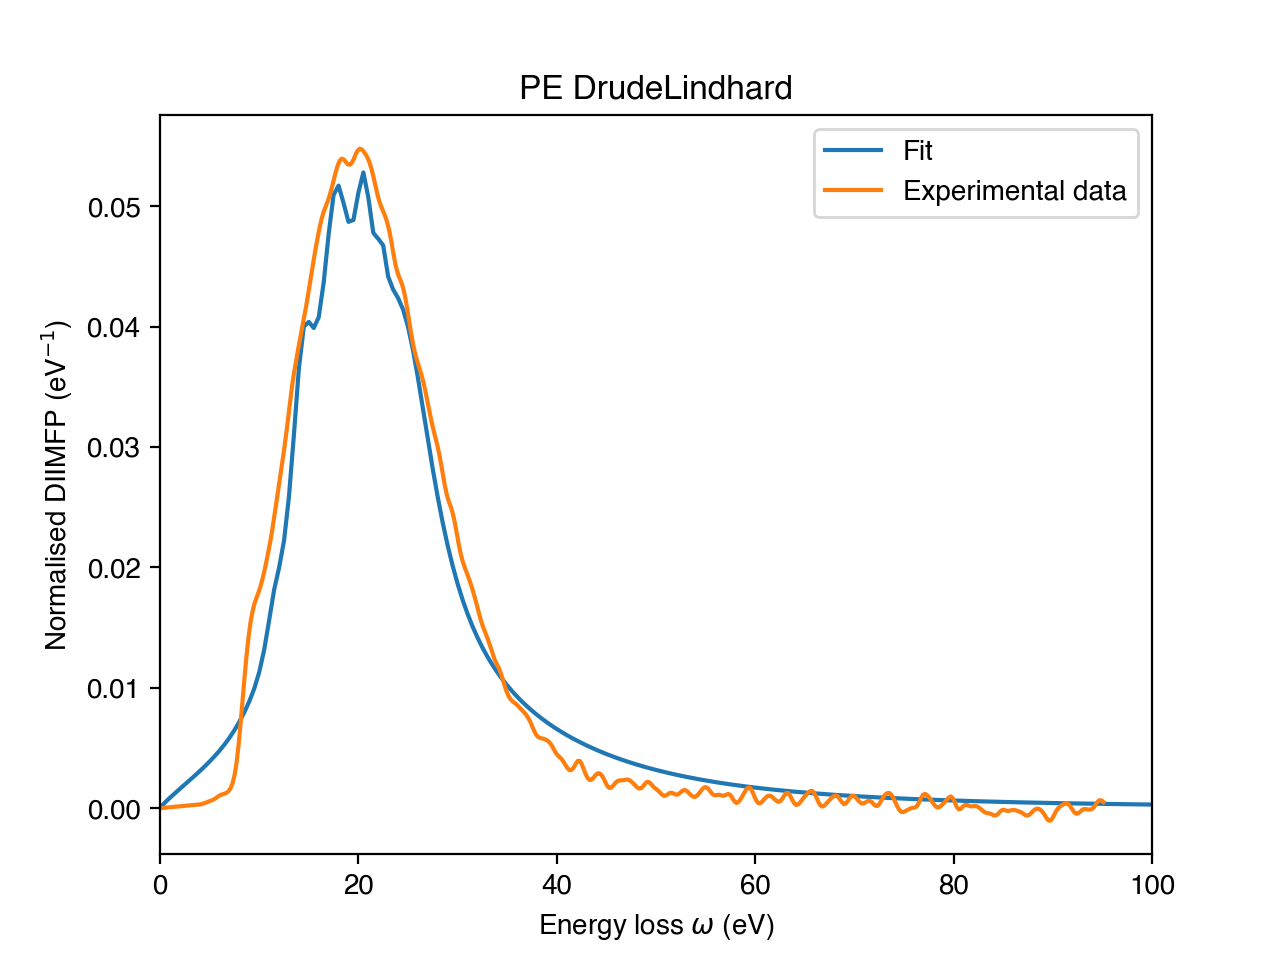

In [53]:
fd = pd.read_csv('../diimfp/pe_diimfp.dat',sep=' ',header=None)
exp_diimfp = fd.values
x_exp = exp_diimfp[:,0]
y_exp = exp_diimfp[:,1]

opt_ = opt.OptFit(pe_dl, x_exp, y_exp, 1600)
result = opt_.runOptimisation('ndiimfp', maxeval = 2000, xtol_rel = 1e-12)
oscOptimised = opt_.vec2Struct(result)

fsum = oscOptimised.evaluateFsum()
print('FSum = {}'.format(fsum))
print('Z = {}'.format(oscOptimised.Z))

kksum = oscOptimised.evaluateKKsum()
print('KKSum = {}'.format(kksum))

print(f'A = [{", ".join([str(i) for i in oscOptimised.oscillators.A.round(3).tolist()])}]')
print(f'gamma = [{", ".join([str(i) for i in oscOptimised.oscillators.gamma.round(3).tolist()])}]')
print(f'omega = [{", ".join([str(i) for i in oscOptimised.oscillators.omega.round(3).tolist()])}]')

oscOptimised.calculateDIIMFP(opt_.E0)

plt.figure()
plt.plot(oscOptimised.DIIMFP_E,oscOptimised.DIIMFP,label='Fit')
plt.plot(x_exp,y_exp,label='Experimental data')
plt.xlabel('Energy loss $\omega$ (eV)')
plt.ylabel('Normalised DIIMFP (eV$^{-1}$)')
plt.title(f'{oscOptimised.name} {oscOptimised.oscillators.model}')
plt.legend()
plt.xlim(0,100)
plt.show()

<IPython.core.display.Javascript object>


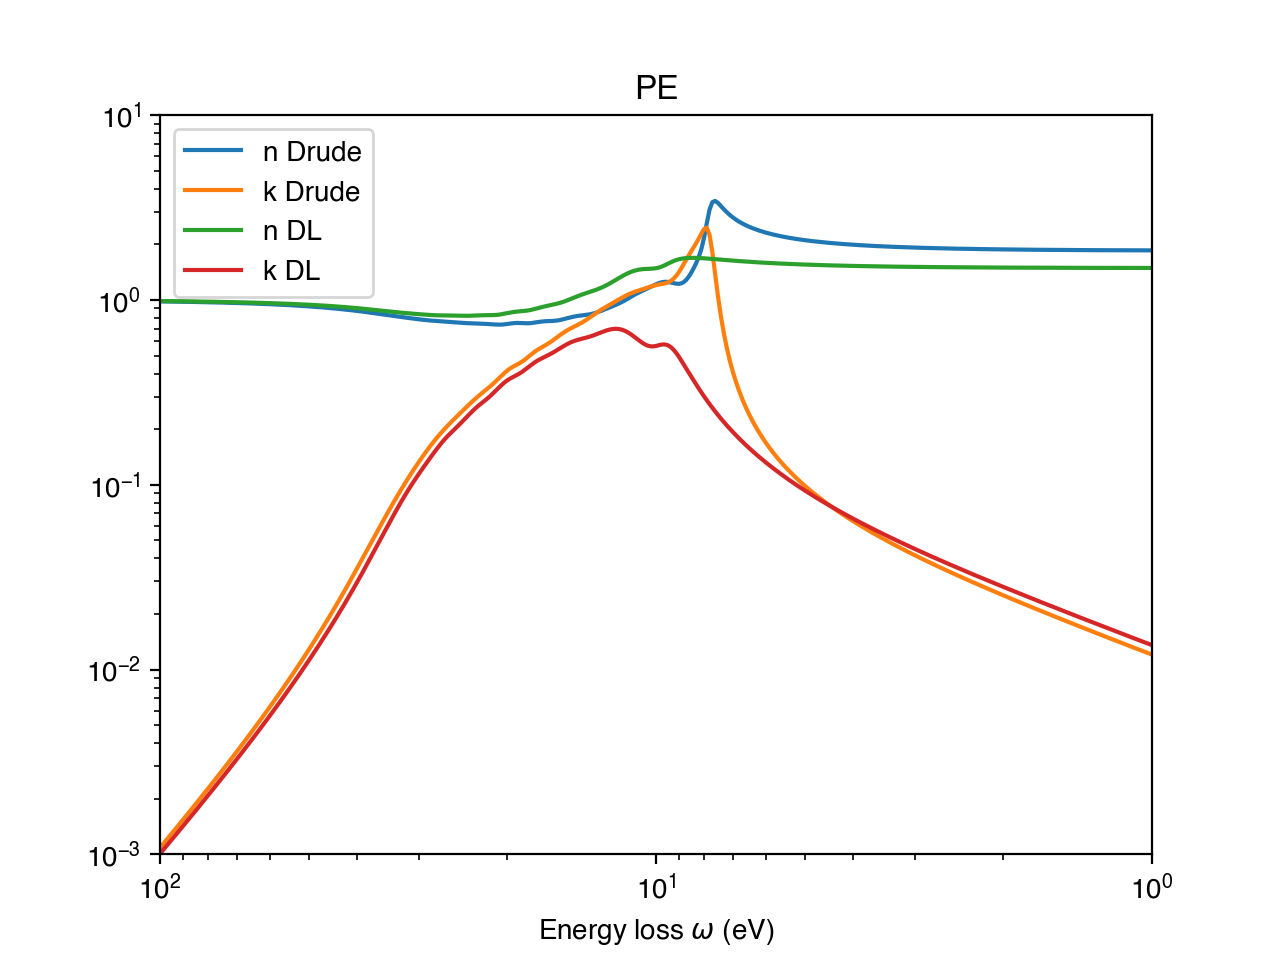

In [42]:
pe_drude.calculateOpticalConstants()

plt.figure()
plt.plot(pe_drude.eloss, pe_drude.refractive_index, label='n Drude')
plt.plot(pe_drude.eloss, pe_drude.extinction_coefficient, label='k Drude')
plt.yscale('log')
plt.xscale('log')
plt.xlabel('Energy loss $\omega$ (eV)')
plt.xlim(100,1)
plt.ylim(0.001,10)
plt.title(f'{pe_drude.name}')

pe_dl.calculateOpticalConstants_()
plt.plot(pe_dl.eloss, pe_dl.refractive_index, label='n DL')
plt.plot(pe_dl.eloss, pe_dl.extinction_coefficient, label='k DL')

plt.legend()
plt.show()

pe_drude.writeOpticalData()

**PMMA**

In [55]:
A = [11.9637, 25.1598, 22.138 , 26.6971, 27.7229, 29.5537, 27.6149, 23.4497, 39.2408, 28.3709, 28.4939, 22.4436, 16.7607, 19.9005, 41.9562]
gamma = [2.1, 2.2, 2.1, 2.6, 3.1, 4.0, 5.1, 6.1, 9.3, 11.6, 15.8, 16.6, 21.2, 22.3, 41.6]
omega = [9.3, 10.5, 11.9, 13.2, 14.6, 16.5, 18.7, 21.2, 24.2, 28.5, 32.0, 36.3, 44.6, 48.4 ,62.0]

M = (5 * 12.01 + 2 * 15.999 + 8 * 1.01) / (5 + 2 + 8) # Molar weight
rho = 1.18 # g/cm3

oscillators = opt.Oscillators('Drude', A, gamma, omega, alpha = 0)
composition = opt.Composition(['c','o','h'], [5,2,8])
eloss = opt.linspace(opt.machine_eps,100,0.1)
q = 0

pmma_drude = opt.Material('PMMA', oscillators, composition, eloss, q, xraypath)
pmma_drude.Eg = 6.7
pmma_drude.width_of_the_valence_band = 10
pmma_drude.atomic_density = rho * opt.N_Avogadro / M *1e-24
pmma_drude.static_refractive_index = 1.4813 # 1.49
pmma_drude.electron_density = 0.284
pmma_drude.Z = 3.6

fsum = pmma_drude.evaluateFsum()
print('FSum = {}'.format(fsum))
print('Z = {}'.format(pmma_drude.Z))

kksum = pmma_drude.evaluateKKsum()
print('KKSum = {}'.format(kksum))

print(f'osc.A = [{" ".join([str(i) for i in pmma_drude.oscillators.A.round(3).tolist()])}];')
print(f'osc.G = [{" ".join([str(i) for i in pmma_drude.oscillators.gamma.round(3).tolist()])}];')
print(f'osc.Om = [{" ".join([str(i) for i in pmma_drude.oscillators.omega.round(3).tolist()])}];')

FSum = 3.513220331900462
Z = 3.6
KKSum = 1.006328678207583
osc.A = [11.964 25.16 22.138 26.697 27.723 29.554 27.615 23.45 39.241 28.371 28.494 22.444 16.761 19.9 41.956];
osc.G = [2.1 2.2 2.1 2.6 3.1 4.0 5.1 6.1 9.3 11.6 15.8 16.6 21.2 22.3 41.6];
osc.Om = [9.3 10.5 11.9 13.2 14.6 16.5 18.7 21.2 24.2 28.5 32.0 36.3 44.6 48.4 62.0];


Start optimisation
FSum = 3.5288672650671495
Z = 3.6
KKSum = 1.0225267724997873
A = [8.489, 46.443, 20.887, 25.315, 25.732, 27.919, 26.13, 22.384, 41.386, 27.162, 26.637, 22.337, 15.508, 17.856, 37.419]
gamma = [2.352, 2.599, 2.383, 3.166, 3.498, 3.97, 5.04, 6.034, 9.328, 11.293, 14.974, 16.761, 21.233, 22.553, 42.008]
omega = [9.261, 10.682, 12.266, 13.479, 14.552, 16.494, 18.815, 21.241, 24.268, 28.705, 32.427, 36.531, 44.525, 48.314, 60.288]


<IPython.core.display.Javascript object>


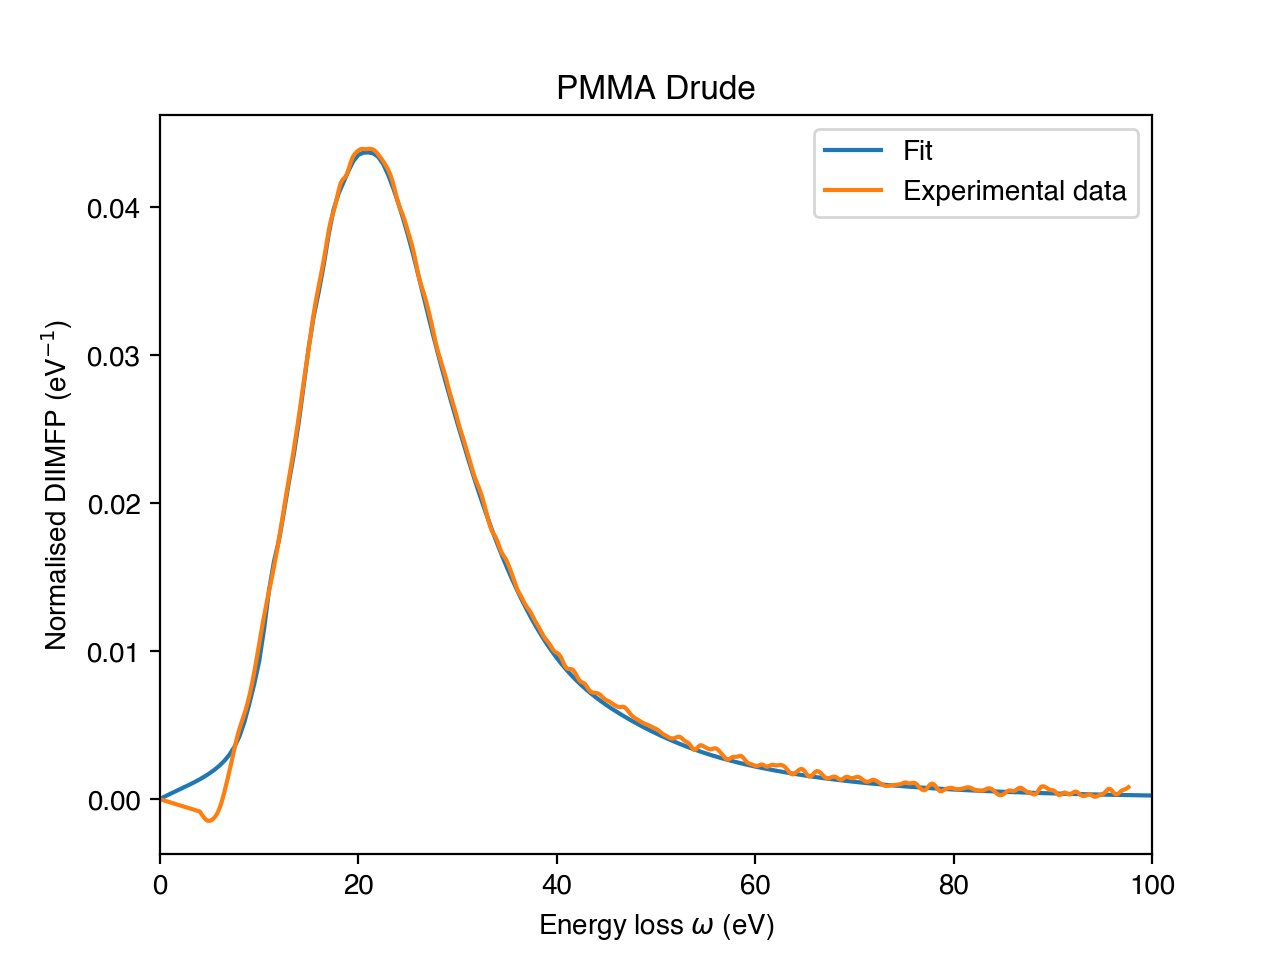

In [56]:
fd = pd.read_csv('../diimfp/pmma_diimfp.dat',sep=' ',header=None)
exp_diimfp = fd.values
x_exp = exp_diimfp[:,0]
y_exp = exp_diimfp[:,1]

opt_ = opt.OptFit(pmma_drude, x_exp, y_exp, 1600)
result = opt_.runOptimisation('ndiimfp', maxeval = 1000, xtol_rel = 1e-6)
oscOptimised = opt_.vec2Struct(result)

fsum = oscOptimised.evaluateFsum()
print('FSum = {}'.format(fsum))
print('Z = {}'.format(oscOptimised.Z))

kksum = oscOptimised.evaluateKKsum()
print('KKSum = {}'.format(kksum))

print(f'A = [{", ".join([str(i) for i in oscOptimised.oscillators.A.round(3).tolist()])}]')
print(f'gamma = [{", ".join([str(i) for i in oscOptimised.oscillators.gamma.round(3).tolist()])}]')
print(f'omega = [{", ".join([str(i) for i in oscOptimised.oscillators.omega.round(3).tolist()])}]')

oscOptimised.calculateDIIMFP(opt_.E0)

plt.figure()
plt.plot(oscOptimised.DIIMFP_E,oscOptimised.DIIMFP,label='Fit')
plt.plot(x_exp,y_exp,label='Experimental data')
plt.xlabel('Energy loss $\omega$ (eV)')
plt.ylabel('Normalised DIIMFP (eV$^{-1}$)')
plt.title(f'{oscOptimised.name} {oscOptimised.oscillators.model}')
plt.legend()
plt.xlim(0,100)
plt.show()

In [57]:
A = [0.033, 0.064, 0.07, 0.078, 0.068, 0.093, 0.066, 0.035, 0.032, 0.026]
gamma = [3.28, 3.91, 3.88, 4.3, 4.62, 6.42, 7.78, 9.28, 16.86, 31.86]
omega = [12.02, 14.91, 17.36, 19.79, 22.34, 25.34, 29.37, 34.14, 40.95, 53.47]

M = (5 * 12.01 + 2 * 15.999 + 8 * 1.01) / (5 + 2 + 8) # Molar weight
rho = 1.18 # g/cm3

oscillators = opt.Oscillators('DrudeLindhard', A, gamma, omega, alpha = 0)
composition = opt.Composition(['c','o','h'], [5,2,8])
eloss = opt.linspace(opt.machine_eps,100,0.1)
q = 0

pmma_dl = opt.Material('PMMA', oscillators, composition, eloss, q, xraypath)
pmma_dl.Eg = 6.7
pmma_dl.width_of_the_valence_band = 10
pmma_dl.atomic_density = rho * opt.N_Avogadro / M *1e-24
pmma_dl.static_refractive_index = 1.4813
pmma_dl.electron_density = 0.284
pmma_dl.Z = 3.6

fsum = pmma_dl.evaluateFsum()
print('FSum = {}'.format(fsum))
print('Z = {}'.format(pmma_dl.Z))

kksum = pmma_dl.evaluateKKsum()
print('KKSum = {}'.format(kksum))

print(f'osc.A = [{" ".join([str(i) for i in pmma_dl.oscillators.A.round(3).tolist()])}];')
print(f'osc.G = [{" ".join([str(i) for i in pmma_dl.oscillators.gamma.round(3).tolist()])}];')
print(f'osc.Om = [{" ".join([str(i) for i in pmma_dl.oscillators.omega.round(3).tolist()])}];')

FSum = 3.5035963573193727
Z = 3.6
KKSum = 1.0217197117318184
osc.A = [0.033 0.064 0.07 0.078 0.068 0.093 0.066 0.035 0.032 0.026];
osc.G = [3.28 3.91 3.88 4.3 4.62 6.42 7.78 9.28 16.86 31.86];
osc.Om = [12.02 14.91 17.36 19.79 22.34 25.34 29.37 34.14 40.95 53.47];


Start optimisation
FSum = 3.5060380208368445
Z = 3.6
KKSum = 1.0009316890439508
A = [0.03, 0.062, 0.066, 0.081, 0.058, 0.088, 0.069, 0.034, 0.028, 0.027]
gamma = [3.045, 3.72, 3.737, 4.118, 4.434, 6.555, 7.554, 10.173, 16.26, 30.783]
omega = [12.408, 15.192, 17.548, 20.072, 22.722, 25.336, 29.406, 34.664, 41.637, 55.508]


<IPython.core.display.Javascript object>


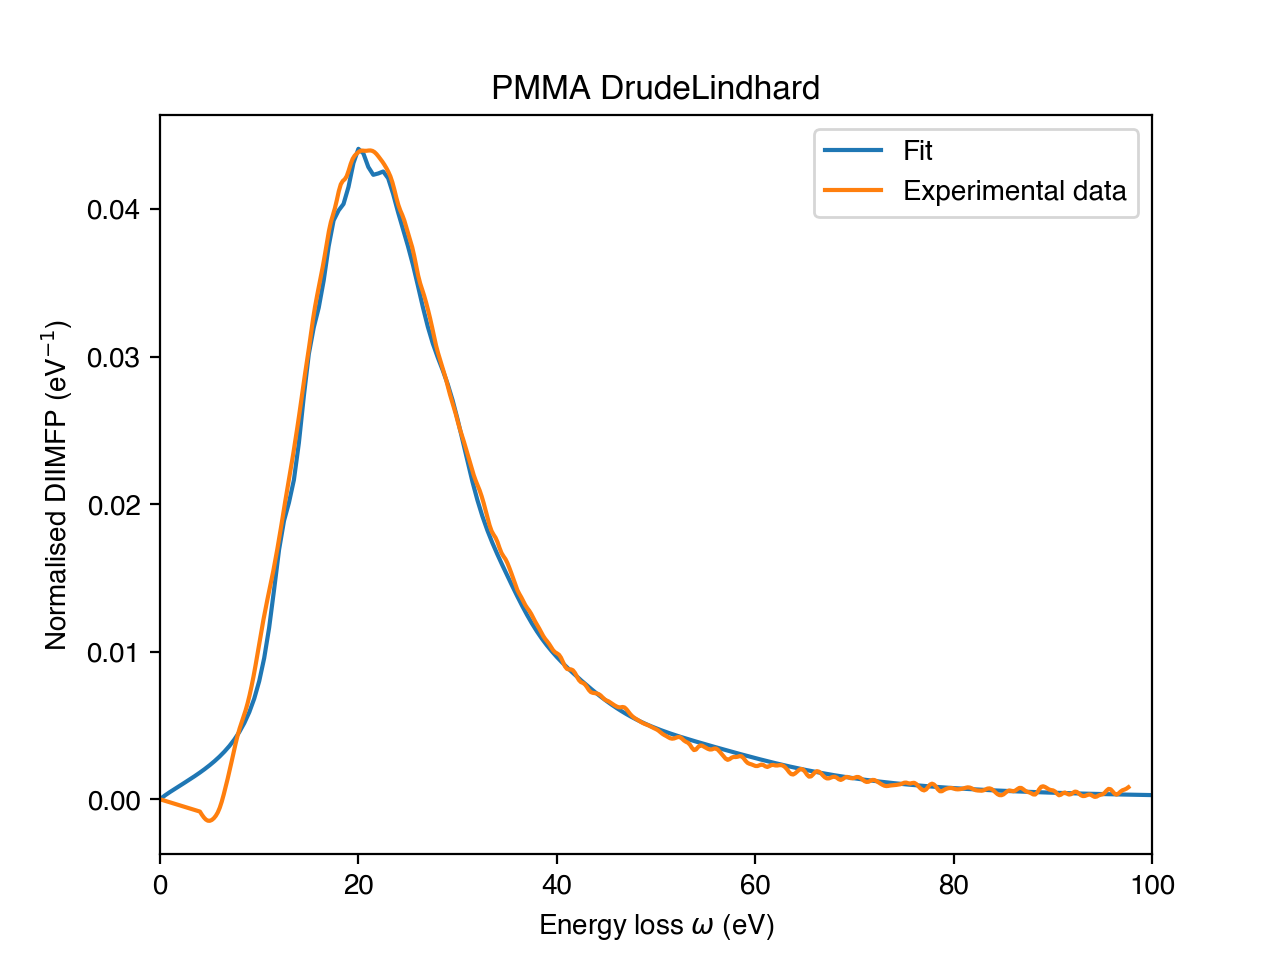

In [58]:
fd = pd.read_csv('../diimfp/pmma_diimfp.dat',sep=' ',header=None)
exp_diimfp = fd.values
x_exp = exp_diimfp[:,0]
y_exp = exp_diimfp[:,1]

opt_ = opt.OptFit(pmma_dl, x_exp, y_exp, 1600)
result = opt_.runOptimisation('ndiimfp', maxeval = 1000, xtol_rel = 1e-6)
oscOptimised = opt_.vec2Struct(result)

fsum = oscOptimised.evaluateFsum()
print('FSum = {}'.format(fsum))
print('Z = {}'.format(oscOptimised.Z))

kksum = oscOptimised.evaluateKKsum()
print('KKSum = {}'.format(kksum))

print(f'A = [{", ".join([str(i) for i in oscOptimised.oscillators.A.round(3).tolist()])}]')
print(f'gamma = [{", ".join([str(i) for i in oscOptimised.oscillators.gamma.round(3).tolist()])}]')
print(f'omega = [{", ".join([str(i) for i in oscOptimised.oscillators.omega.round(3).tolist()])}]')

oscOptimised.calculateDIIMFP(opt_.E0)

plt.figure()
plt.plot(oscOptimised.DIIMFP_E,oscOptimised.DIIMFP,label='Fit')
plt.plot(x_exp,y_exp,label='Experimental data')
plt.xlabel('Energy loss $\omega$ (eV)')
plt.ylabel('Normalised DIIMFP (eV$^{-1}$)')
plt.title(f'{oscOptimised.name} {oscOptimised.oscillators.model}')
plt.legend()
plt.xlim(0,100)
plt.show()

<IPython.core.display.Javascript object>


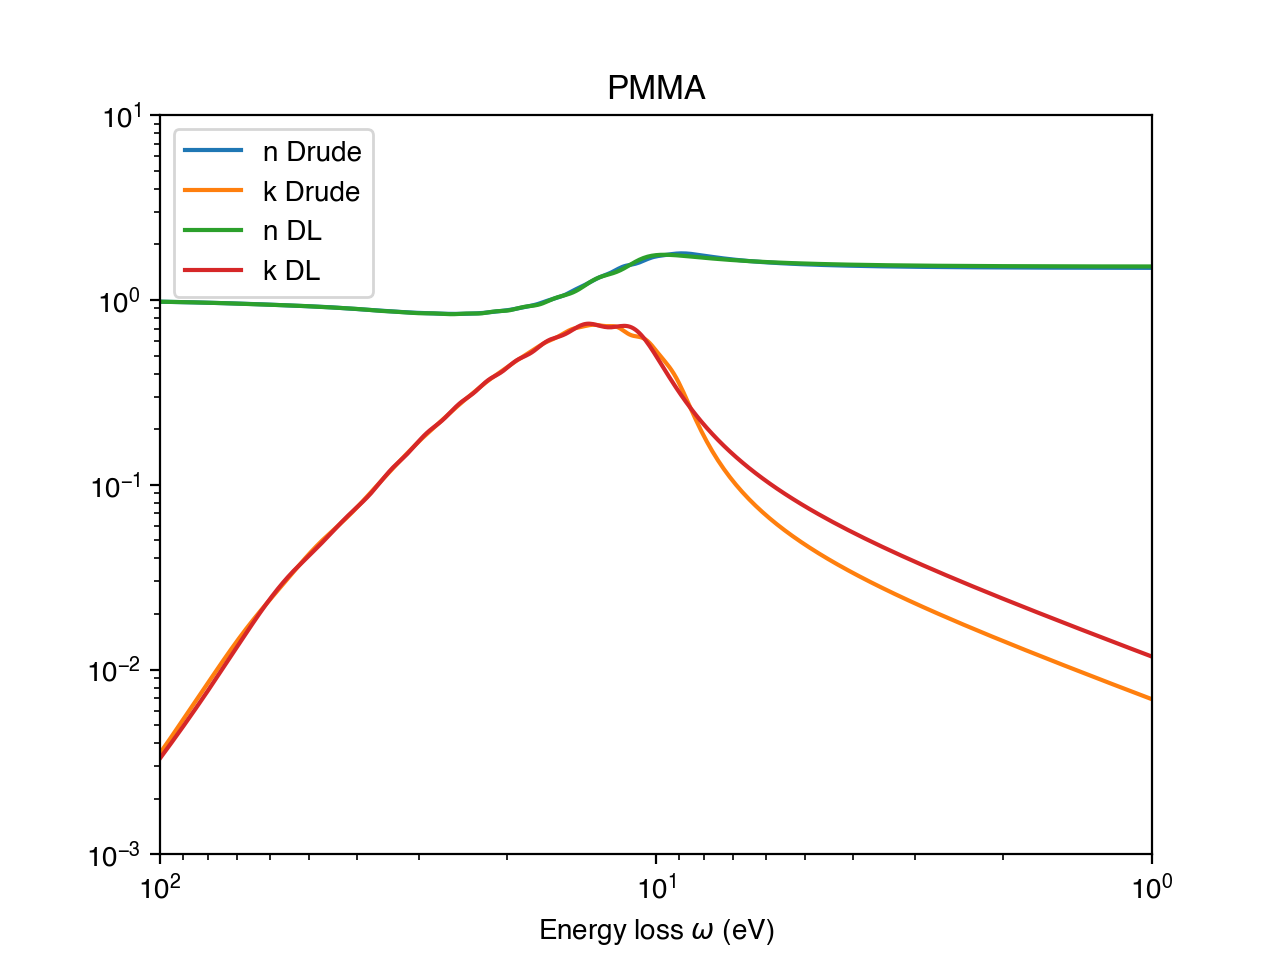

In [59]:
pmma_drude.calculateOpticalConstants()

plt.figure()
plt.plot(pmma_drude.eloss, pmma_drude.refractive_index, label='n Drude')
plt.plot(pmma_drude.eloss, pmma_drude.extinction_coefficient, label='k Drude')
plt.yscale('log')
plt.xscale('log')
plt.xlabel('Energy loss $\omega$ (eV)')
plt.xlim(100,1)
plt.ylim(0.001,10)
plt.title(f'{pmma_drude.name}')

pmma_dl.calculateOpticalConstants_()
plt.plot(pmma_dl.eloss, pmma_dl.refractive_index, label='n DL')
plt.plot(pmma_dl.eloss, pmma_dl.extinction_coefficient, label='k DL')

plt.legend()
plt.show()

pmma_drude.writeOpticalData()

**PS**

In [10]:
A = [61.94, 6.89,32.36,34.78,31.78,40.3,36.12,27.7,22.66,18.23,12.48,9.55]
gamma = [0.5,0.5,5.2,2.7,3,3.8,4.5,5.2,5.4,5.3,4.8,4.7]
omega = [5.7,8.9,9.6,9.8,11.8,14.2,17.1,20.3,23.6,27.1,30.6,34.4]

M = (8 * 12.01 + 8 * 1.01) / (8 + 8) # Molar weight
rho = 1.05 # g/cm3

oscillators = opt.Oscillators('Drude', A, gamma, omega, alpha = 0)
composition = opt.Composition(['c','h'], [8,8])
eloss = opt.linspace(opt.machine_eps,100,0.1)
q = 0

ps_drude = opt.Material('PS', oscillators, composition, eloss, q, xraypath)
ps_drude.Eg = 5.7
ps_drude.width_of_the_valence_band = 10
ps_drude.atomic_density = rho * opt.N_Avogadro / M *1e-24
ps_drude.static_refractive_index = 1.5892 # 1.5537 # 1.5717
ps_drude.electron_density = 0.242
ps_drude.Z = 3.5

fsum = ps_drude.evaluateFsum()
print('FSum = {}'.format(fsum))
print('Z = {}'.format(ps_drude.Z))

kksum = ps_drude.evaluateKKsum()
print('KKSum = {}'.format(kksum))

print(f'osc.A = [{" ".join([str(i) for i in ps_drude.oscillators.A.round(3).tolist()])}];')
print(f'osc.G = [{" ".join([str(i) for i in ps_drude.oscillators.gamma.round(3).tolist()])}];')
print(f'osc.Om = [{" ".join([str(i) for i in ps_drude.oscillators.omega.round(3).tolist()])}];')

FSum = 3.4847032014614876
Z = 3.5
KKSum = 1.1706538581553838
osc.A = [61.94 6.89 32.36 34.78 31.78 40.3 36.12 27.7 22.66 18.23 12.48 9.55];
osc.G = [0.5 0.5 5.2 2.7 3.0 3.8 4.5 5.2 5.4 5.3 4.8 4.7];
osc.Om = [5.7 8.9 9.6 9.8 11.8 14.2 17.1 20.3 23.6 27.1 30.6 34.4];


Start optimisation
FSum = 3.4757999538930644
Z = 3.5
KKSum = 1.1514733690876666
A = [49.229, 11.714, 31.304, 35.424, 33.533, 42.602, 37.294, 28.637, 22.466, 18.385, 13.677, 9.427]
gamma = [0.463, 0.493, 4.937, 2.694, 3.088, 3.897, 4.454, 5.161, 5.452, 5.228, 4.723, 4.613]
omega = [5.7, 8.921, 9.858, 10.079, 11.772, 14.196, 17.112, 20.512, 23.854, 27.24, 30.994, 35.096]


<IPython.core.display.Javascript object>


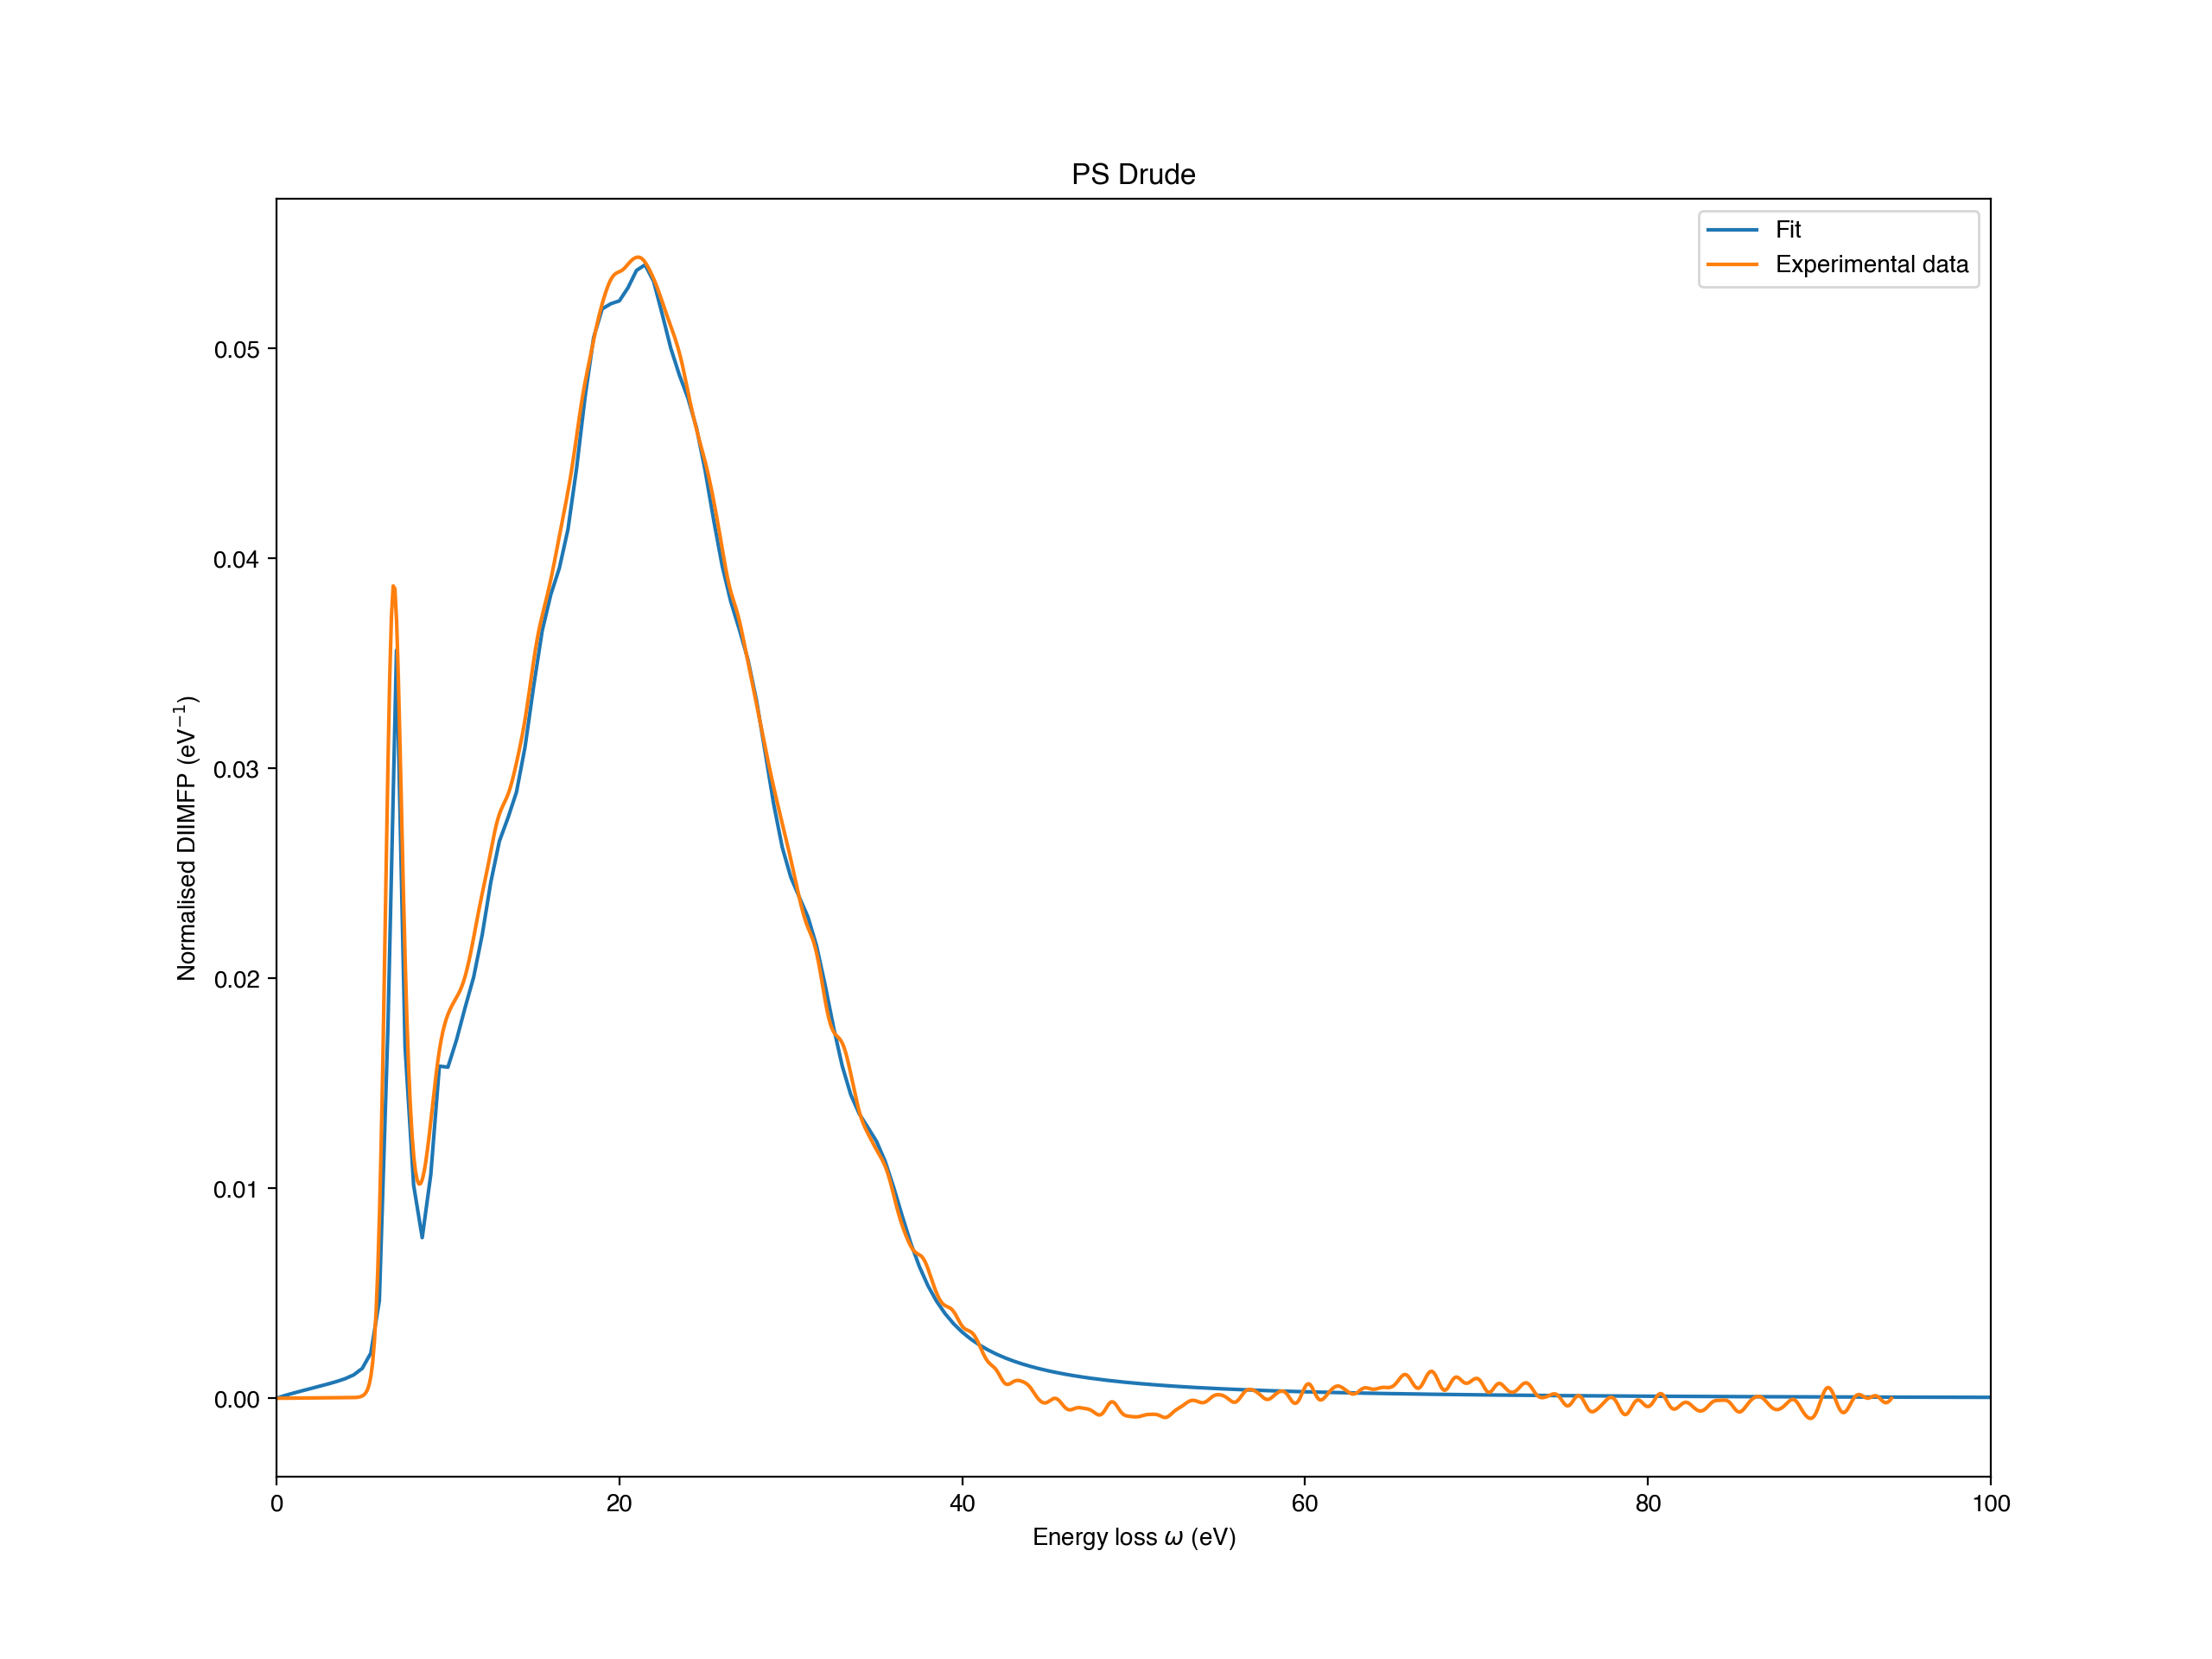

In [11]:
fd = pd.read_csv('../diimfp/ps_diimfp.dat',sep=' ',header=None)
exp_diimfp = fd.values
x_exp = exp_diimfp[:,0]
y_exp = exp_diimfp[:,1]

opt_ = opt.OptFit(ps_drude, x_exp, y_exp, 1600)
result = opt_.runOptimisation('ndiimfp', maxeval = 1000, xtol_rel = 1e-6)
oscOptimised = opt_.vec2Struct(result)

fsum = oscOptimised.evaluateFsum()
print('FSum = {}'.format(fsum))
print('Z = {}'.format(oscOptimised.Z))

kksum = oscOptimised.evaluateKKsum()
print('KKSum = {}'.format(kksum))

print(f'A = [{", ".join([str(i) for i in oscOptimised.oscillators.A.round(3).tolist()])}]')
print(f'gamma = [{", ".join([str(i) for i in oscOptimised.oscillators.gamma.round(3).tolist()])}]')
print(f'omega = [{", ".join([str(i) for i in oscOptimised.oscillators.omega.round(3).tolist()])}]')

oscOptimised.calculateDIIMFP(opt_.E0)

plt.figure()
plt.plot(oscOptimised.DIIMFP_E,oscOptimised.DIIMFP,label='Fit')
plt.plot(x_exp,y_exp,label='Experimental data')
plt.xlabel('Energy loss $\omega$ (eV)')
plt.ylabel('Normalised DIIMFP (eV$^{-1}$)')
plt.title(f'{oscOptimised.name} {oscOptimised.oscillators.model}')
plt.legend()
plt.xlim(0,100)
plt.show()

In [13]:
A = [0.094, 0.012, 0.014, 0.059, 0.143, 0.12, 0.135, 0.115, 0.06, 0.036, 0.021, 0.006]
gamma = [0.96, 1.1, 1.71, 3.27, 5.09, 4.17, 4.56, 4.83, 4.21, 3.99, 3.84, 2.63]
omega = [6.9, 9.69, 10.72, 12.7, 15.97, 18.88, 21.51, 24.35, 27.29, 30.14, 33.12, 35.93]

M = (8 * 12.01 + 8 * 1.01) / (8 + 8) # Molar weight
rho = 1.05 # g/cm3

oscillators = opt.Oscillators('DrudeLindhard', A, gamma, omega, alpha = 0)
composition = opt.Composition(['c','h'], [8,8])
eloss = opt.linspace(opt.machine_eps,100,0.1)
q = 0

ps_dl = opt.Material('PS', oscillators, composition, eloss, q, xraypath)
ps_dl.Eg = 5.7
ps_dl.width_of_the_valence_band = 10
ps_dl.atomic_density = rho * opt.N_Avogadro / M *1e-24
ps_dl.static_refractive_index = 1.5717
ps_dl.electron_density = 0.242
ps_dl.Z = 3.5
ps_dl.use_henke_for_ne = True

fsum = ps_dl.evaluateFsum()
print('FSum = {}'.format(fsum))
print('Z = {}'.format(ps_dl.Z))

kksum = ps_dl.evaluateKKsum()
print('KKSum = {}'.format(kksum))

print(f'osc.A = [{" ".join([str(i) for i in ps_dl.oscillators.A.round(3).tolist()])}];')
print(f'osc.G = [{" ".join([str(i) for i in ps_dl.oscillators.gamma.round(3).tolist()])}];')
print(f'osc.Om = [{" ".join([str(i) for i in ps_dl.oscillators.omega.round(3).tolist()])}];')

FSum = 3.4719609040870467
Z = 3.5
KKSum = 1.2210963341388004
osc.A = [0.094 0.012 0.014 0.059 0.143 0.12 0.135 0.115 0.06 0.036 0.021 0.006];
osc.G = [0.96 1.1 1.71 3.27 5.09 4.17 4.56 4.83 4.21 3.99 3.84 2.63];
osc.Om = [6.9 9.69 10.72 12.7 15.97 18.88 21.51 24.35 27.29 30.14 33.12 35.93];


Start optimisation
FSum = 3.424929731873945
Z = 3.5
KKSum = 1.0012665599328883
A = [0.038, 0.011, 0.012, 0.045, 0.083, 0.1, 0.105, 0.089, 0.05, 0.034, 0.022, 0.006]
gamma = [0.955, 1.085, 1.688, 3.445, 4.796, 4.06, 4.352, 5.552, 4.559, 4.004, 4.123, 2.677]
omega = [6.961, 9.671, 11.134, 14.003, 17.706, 19.702, 22.71, 28.441, 25.145, 35.106, 45.457, 31.872]


<IPython.core.display.Javascript object>


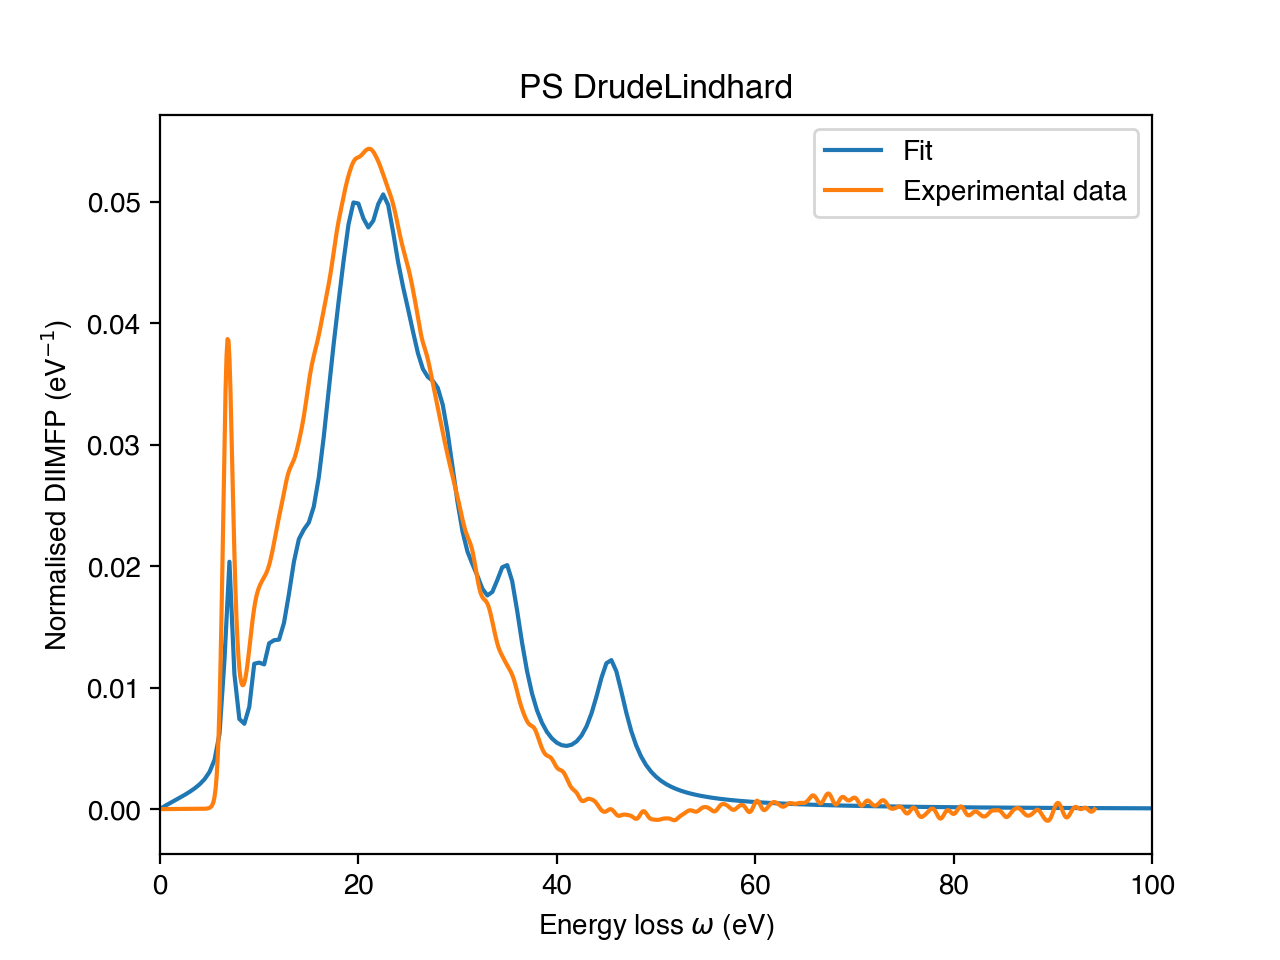

In [14]:
fd = pd.read_csv('../diimfp/ps_diimfp.dat',sep=' ',header=None)
exp_diimfp = fd.values
x_exp = exp_diimfp[:,0]
y_exp = exp_diimfp[:,1]

opt_ = opt.OptFit(ps_dl, x_exp, y_exp, 1600)
result = opt_.runOptimisation('ndiimfp', maxeval = 1000, xtol_rel = 1e-6)
oscOptimised = opt_.vec2Struct(result)

fsum = oscOptimised.evaluateFsum()
print('FSum = {}'.format(fsum))
print('Z = {}'.format(oscOptimised.Z))

kksum = oscOptimised.evaluateKKsum()
print('KKSum = {}'.format(kksum))

print(f'A = [{", ".join([str(i) for i in oscOptimised.oscillators.A.round(3).tolist()])}]')
print(f'gamma = [{", ".join([str(i) for i in oscOptimised.oscillators.gamma.round(3).tolist()])}]')
print(f'omega = [{", ".join([str(i) for i in oscOptimised.oscillators.omega.round(3).tolist()])}]')

oscOptimised.calculateDIIMFP(opt_.E0)

plt.figure()
plt.plot(oscOptimised.DIIMFP_E,oscOptimised.DIIMFP,label='Fit')
plt.plot(x_exp,y_exp,label='Experimental data')
plt.xlabel('Energy loss $\omega$ (eV)')
plt.ylabel('Normalised DIIMFP (eV$^{-1}$)')
plt.title(f'{oscOptimised.name} {oscOptimised.oscillators.model}')
plt.legend()
plt.xlim(0,100)
plt.show()

<IPython.core.display.Javascript object>


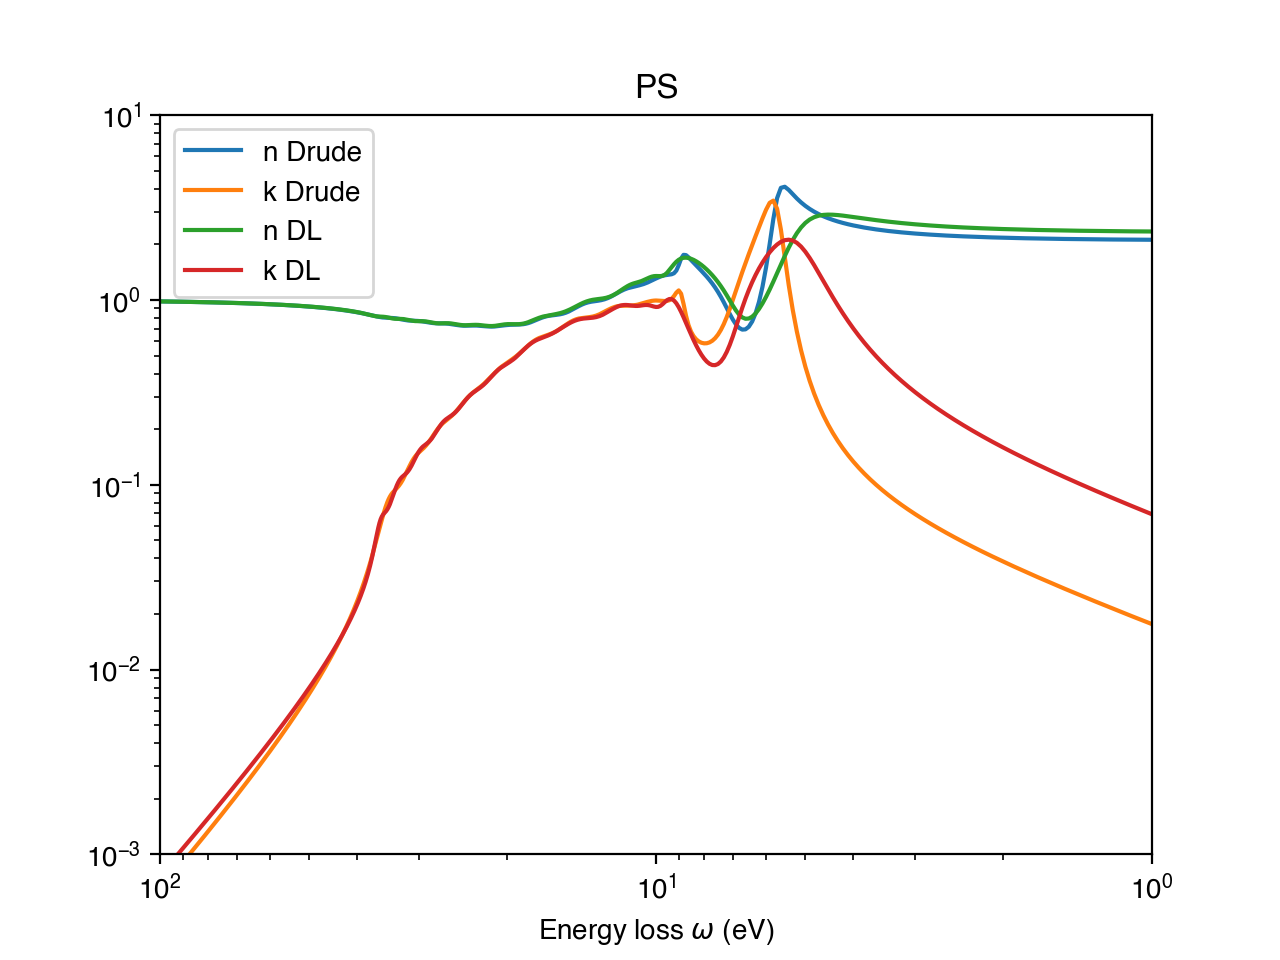

In [66]:
ps_drude.calculateOpticalConstants()

plt.figure()
plt.plot(ps_drude.eloss, ps_drude.refractive_index, label='n Drude')
plt.plot(ps_drude.eloss, ps_drude.extinction_coefficient, label='k Drude')
plt.yscale('log')
plt.xscale('log')
plt.xlabel('Energy loss $\omega$ (eV)')
plt.xlim(100,1)
plt.ylim(0.001,10)
plt.title(f'{ps_drude.name}')

ps_dl.calculateOpticalConstants_()
plt.plot(ps_dl.eloss, ps_dl.refractive_index, label='n DL')
plt.plot(ps_dl.eloss, ps_dl.extinction_coefficient, label='k DL')

plt.legend()
plt.show()

ps_drude.writeOpticalData()

**PTFE**

In [30]:
# A = [0.93,3.87,39.19,15.06,38.65,92.64,105,185]
# gamma = [0.4,1.04,3.27,4.6,5.28,11.81,21.96,41.3]
# omega = [7.94,12.38,15.57,19.54,20.42,26.11,36.96,52.95]

A = [1.317, 7.787, 62.25, 17.646, 37.006, 106.325, 108.572, 307.175]
gamma = [0.359, 0.982, 3.212, 3.356, 4.339, 11.277, 21.518, 48.386]
omega = [7.954, 12.245, 15.22, 20.582, 19.151, 25.308, 35.722, 52.066]

M = (2 * 12.01 + 4 * 18.998) / (2 + 4) # Molar weight
rho = 2.17 # g/cm3

oscillators = opt.Oscillators('Drude', A, gamma, omega, alpha = 0)
composition = opt.Composition(['c','f'], [2,4])
eloss = opt.linspace(opt.machine_eps,100,0.1)
q = 0

ptfe_drude = opt.Material('PTFE', oscillators, composition, eloss, q, xraypath)
ptfe_drude.Eg = 7.2
ptfe_drude.width_of_the_valence_band = 5.5
ptfe_drude.atomic_density = rho * opt.N_Avogadro / M *1e-24
ptfe_drude.static_refractive_index = 1.39
ptfe_drude.electron_density = 0.47
ptfe_drude.Z = 8

fsum = ptfe_drude.evaluateFsum()
print('FSum = {}'.format(fsum))
print('Z = {}'.format(ptfe_drude.Z))

kksum = ptfe_drude.evaluateKKsum()
print('KKSum = {}'.format(kksum))

print(f'osc.A = [{" ".join([str(i) for i in ptfe_drude.oscillators.A.round(3).tolist()])}];')
print(f'osc.G = [{" ".join([str(i) for i in ptfe_drude.oscillators.gamma.round(3).tolist()])}];')
print(f'osc.Om = [{" ".join([str(i) for i in ptfe_drude.oscillators.omega.round(3).tolist()])}];')

FSum = 7.840973913877056
Z = 8
KKSum = 0.978521384309734
osc.A = [1.317 7.787 62.25 17.646 37.006 106.325 108.572 307.175];
osc.G = [0.359 0.982 3.212 3.356 4.339 11.277 21.518 48.386];
osc.Om = [7.954 12.245 15.22 20.582 19.151 25.308 35.722 52.066];


Start optimisation
FSum = 7.840963596057652
Z = 8
KKSum = 0.9785245113723245
A = [1.317, 7.787, 62.25, 17.646, 37.006, 106.325, 108.572, 307.175]
gamma = [0.359, 0.982, 3.212, 3.356, 4.339, 11.277, 21.518, 48.386]
omega = [7.954, 12.245, 15.22, 20.582, 19.151, 25.308, 35.722, 52.066]


<IPython.core.display.Javascript object>


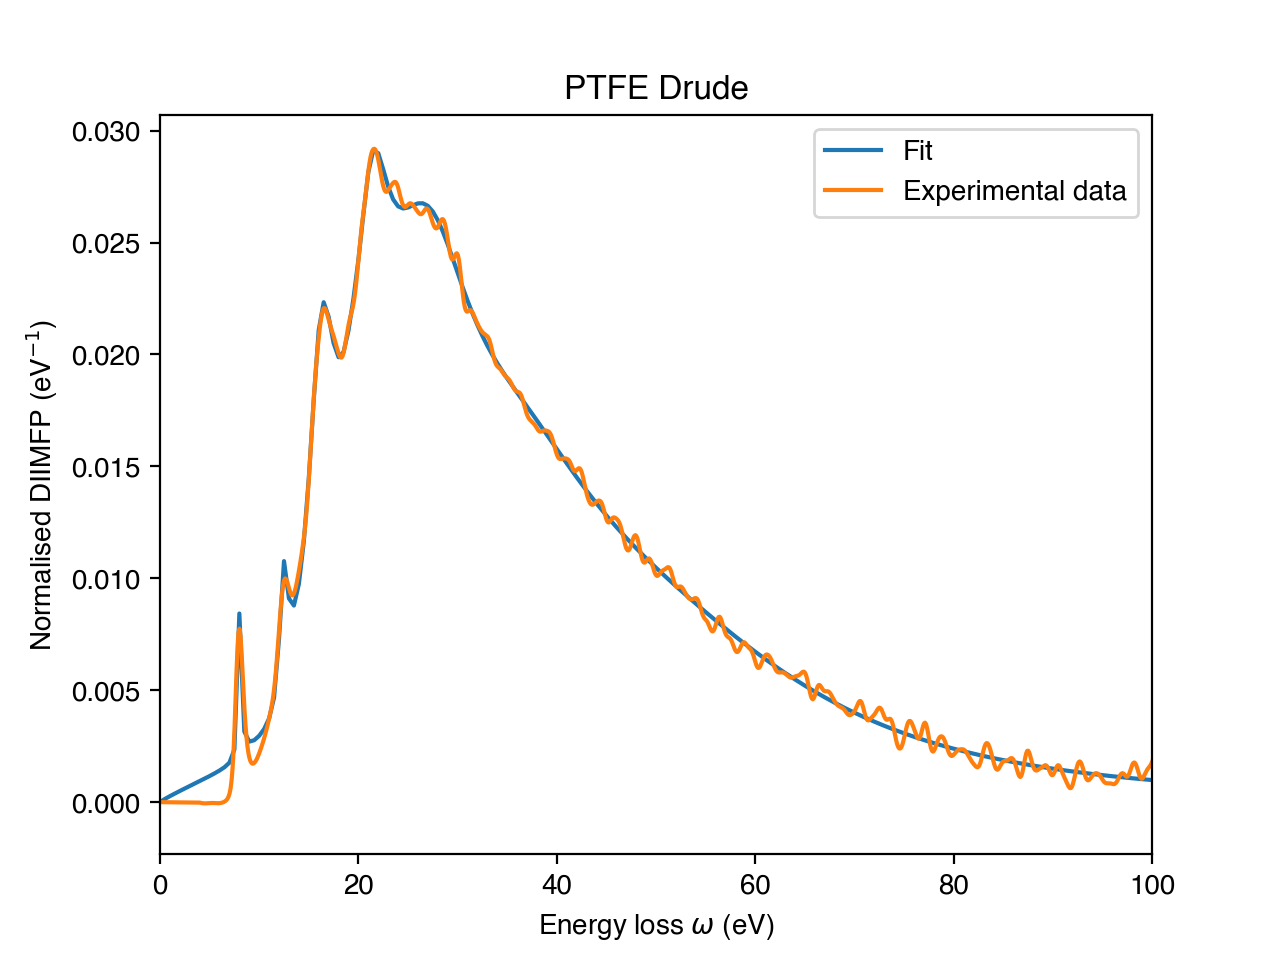

In [24]:
fd = pd.read_csv('../diimfp/ptfe_diimfp.dat',sep=' ',header=None)
exp_diimfp = fd.values
x_exp = exp_diimfp[:,0]
y_exp = exp_diimfp[:,1]

opt_ = opt.OptFit(ptfe_drude, x_exp, y_exp, 1600)
result = opt_.runOptimisation('ndiimfp', maxeval = 5000, xtol_rel = 1e-12)
oscOptimised = opt_.vec2Struct(result)

fsum = oscOptimised.evaluateFsum()
print('FSum = {}'.format(fsum))
print('Z = {}'.format(oscOptimised.Z))

kksum = oscOptimised.evaluateKKsum()
print('KKSum = {}'.format(kksum))

print(f'A = [{", ".join([str(i) for i in oscOptimised.oscillators.A.round(3).tolist()])}]')
print(f'gamma = [{", ".join([str(i) for i in oscOptimised.oscillators.gamma.round(3).tolist()])}]')
print(f'omega = [{", ".join([str(i) for i in oscOptimised.oscillators.omega.round(3).tolist()])}]')

oscOptimised.calculateDIIMFP(opt_.E0)

plt.figure()
plt.plot(oscOptimised.DIIMFP_E,oscOptimised.DIIMFP,label='Fit')
plt.plot(x_exp,y_exp,label='Experimental data')
plt.xlabel('Energy loss $\omega$ (eV)')
plt.ylabel('Normalised DIIMFP (eV$^{-1}$)')
plt.title(f'{oscOptimised.name} {oscOptimised.oscillators.model}')
plt.legend()
plt.xlim(0,100)
plt.show()

In [34]:
# A = [0.006, 0.007, 0.038, 0.02, 0.061, 0.047, 0.029, 0.016, 0.057, 0.04, 0.06, 0.062]
# gamma = [0.49, 1.12, 2.82, 3.47, 4.2, 4.99, 4.41, 3.75, 9.12, 12.15, 24.65, 60.22]
# omega = [8.01, 12.63, 16.21, 18.01, 21.26, 24.26, 27.08, 29.39, 33.15, 39.96, 49.89, 65.47]

A = [0.007, 0.007, 0.037, 0.023, 0.068, 0.054, 0.03, 0.017, 0.062, 0.044, 0.067, 0.067]
gamma = [0.455, 1.138, 2.738, 3.54, 4.31, 4.953, 4.511, 3.971, 9.328, 12.19, 22.566, 54.93]
omega = [8.008, 12.597, 16.162, 17.488, 21.079, 24.123, 27.08, 29.226, 32.732, 38.964, 49.304, 59.297]

M = (2 * 12.01 + 4 * 18.998) / (2 + 4) # Molar weight
rho = 2.17 # g/cm3

oscillators = opt.Oscillators('DrudeLindhard', A, gamma, omega, alpha = 0)
composition = opt.Composition(['c','f'], [2,4])
eloss = opt.linspace(opt.machine_eps,100,0.1)
q = 0

ptfe_dl = opt.Material('PTFE', oscillators, composition, eloss, q, xraypath)
ptfe_dl.Eg = 7.2
ptfe_dl.width_of_the_valence_band = 5.5
ptfe_dl.atomic_density = rho * opt.N_Avogadro / M *1e-24
ptfe_dl.static_refractive_index = 1.39
ptfe_dl.electron_density = 0.47
ptfe_dl.Z = 8

fsum = ptfe_dl.evaluateFsum()
print('FSum = {}'.format(fsum))
print('Z = {}'.format(ptfe_dl.Z))

kksum = ptfe_dl.evaluateKKsum()
print('KKSum = {}'.format(kksum))

print(f'osc.A = [{" ".join([str(i) for i in ptfe_dl.oscillators.A.round(3).tolist()])}];')
print(f'osc.G = [{" ".join([str(i) for i in ptfe_dl.oscillators.gamma.round(3).tolist()])}];')
print(f'osc.Om = [{" ".join([str(i) for i in ptfe_dl.oscillators.omega.round(3).tolist()])}];')

FSum = 7.872538350300849
Z = 8
KKSum = 1.002683643777377
osc.A = [0.007 0.007 0.037 0.023 0.068 0.054 0.03 0.017 0.062 0.044 0.067 0.067];
osc.G = [0.455 1.138 2.738 3.54 4.31 4.953 4.511 3.971 9.328 12.19 22.566 54.93];
osc.Om = [8.008 12.597 16.162 17.488 21.079 24.123 27.08 29.226 32.732 38.964 49.304 59.297];


Start optimisation
FSum = 7.870936997432723
Z = 8
KKSum = 1.0021063808950885
A = [0.007, 0.007, 0.037, 0.023, 0.068, 0.054, 0.03, 0.017, 0.062, 0.044, 0.067, 0.067]
gamma = [0.455, 1.138, 2.738, 3.54, 4.31, 4.953, 4.511, 3.971, 9.328, 12.19, 22.566, 54.93]
omega = [8.008, 12.597, 16.162, 17.488, 21.079, 24.123, 27.08, 29.226, 32.732, 38.964, 49.304, 59.297]


<IPython.core.display.Javascript object>


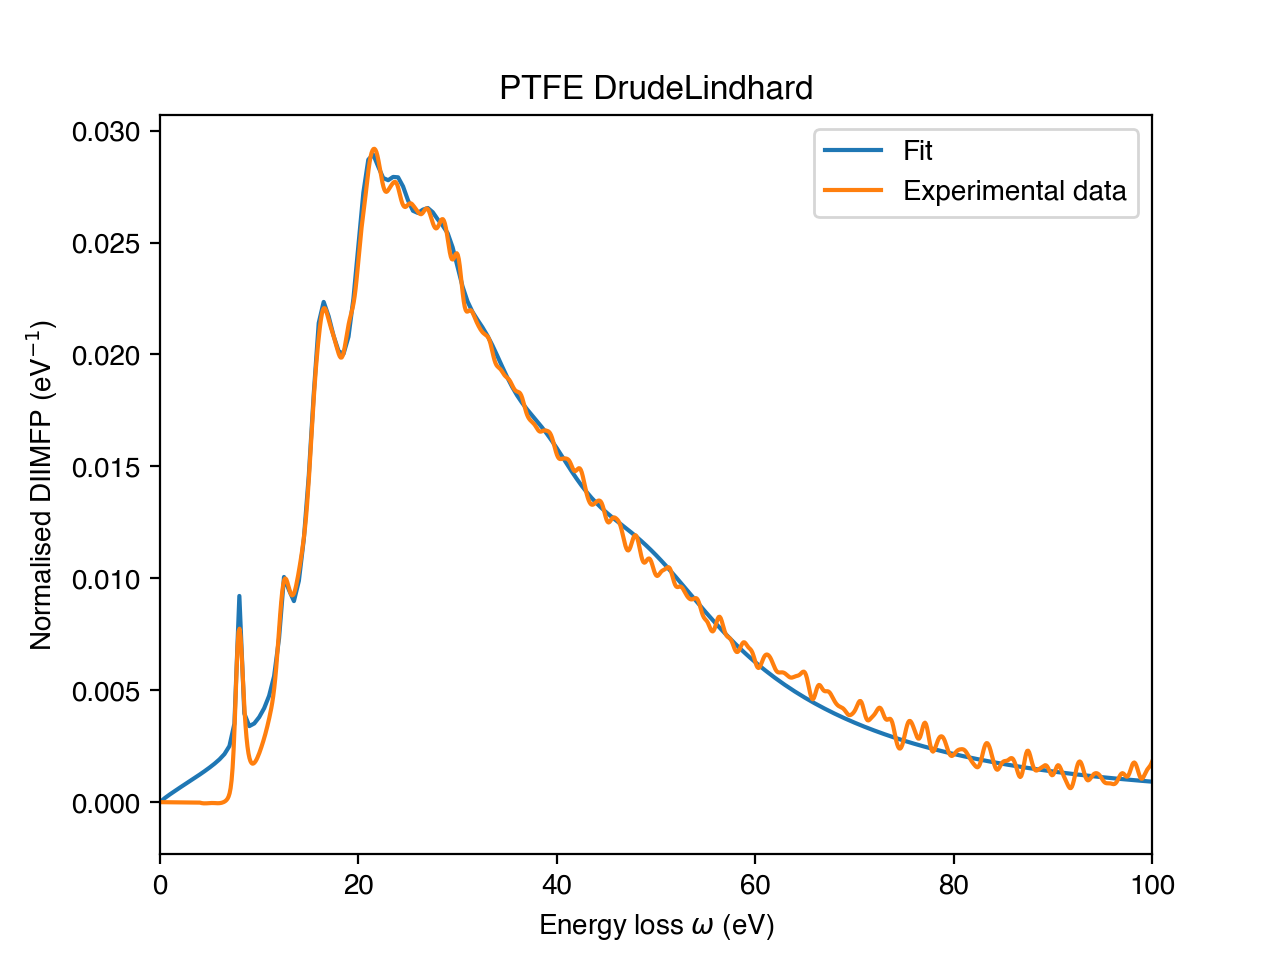

In [32]:
fd = pd.read_csv('../diimfp/ptfe_diimfp.dat',sep=' ',header=None)
exp_diimfp = fd.values
x_exp = exp_diimfp[:,0]
y_exp = exp_diimfp[:,1]

opt_ = opt.OptFit(ptfe_dl, x_exp, y_exp, 1600)
result = opt_.runOptimisation('ndiimfp', maxeval = 5000, xtol_rel = 1e-12)
oscOptimised = opt_.vec2Struct(result)

fsum = oscOptimised.evaluateFsum()
print('FSum = {}'.format(fsum))
print('Z = {}'.format(oscOptimised.Z))

kksum = oscOptimised.evaluateKKsum()
print('KKSum = {}'.format(kksum))

print(f'A = [{", ".join([str(i) for i in oscOptimised.oscillators.A.round(3).tolist()])}]')
print(f'gamma = [{", ".join([str(i) for i in oscOptimised.oscillators.gamma.round(3).tolist()])}]')
print(f'omega = [{", ".join([str(i) for i in oscOptimised.oscillators.omega.round(3).tolist()])}]')

oscOptimised.calculateDIIMFP(opt_.E0)

plt.figure()
plt.plot(oscOptimised.DIIMFP_E,oscOptimised.DIIMFP,label='Fit')
plt.plot(x_exp,y_exp,label='Experimental data')
plt.xlabel('Energy loss $\omega$ (eV)')
plt.ylabel('Normalised DIIMFP (eV$^{-1}$)')
plt.title(f'{oscOptimised.name} {oscOptimised.oscillators.model}')
plt.legend()
plt.xlim(0,100)
plt.show()

<IPython.core.display.Javascript object>


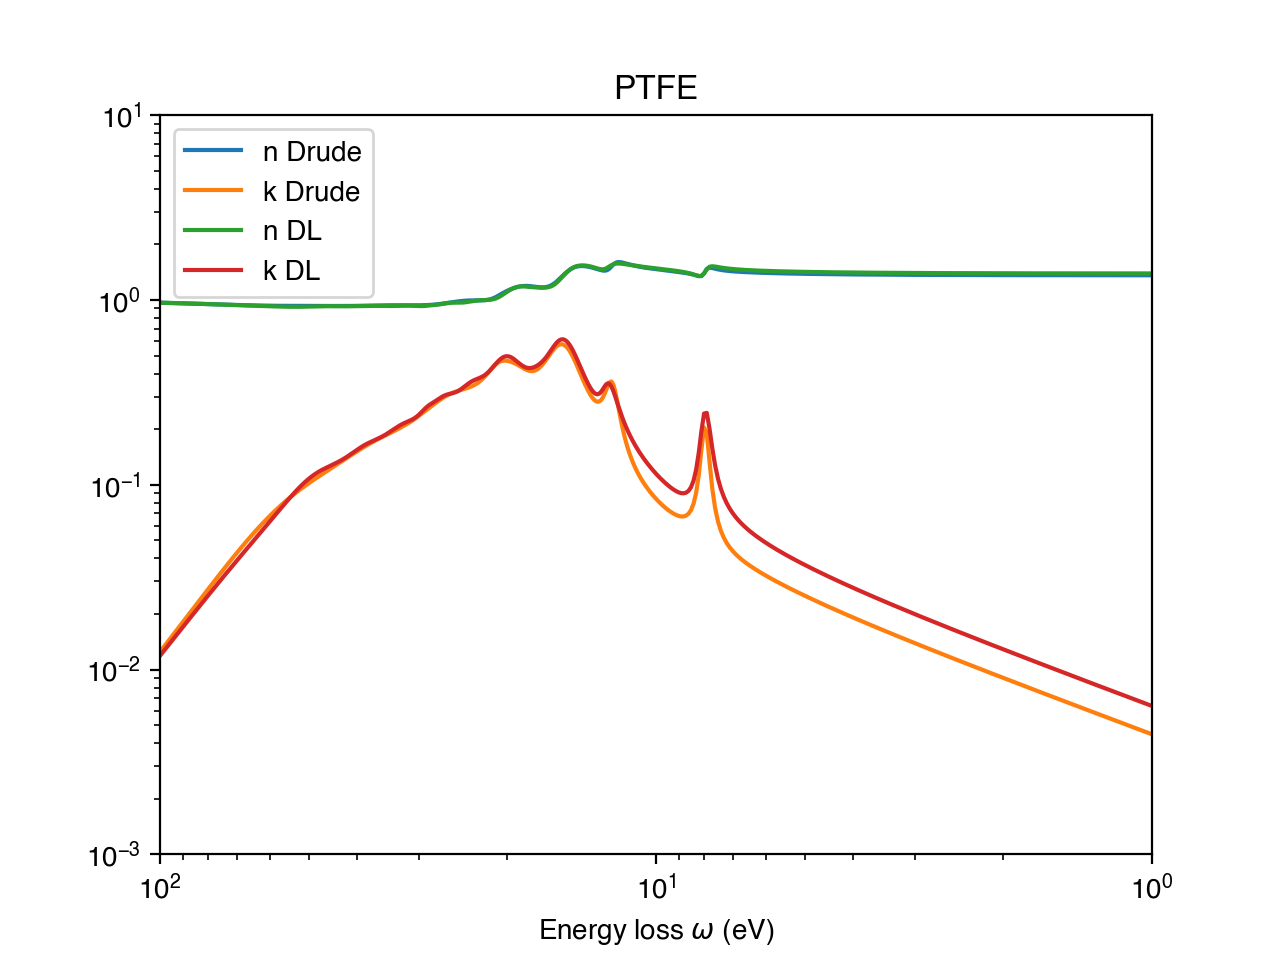

In [35]:
ptfe_drude.calculateOpticalConstants()

plt.figure()
plt.plot(ptfe_drude.eloss, ptfe_drude.refractive_index, label='n Drude')
plt.plot(ptfe_drude.eloss, ptfe_drude.extinction_coefficient, label='k Drude')
plt.yscale('log')
plt.xscale('log')
plt.xlabel('Energy loss $\omega$ (eV)')
plt.xlim(100,1)
plt.ylim(0.001,10)
plt.title(f'{ptfe_drude.name}')

ptfe_dl.calculateOpticalConstants_()
plt.plot(ptfe_dl.eloss, ptfe_dl.refractive_index, label='n DL')
plt.plot(ptfe_dl.eloss, ptfe_dl.extinction_coefficient, label='k DL')

plt.legend()
plt.show()

ptfe_drude.writeOpticalData()

**Au**

In [14]:
A = [0.01, 0.02, 0.07, 0.1, 0.07,0.007, 0.16, 0.15,0.13,0.08,0.02,0.09,0.16,0.02,0.003,0.005,0.008]
omega = [2.62,3.34,6.31,10.58,17.08,25.75,25.39,33.65,39.17,45.72,52.12,14.57,64.21,96.19,278.92,210.69,470.93]
gamma = [0.29,0.81,3.05,5.62,5.04,2.05,8.04,8.56,10.86,10.79,11.13,5.39,29.85,34.51,38.38,62.79,376.54]
oscillators = opt.Oscillators('DrudeLindhard', A, gamma, omega, alpha = 1)
composition = opt.Composition('au', 1)
eloss = opt.linspace(opt.machine_eps,100,0.1)
q = 0

au_dl = opt.Material('Au', oscillators, composition, eloss, q, xraypath)
au_dl.Ef = 9
au_dl.atomic_density = 0.059

<IPython.core.display.Javascript object>


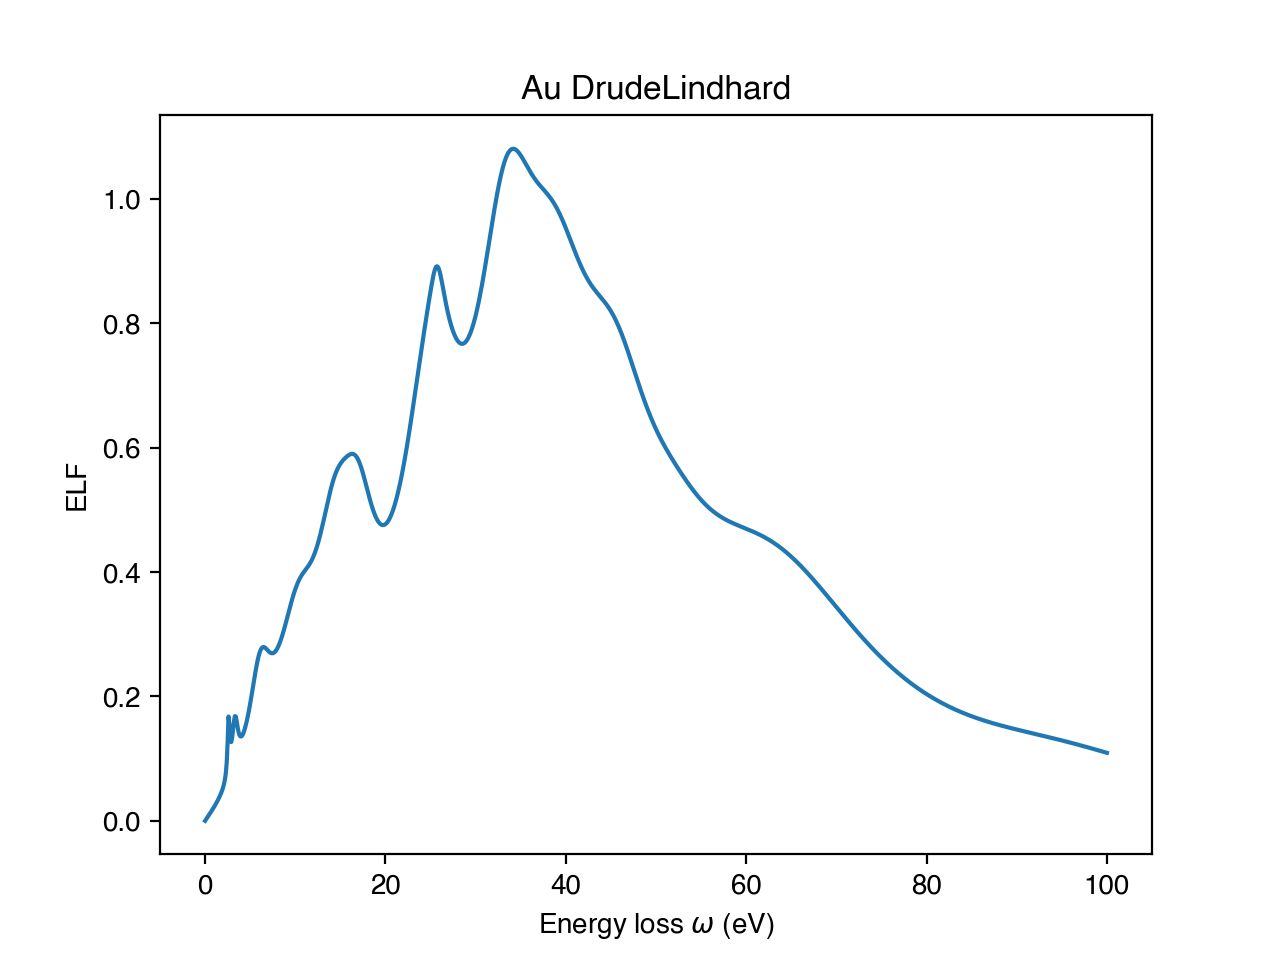

In [16]:
au_dl.plotELF()

<IPython.core.display.Javascript object>


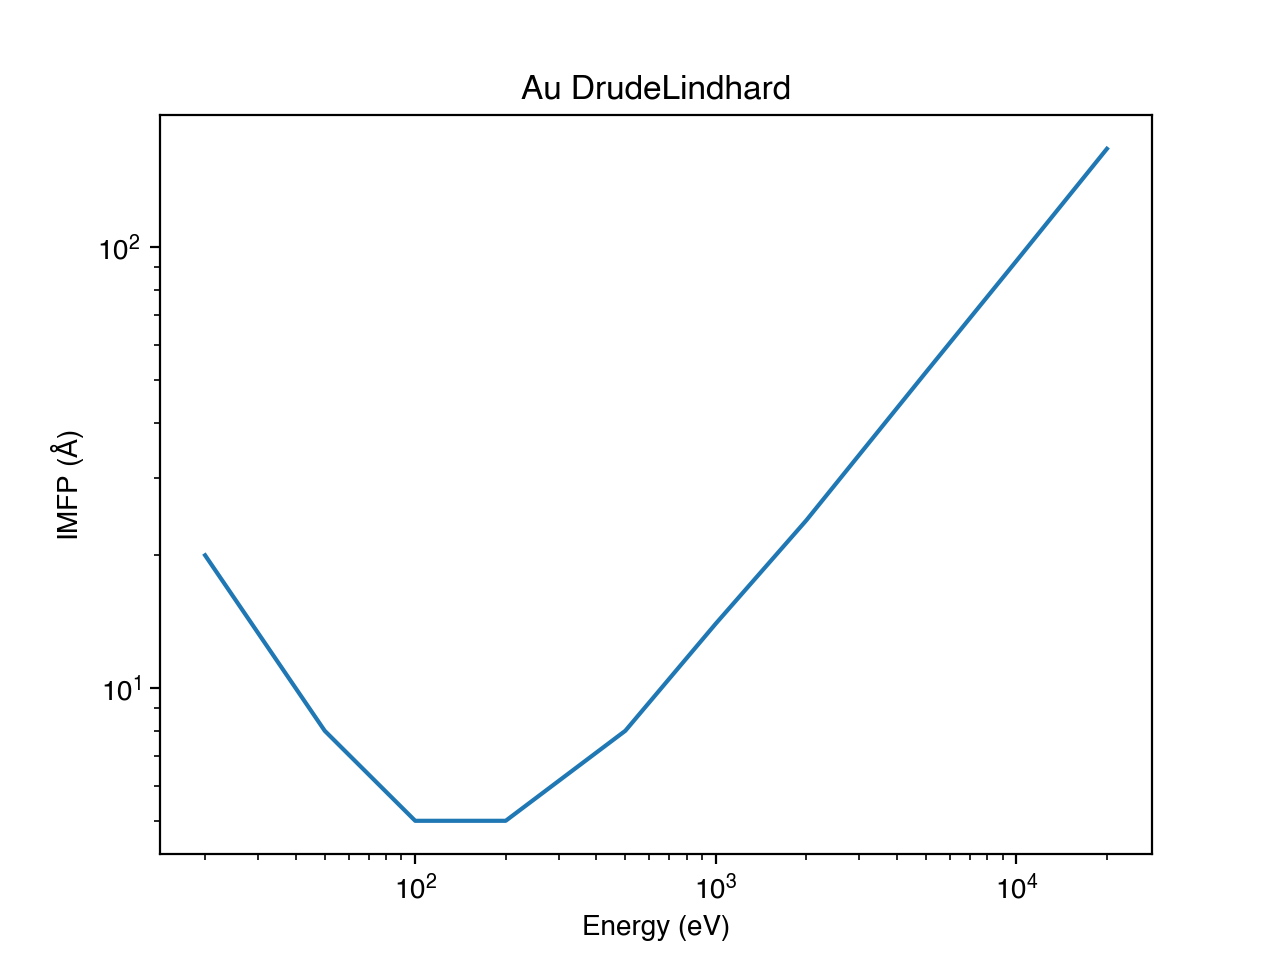

In [15]:
E0 = np.array([20, 50, 100, 200, 500, 1000, 2000, 5000, 10000, 20000]) # eV
au_dl.plotIMFP(E0)

<IPython.core.display.Javascript object>


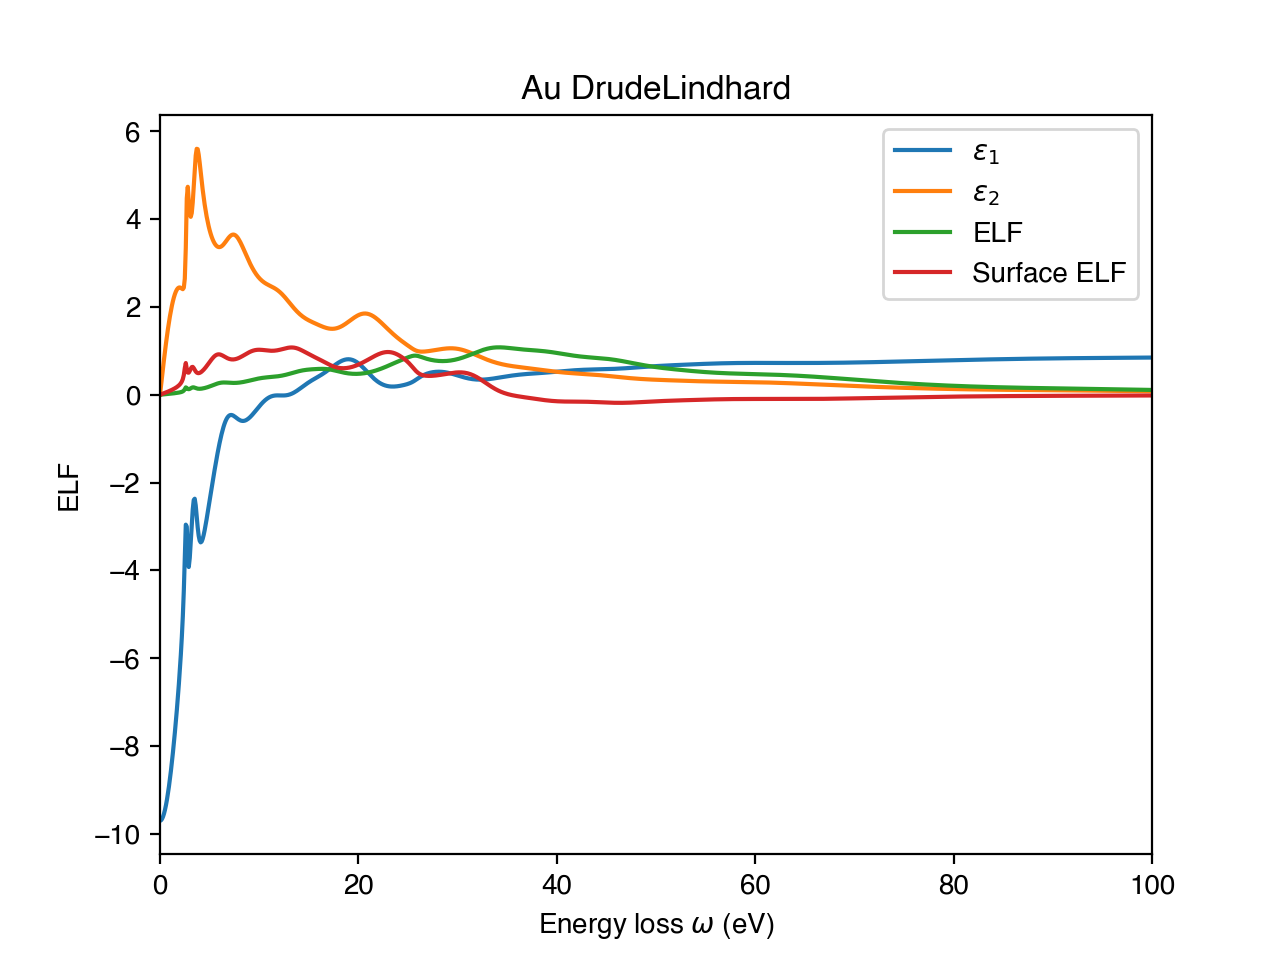

In [17]:
au_dl.calculateELF()
au_dl.calculateSurfaceELF()

plt.figure()
plt.plot(au_dl.eloss,au_dl.epsilon.real,label='$\epsilon_1$')
plt.plot(au_dl.eloss,au_dl.epsilon.imag,label='$\epsilon_2$')
plt.plot(au_dl.eloss,au_dl.ELF,label='ELF')
plt.plot(au_dl.eloss,au_dl.surfaceELF,label='Surface ELF')
plt.xlabel('Energy loss $\omega$ (eV)')
plt.ylabel('ELF')
plt.title(f'{au_dl.name} {au_dl.oscillators.model}')
plt.xlim(0,100)
plt.legend()
plt.show()

<IPython.core.display.Javascript object>


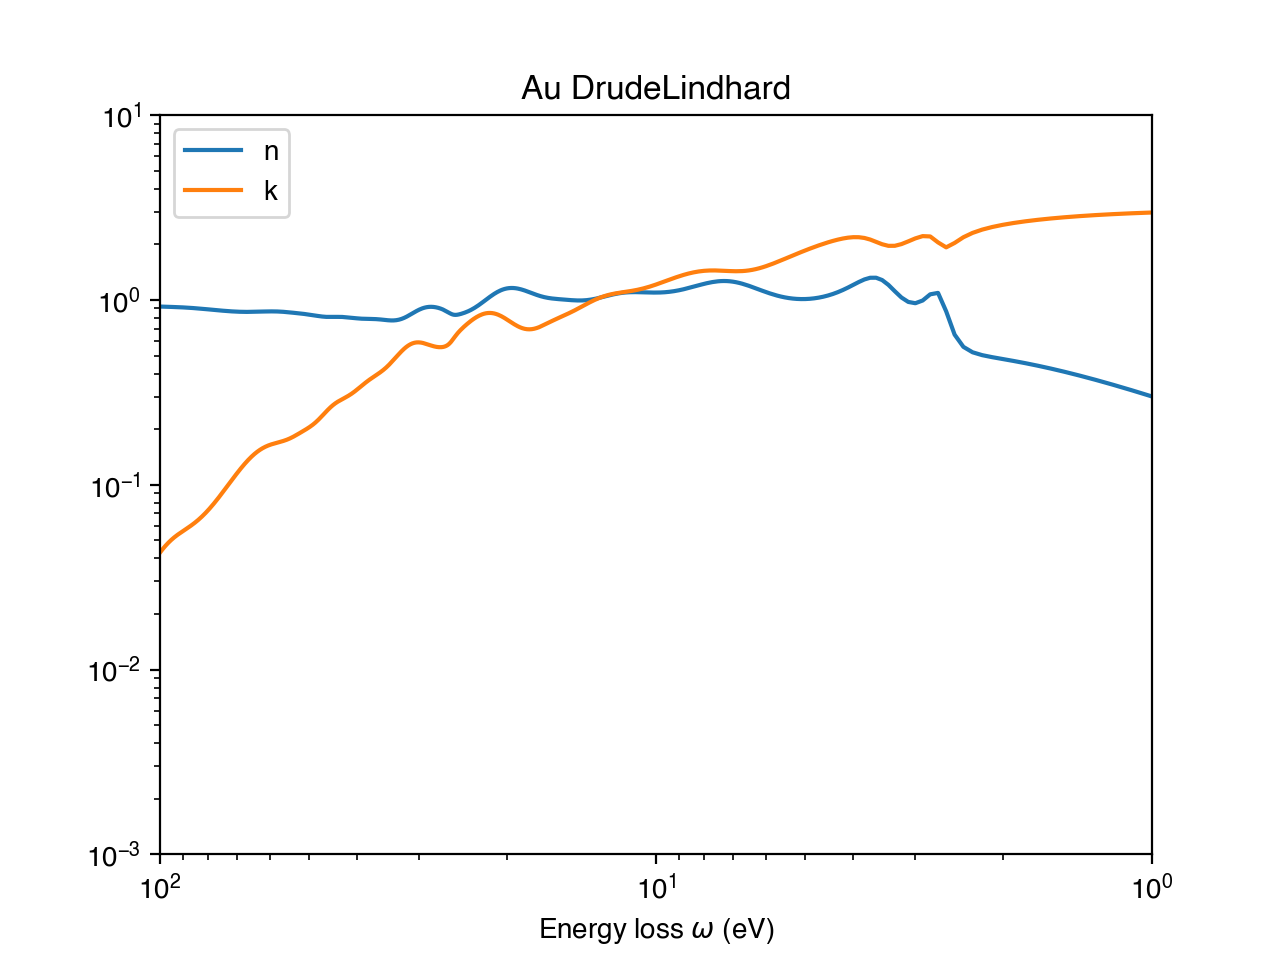

In [18]:
au_dl.calculateOpticalConstants()

plt.figure()
plt.plot(au_dl.eloss,au_dl.refractive_index,label='n')
plt.plot(au_dl.eloss,au_dl.extinction_coefficient,label='k')
plt.yscale('log')
plt.xscale('log')
plt.xlabel('Energy loss $\omega$ (eV)')
plt.xlim(100,1)
plt.ylim(0.001,10)
plt.legend()
plt.title(f'{au_dl.name} {au_dl.oscillators.model}')
plt.show()